<a href="https://colab.research.google.com/github/sundar911/topic_modeling/blob/main/LDA%2BEDA_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#imports and setup

In [ ]:
!pip install pyLDAvis==2.1.2
!pip install gensim==3.8.1

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import scipy
from scipy import stats

In [ ]:
import pickle
import gensim
import pyLDAvis
import pyLDAvis.gensim
import spacy
import pandas as pd
import nltk; nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.phrases import Phrases, Phraser
import re
import warnings
from pprint import pprint
import re  # For preprocessing
import pandas as pd
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from gensim.models import Phrases
from gensim.models.phrases import Phrases, Phraser
from wordcloud import WordCloud
from gensim import corpora
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import multiprocessing
from gensim.models import Word2Vec


In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [ ]:
df_covid.to_csv('/content/drive/MyDrive/Tourism | NITT Sundar/eda/covid.csv', index=False)

In [ ]:
df_covid.to_csv('/content/drive/MyDrive/Tourism | NITT Sundar/covid_final.csv', index=False)

In [ ]:
df_covid = pd.read_csv('/content/drive/MyDrive/Tourism | NITT Sundar/eda/covid.csv') #without words not belonging to english dictionary

In [ ]:
df_covid = pd.read_csv('/content/drive/MyDrive/Tourism | NITT Sundar/1st paper /covid_final.csv') #use this

In [ ]:
df_covid.Date.value_counts()

2020-11-01    2315
2020-10-01    2314
2020-12-01    2278
2021-01-01    1864
2020-09-01    1773
2021-03-01    1460
2020-08-01    1363
2021-02-01    1278
2021-04-01     934
2020-07-01     913
2021-06-01     497
2020-06-01     481
2020-03-01     414
2021-05-01     413
2020-05-01     159
2020-04-01     118
2020-02-01      55
2021-07-01      15
Name: Date, dtype: int64

In [ ]:
df_covid = df_covid[df_covid.Date >= '2020-02-01']

In [ ]:
df_covid.shape

(18644, 39)

In [ ]:
df_covid.head()

hotel_name  ... price_mean
0       Park Inn by Radisson New Delhi Lajpat Nagar  ...     7440.0
1                           Dewdrop Intercity Hotel  ...     3080.0
2                      The Golden Palms Hotel & Spa  ...     4368.5
3                                        Hotel Aura  ...     3006.0
4  ITC Maurya, a Luxury Collection Hotel, New Delhi  ...    13229.5

[5 rows x 22 columns]

try to get a ref for ppl taking a subset of data for focussing on a particualr topic

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tourism | NITT Sundar/1st paper /eda/eda_trial.csv')

In [ ]:
df.shape

(430876, 17)

In [ ]:
df.tail()

hotel_name  ...                                     cleaned_review
521397  Red Fox Hotel, Bhiwadi  ...  indeed pleasurable stay red fox bhiwadi exteri...
521398            Matsya Vilas  ...  place fell nature location nice beautiful hote...
521399            Matsya Vilas  ...  family stay two night two bedrooms hotel situa...
521400            Matsya Vilas  ...  comfortable hotel nice room grounds food good ...
521401            Matsya Vilas  ...  would say good place visit salasar balaji temp...

[5 rows x 16 columns]

In [ ]:
df_new = df[df.Date >= '2020-02-01']

In [ ]:
df_new.reset_index(drop=True, inplace=True)

In [ ]:
df_new.shape

(155261, 17)

In [ ]:
df_new.to_csv('/content/drive/MyDrive/Tourism | NITT Sundar/eda/post_2020_feb.csv', index=False)

In [ ]:
df_new = pd.read_csv('/content/drive/MyDrive/Tourism | NITT Sundar/1st paper /eda/post_2020_feb.csv')

In [ ]:
df_new.shape

(155261, 22)

In [ ]:
df_new.head()

hotel_name  ... precautions_count_binned_temp_dont_use_this
0  Svelte Hotel and Personal Suites  ...                                           1
1  Svelte Hotel and Personal Suites  ...                                           1
2  Svelte Hotel and Personal Suites  ...                                           1
3  Svelte Hotel and Personal Suites  ...                                           1
4  Svelte Hotel and Personal Suites  ...                                           1

[5 rows x 22 columns]

In [ ]:
df_new_price.to_csv('/content/drive/MyDrive/Tourism | NITT Sundar/eda/precautions_and_price_by_review.csv', index=False)

In [ ]:
df_new_price = pd.read_csv('/content/drive/MyDrive/Tourism | NITT Sundar/eda/precautions_and_price_by_review.csv') #without hotels that didn't have price info

In [ ]:
df_new_price.shape

(80049, 21)

In [ ]:
df_new_prec_hotel.to_csv('/content/drive/MyDrive/Tourism | NITT Sundar/eda/precautions_and_price_by_hotel.csv', index=False)

In [ ]:
df_new_prec_hotel = pd.read_csv('/content/drive/MyDrive/Tourism | NITT Sundar/1st paper /eda/precautions_and_price_by_hotel.csv')

In [ ]:
df_new_prec_hotel.shape

(548, 6)

In [ ]:
df_new_prec_hotel.head()

hotel_name  ...  precautions_count_binned
0                          7 Apple Hotel Aurangabad  ...                         3
1                                    7 Apple Resort  ...                         2
2                     AGS Holiday Resorts, Yelagiri  ...                         1
3                   ALMEIDA - IN THE LAP OF ROYALTY  ...                         3
4  AM Hotel Kollection: The Summer House, Pachmarhi  ...                         1

[5 rows x 4 columns]

#all

##LDA

In [ ]:
import gensim

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(sent_to_words(df_covid.cleaned_review.astype(str)))
bigram_model = Phrases(data_words)
trigram_model = Phrases(bigram_model[data_words], min_count=1)
data_words = list(trigram_model[bigram_model[data_words]])

INFO - 16:33:10: collecting all words and their counts
INFO - 16:33:10: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 16:33:11: PROGRESS: at sentence #10000, processed 536645 words and 295261 word types
INFO - 16:33:12: collected 472596 word types from a corpus of 1026808 words (unigram + bigrams) and 18644 sentences
INFO - 16:33:12: using 472596 counts as vocab in Phrases<0 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>
INFO - 16:33:12: collecting all words and their counts
INFO - 16:33:12: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 16:33:15: PROGRESS: at sentence #10000, processed 481790 words and 324133 word types
INFO - 16:33:18: collected 526408 word types from a corpus of 921317 words (unigram + bigrams) and 18644 sentences
INFO - 16:33:18: using 526408 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>


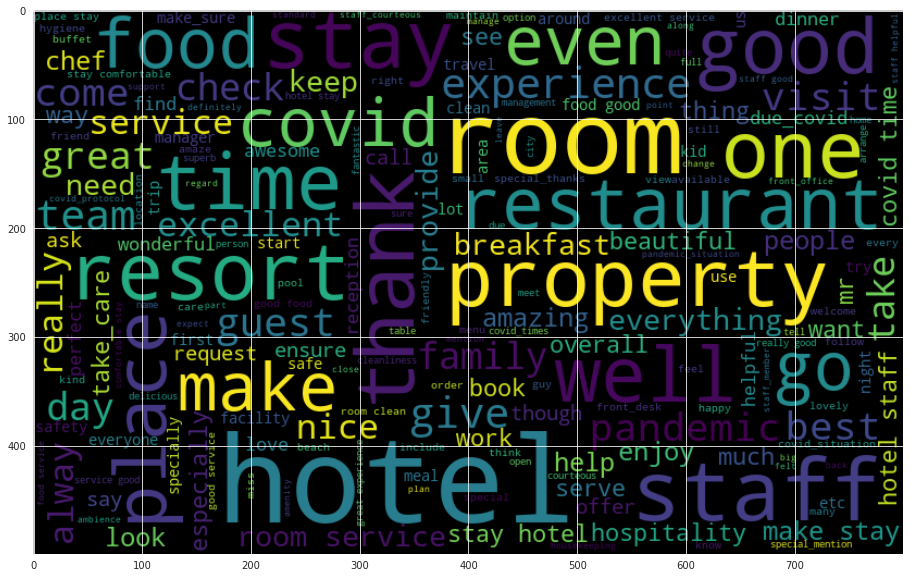

In [ ]:
all_words=[]

for i in data_words:
  for j in i:
    all_words.append(j)

all_words_final = ' '.join([text for text in all_words])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_final)
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
img = plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [ ]:
19053*1.5/100

285.795

In [ ]:
18644*1.5/100

279.66

In [ ]:
# Create Dictionary and filtering out least (appearing in less than 1.5% of the reviews (assuming appears only once in each review)) and most frequent words (appearing in more than 70% of the reviews)
id2word = corpora.Dictionary(data_words)
id2word.filter_extremes(no_above=0.70, no_below=280)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text, allow_update=True) for text in texts]

print(corpus[:1][0][:30])

INFO - 16:33:36: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 16:33:37: adding document #10000 to Dictionary(53815 unique tokens: ['also', 'associate', 'attendees', 'awesome', 'big']...)
INFO - 16:33:37: built Dictionary(74726 unique tokens: ['also', 'associate', 'attendees', 'awesome', 'big']...) from 18644 documents (total 807762 corpus positions)
INFO - 16:33:38: discarding 74413 tokens: [('associate', 57), ('attendees', 2), ('boardroom', 2), ('business_meeting', 12), ('centrally_located', 23), ('clean_well_maintained', 56), ('colleague', 94), ('decent', 248), ('delhi', 178), ('drink', 146)]...
INFO - 16:33:38: keeping 313 tokens which were in no less than 280 and no more than 13050 (=70.0%) documents
INFO - 16:33:38: resulting dictionary: Dictionary(313 unique tokens: ['also', 'awesome', 'big', 'book', 'breakfast']...)


[(0, 1), (1, 1), (2, 1), (3, 2), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 3), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 3), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
  coherence_values = []
  model_list = []
  perplexity_values=[]
  for num_topics in range(start, limit, step):
    model = gensim.models.wrappers.LdaMallet(mallet_path,
                                             corpus=corpus,
                                             num_topics=num_topics,
                                             id2word=id2word,
                                             random_seed=100)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

  return model_list, coherence_values

In [ ]:
# Can take a long time to run
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=4, limit=15, step=1)

INFO - 16:42:57: serializing temporary corpus to /tmp/1be6a_corpus.txt
INFO - 16:42:58: converting temporary corpus to MALLET format with /content/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/1be6a_corpus.txt --output /tmp/1be6a_corpus.mallet
INFO - 16:43:01: training MALLET LDA with /content/mallet-2.0.8/bin/mallet train-topics --input /tmp/1be6a_corpus.mallet --num-topics 4  --alpha 50 --optimize-interval 0 --num-threads 4 --output-state /tmp/1be6a_state.mallet.gz --output-doc-topics /tmp/1be6a_doctopics.txt --output-topic-keys /tmp/1be6a_topickeys.txt --num-iterations 1000 --inferencer-filename /tmp/1be6a_inferencer.mallet --doc-topics-threshold 0.0  --random-seed 100
INFO - 16:44:18: loading assigned topics from /tmp/1be6a_state.mallet.gz
INFO - 16:44:21: using WordOccurrenceAccumulator to estimate probabilities from sliding windows
INFO - 16:44:21: WordOccurrenceAccumulator accumulated stats from 1000 docum

###covid.csv -> without words that aren't in the dictionary

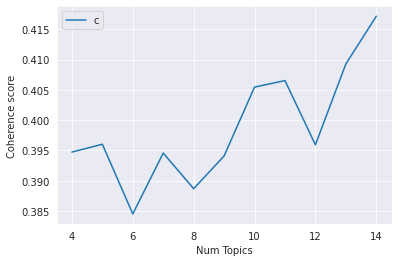

In [ ]:
# coherence elbow

limit=15; start=4; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
mallet_10 = gensim.models.wrappers.LdaMallet(mallet_path,
                                            corpus=corpus,
                                            num_topics=10,
                                            id2word=id2word,
                                            random_seed=47)

model_10 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(mallet_10)
LDAvis_prepared = pyLDAvis.gensim.prepare(model_10, corpus, id2word)
pyLDAvis.enable_notebook()
pyLDAvis.display(LDAvis_prepared)

INFO - 17:18:08: serializing temporary corpus to /tmp/6f5b87_corpus.txt
INFO - 17:18:09: converting temporary corpus to MALLET format with /content/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/6f5b87_corpus.txt --output /tmp/6f5b87_corpus.mallet
INFO - 17:18:12: training MALLET LDA with /content/mallet-2.0.8/bin/mallet train-topics --input /tmp/6f5b87_corpus.mallet --num-topics 10  --alpha 50 --optimize-interval 0 --num-threads 4 --output-state /tmp/6f5b87_state.mallet.gz --output-doc-topics /tmp/6f5b87_doctopics.txt --output-topic-keys /tmp/6f5b87_topickeys.txt --num-iterations 1000 --inferencer-filename /tmp/6f5b87_inferencer.mallet --doc-topics-threshold 0.0  --random-seed 47
INFO - 17:19:50: loading assigned topics from /tmp/6f5b87_state.mallet.gz
INFO - 17:19:52: using serial LDA version on this node
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered 

In [ ]:
mallet_9 = gensim.models.wrappers.LdaMallet(mallet_path,
                                            corpus=corpus,
                                            num_topics=9,
                                            id2word=id2word,
                                            random_seed=47)

model_9 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(mallet_9)
LDAvis_prepared = pyLDAvis.gensim.prepare(model_9, corpus, id2word)
pyLDAvis.enable_notebook()
pyLDAvis.display(LDAvis_prepared)

INFO - 17:16:01: serializing temporary corpus to /tmp/a6a748_corpus.txt
INFO - 17:16:02: converting temporary corpus to MALLET format with /content/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/a6a748_corpus.txt --output /tmp/a6a748_corpus.mallet
INFO - 17:16:05: training MALLET LDA with /content/mallet-2.0.8/bin/mallet train-topics --input /tmp/a6a748_corpus.mallet --num-topics 9  --alpha 50 --optimize-interval 0 --num-threads 4 --output-state /tmp/a6a748_state.mallet.gz --output-doc-topics /tmp/a6a748_doctopics.txt --output-topic-keys /tmp/a6a748_topickeys.txt --num-iterations 1000 --inferencer-filename /tmp/a6a748_inferencer.mallet --doc-topics-threshold 0.0  --random-seed 47
INFO - 17:17:40: loading assigned topics from /tmp/a6a748_state.mallet.gz
INFO - 17:17:42: using serial LDA version on this node
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered i

In [ ]:
mallet_9 = gensim.models.wrappers.LdaMallet(mallet_path,
                                            corpus=corpus,
                                            num_topics=9,
                                            id2word=id2word,
                                            random_seed=50)

INFO - 09:59:40: serializing temporary corpus to /tmp/dcd939_corpus.txt
INFO - 09:59:41: converting temporary corpus to MALLET format with /content/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/dcd939_corpus.txt --output /tmp/dcd939_corpus.mallet
INFO - 09:59:43: training MALLET LDA with /content/mallet-2.0.8/bin/mallet train-topics --input /tmp/dcd939_corpus.mallet --num-topics 9  --alpha 50 --optimize-interval 0 --num-threads 4 --output-state /tmp/dcd939_state.mallet.gz --output-doc-topics /tmp/dcd939_doctopics.txt --output-topic-keys /tmp/dcd939_topickeys.txt --num-iterations 1000 --inferencer-filename /tmp/dcd939_inferencer.mallet --doc-topics-threshold 0.0  --random-seed 50
INFO - 10:01:12: loading assigned topics from /tmp/dcd939_state.mallet.gz


filter extremes lower limit 286

In [ ]:
model_9 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(mallet_9)
LDAvis_prepared = pyLDAvis.gensim.prepare(model_9, corpus, id2word)
pyLDAvis.enable_notebook()
pyLDAvis.display(LDAvis_prepared)

INFO - 10:01:14: using serial LDA version on this node
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


###covid_final.csv -> with words that aren't in the dictionary

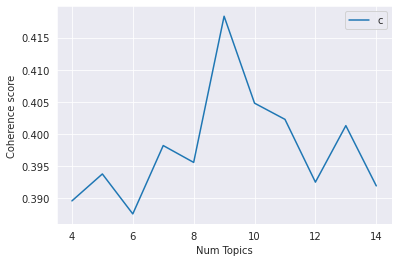

In [ ]:
# coherence elbow

limit=15; start=4; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
mallet_8 = gensim.models.wrappers.LdaMallet(mallet_path,
                                            corpus=corpus,
                                            num_topics=8,
                                            id2word=id2word,
                                            random_seed=47)

INFO - 08:48:09: serializing temporary corpus to /tmp/adb5d3_corpus.txt
INFO - 08:48:10: converting temporary corpus to MALLET format with /content/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/adb5d3_corpus.txt --output /tmp/adb5d3_corpus.mallet
INFO - 08:48:13: training MALLET LDA with /content/mallet-2.0.8/bin/mallet train-topics --input /tmp/adb5d3_corpus.mallet --num-topics 8  --alpha 50 --optimize-interval 0 --num-threads 4 --output-state /tmp/adb5d3_state.mallet.gz --output-doc-topics /tmp/adb5d3_doctopics.txt --output-topic-keys /tmp/adb5d3_topickeys.txt --num-iterations 1000 --inferencer-filename /tmp/adb5d3_inferencer.mallet --doc-topics-threshold 0.0  --random-seed 47
INFO - 08:50:04: loading assigned topics from /tmp/adb5d3_state.mallet.gz


In [ ]:
model_8 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(mallet_8)
LDAvis_prepared = pyLDAvis.gensim.prepare(model_8, corpus, id2word)
pyLDAvis.enable_notebook()
pyLDAvis.display(LDAvis_prepared)

INFO - 08:52:37: using serial LDA version on this node
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


In [ ]:
mallet_9 = gensim.models.wrappers.LdaMallet(mallet_path,
                                            corpus=corpus,
                                            num_topics=9,
                                            id2word=id2word,
                                            random_seed=100)

model_9 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(mallet_9)
LDAvis_prepared = pyLDAvis.gensim.prepare(model_9, corpus, id2word)
pyLDAvis.enable_notebook()
pyLDAvis.display(LDAvis_prepared)

INFO - 16:34:13: serializing temporary corpus to /tmp/856181_corpus.txt
INFO - 16:34:15: converting temporary corpus to MALLET format with /content/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/856181_corpus.txt --output /tmp/856181_corpus.mallet
INFO - 16:34:18: training MALLET LDA with /content/mallet-2.0.8/bin/mallet train-topics --input /tmp/856181_corpus.mallet --num-topics 9  --alpha 50 --optimize-interval 0 --num-threads 4 --output-state /tmp/856181_state.mallet.gz --output-doc-topics /tmp/856181_doctopics.txt --output-topic-keys /tmp/856181_topickeys.txt --num-iterations 1000 --inferencer-filename /tmp/856181_inferencer.mallet --doc-topics-threshold 0.0  --random-seed 100
INFO - 16:36:08: loading assigned topics from /tmp/856181_state.mallet.gz
INFO - 16:36:11: using serial LDA version on this node
INFO - 16:36:14: NumExpr defaulting to 2 threads.
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.p



1.   complaints #2
2.   property, scenery, amenities #5
3.   overall experience #6
4.   compliments to hotel team #8
5.   resort location/leisure travel #7
6.   hospitality #4
7.   quality of stay and safety measures taken by hotel #3
8.   staff behaviour and compliance with covid norms #1
9.   service quality and norms followed during meals #0








In [ ]:
df_covid.loc[22, 'review']

"I had a stellar experience at ITC Maurya recently. Right from front desk to housekeeping and coffee shop staff and chefs - the Covid protocol was exemplary. I was amazed at the level of no-contact/hygiene maintained without any compromise on ITC's signature warm hospitality in the peak of Delhi winter. It was a special occasion for me and my guests - we were all staying here for 2 nights and overall we had a memorable experience. I'd like to share names of few staff members (whoever I could remember) for bringing warm smiles on our faces during our marvelous stay here. I'd like to thank manager Anand, Daman, Rohit, Minakshi , Aastha, Sushil of front desk, Mayaram ji, deepchand and others in their team, Heera, Chirag and Nishant from Ottimo, Chef Mahavir and Girish, Amit Sharma, Kailash from Coffee Shop and Mohan Palival and Sachin at Golf Club. The cake arranged for my anniversary from GRE team whose names I am escaping but do extend my heartfelt gratitude to all of the staff taking c

In [ ]:
for i in range(len(df_covid)):
  if(' visit ' in df_covid.loc[i, 'review'] and ' place ' in df_covid.loc[i, 'review'] and ' resort ' in df_covid.loc[i, 'review']):
    print(df_covid.loc[i, 'review'])
    print('\n')

Amidst the pandemic situation the resort was maintained very well and sanitized regularly. The place is very beautiful and calm. Its a best place to spend quality time with family. Though we couldn't use the amenities because of covid situation the stay was clean and perfect. Food was good. Staffs are really good and polite kind enough to help anytime. Love to visit the place again.


I was at Golconda resort over the weekend. Its our first visit to a resort since the pandemic started. We had a good time relaxing ourselves and spending time with kids. The rooms are quite comfortable and maintained very well. The service was great as well. The lawns, pool and walking areas were very well maintained and it was pretty good for photography. There were some private events happened during our stay and the overall area was beautifully decorated and lit up for the event, which made the place look quite beautiful. Overall it was a good stay. Thanks to Ms Himani who helped us with everything tha

In [ ]:
model_8 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(mallet_8)
LDAvis_prepared = pyLDAvis.gensim.prepare(model_8, corpus, id2word)
pyLDAvis.enable_notebook()
pyLDAvis.display(LDAvis_prepared)

INFO - 09:26:15: using serial LDA version on this node
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)



*   1 - complaints - #2
*   2 - communication with hotel - #0
*   3 - location, rooms and amenities - #3
*   4 - quality of food - #4
*   5 - hospitality - #7
*   6 - overall stay - #6
*   7 - staff compliance with covid precautions - #1
*   8 - service & norms followed during meals - #5



In [ ]:
for i in df_covid.review:
  if('room' in i and 'check' in i and 'order' in i and 'star' in i):
    print(i)
    print('\n')

##Analysis by topic

In [ ]:
mallet_9.print_topics()

INFO - 09:47:12: topic #0 (5.556): 0.166*"good" + 0.071*"food" + 0.063*"service" + 0.058*"excellent" + 0.055*"room" + 0.045*"nice" + 0.033*"clean" + 0.017*"staff" + 0.016*"maintain" + 0.013*"awesome"
INFO - 09:47:12: topic #1 (5.556): 0.121*"staff" + 0.066*"service" + 0.049*"covid" + 0.049*"great" + 0.033*"time" + 0.029*"food" + 0.028*"pandemic" + 0.021*"helpful" + 0.016*"restaurant" + 0.015*"specially"
INFO - 09:47:12: topic #2 (5.556): 0.062*"room" + 0.015*"check" + 0.011*"breakfast" + 0.010*"book" + 0.009*"guest" + 0.009*"call" + 0.008*"order" + 0.007*"restaurant" + 0.006*"request" + 0.006*"serve"
INFO - 09:47:12: topic #3 (5.556): 0.204*"hotel" + 0.145*"stay" + 0.045*"staff" + 0.024*"covid" + 0.019*"comfortable" + 0.017*"safe" + 0.016*"room" + 0.015*"provide" + 0.012*"pleasant" + 0.009*"recommend"
INFO - 09:47:12: topic #4 (5.556): 0.099*"stay" + 0.050*"experience" + 0.047*"hospitality" + 0.044*"make" + 0.036*"amazing" + 0.025*"great" + 0.023*"wonderful" + 0.015*"memorable" + 0.015

[(0,
  '0.166*"good" + 0.071*"food" + 0.063*"service" + 0.058*"excellent" + 0.055*"room" + 0.045*"nice" + 0.033*"clean" + 0.017*"staff" + 0.016*"maintain" + 0.013*"awesome"'),
 (1,
  '0.121*"staff" + 0.066*"service" + 0.049*"covid" + 0.049*"great" + 0.033*"time" + 0.029*"food" + 0.028*"pandemic" + 0.021*"helpful" + 0.016*"restaurant" + 0.015*"specially"'),
 (2,
  '0.062*"room" + 0.015*"check" + 0.011*"breakfast" + 0.010*"book" + 0.009*"guest" + 0.009*"call" + 0.008*"order" + 0.007*"restaurant" + 0.006*"request" + 0.006*"serve"'),
 (3,
  '0.204*"hotel" + 0.145*"stay" + 0.045*"staff" + 0.024*"covid" + 0.019*"comfortable" + 0.017*"safe" + 0.016*"room" + 0.015*"provide" + 0.012*"pleasant" + 0.009*"recommend"'),
 (4,
  '0.099*"stay" + 0.050*"experience" + 0.047*"hospitality" + 0.044*"make" + 0.036*"amazing" + 0.025*"great" + 0.023*"wonderful" + 0.015*"memorable" + 0.015*"comfortable" + 0.014*"take_care"'),
 (5,
  '0.033*"property" + 0.015*"room" + 0.010*"restaurant" + 0.009*"pool" + 0.008*"

In [ ]:
topic_modelling_results = mallet_9[corpus]

INFO - 09:47:12: serializing temporary corpus to /tmp/e98b31_corpus.txt
INFO - 09:47:14: converting temporary corpus to MALLET format with /content/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/e98b31_corpus.txt --output /tmp/e98b31_corpus.mallet.infer --use-pipe-from /tmp/e98b31_corpus.mallet
INFO - 09:47:20: inferring topics with MALLET LDA '/content/mallet-2.0.8/bin/mallet infer-topics --input /tmp/e98b31_corpus.mallet.infer --inferencer /tmp/e98b31_inferencer.mallet --output-doc-topics /tmp/e98b31_doctopics.txt.infer --num-iterations 100 --doc-topics-threshold 0.0 --random-seed 100'


In [ ]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in topic_modelling_results]

In [ ]:
df_covid['dominant_topic'] = [i[0] for i in corpus_topics]

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

df_covid['sentiment_scores'] = df_covid['cleaned_review'].apply(lambda rev: sid.polarity_scores(rev))
df_covid['compound_score'] = df_covid['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df_covid.groupby(by='dominant_topic').agg({'compound_score':'mean'})

compound_score
dominant_topic                
0                     0.930645
1                     0.935800
2                     0.658852
3                     0.916271
4                     0.956665
5                     0.953663
6                     0.916857
7                     0.948463
8                     0.951491

try 0-1 on the y axis with the same figsize. count the -ve polarities for each topic and trip type. total count and count below 0.

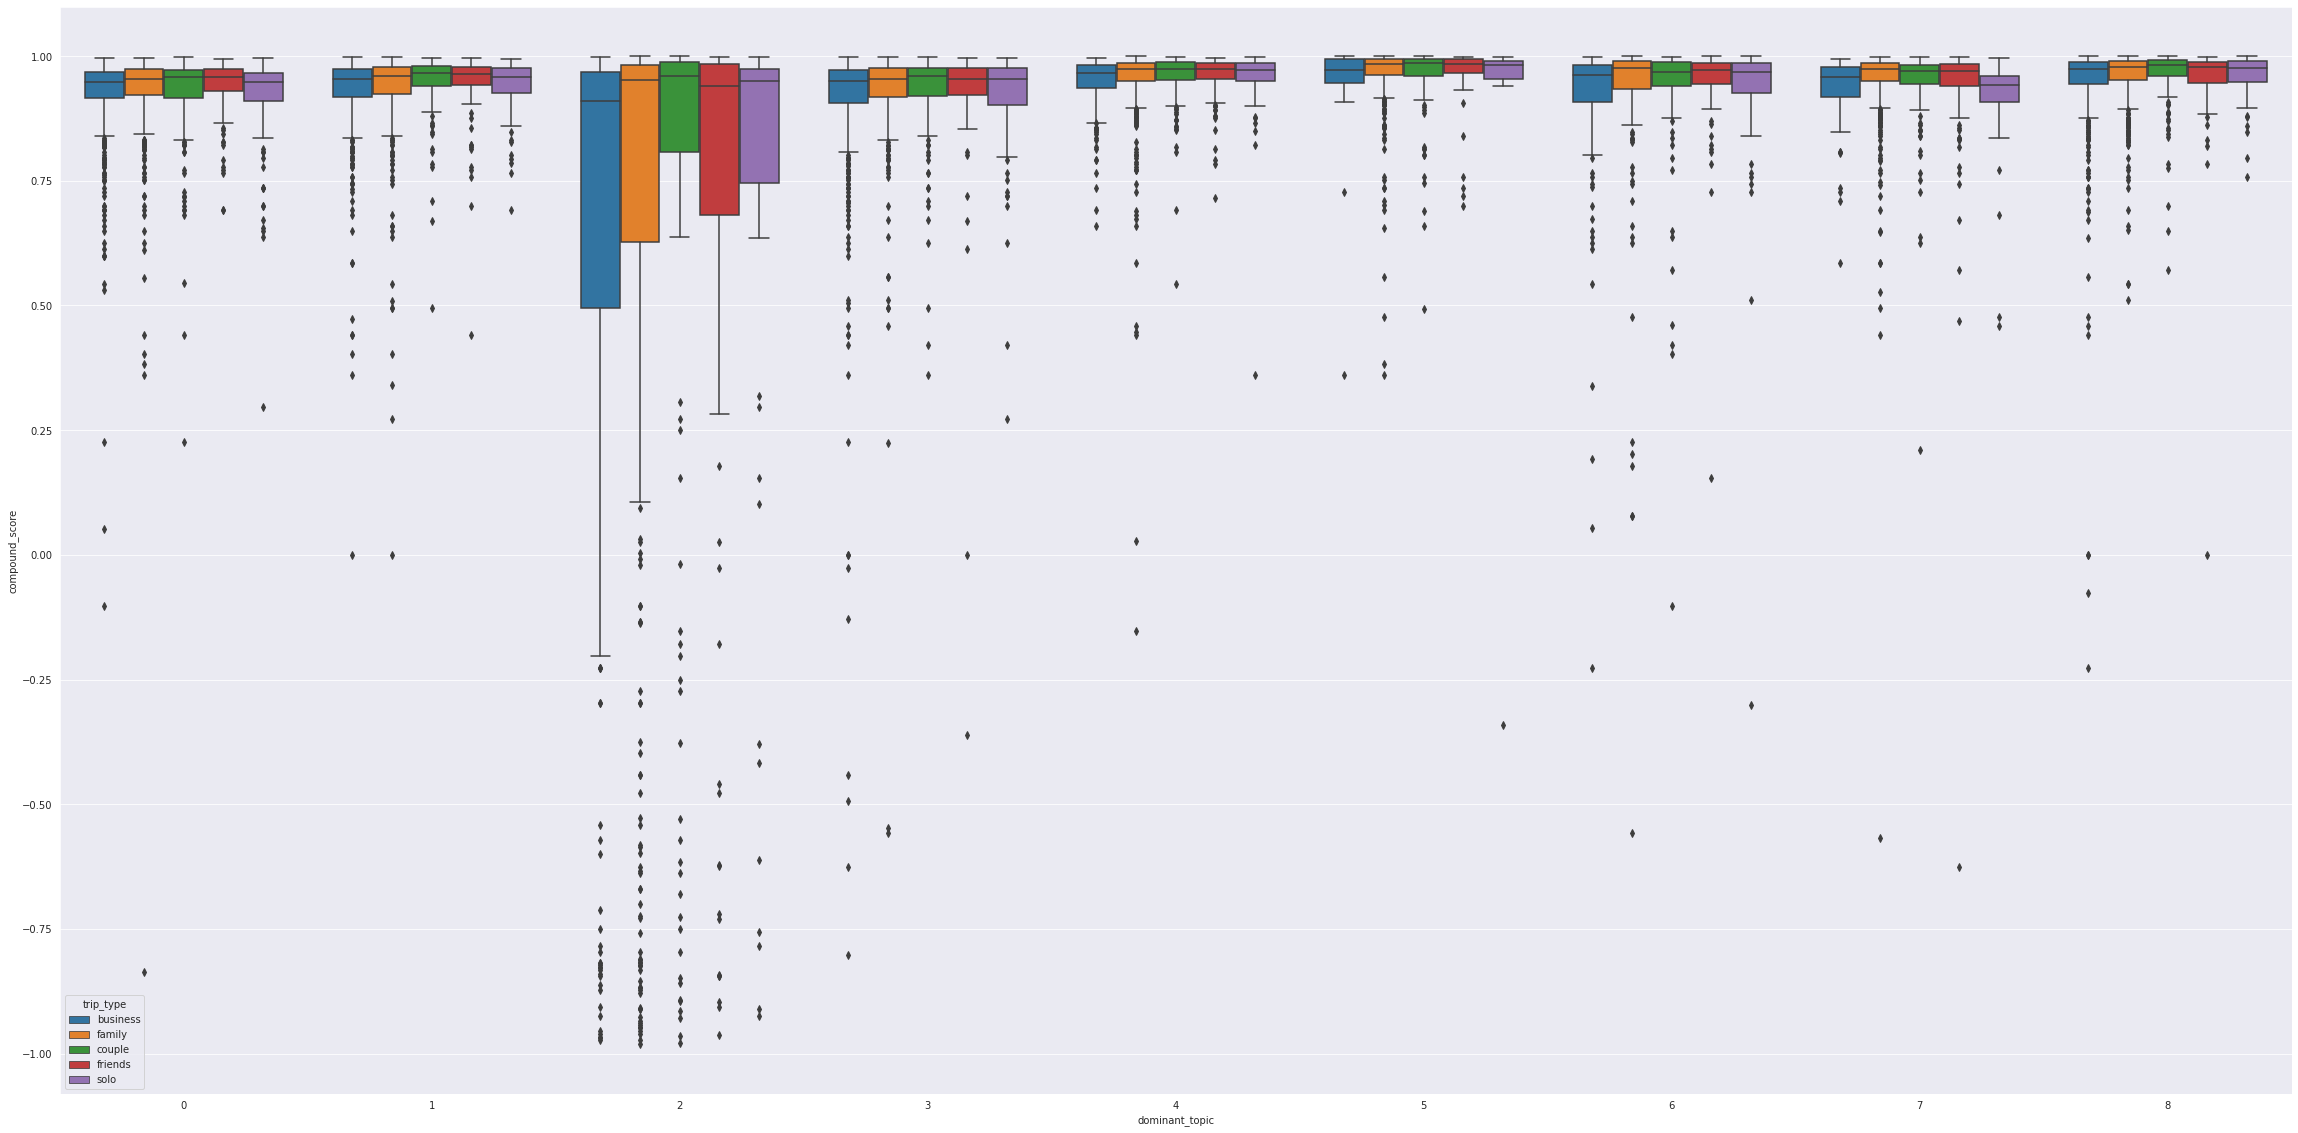

In [ ]:
plt.figure(figsize=(40,20))
sns.boxplot(y='compound_score', x='dominant_topic', hue='trip_type', data=df_covid)



1.   complaints #2
2.   property, scenery, amenities #5
3.   overall experience #6
4.   compliments to hotel team #8
5.   resort location/leisure travel #7
6.   hospitality #4
7.   quality of stay and safety measures taken by hotel #3
8.   staff behaviour and compliance with covid norms #1
9.   service quality and norms followed during meals #0








put everything in pone graph except topic #2, try kde/other plots for topic #2 alone

In [ ]:
order = ['business', 'solo', 'couple', 'family', 'friends']

In [ ]:
df_covid.query('dominant_topic != 2').dominant_topic.value_counts()

0    3298
3    2298
4    2220
1    2111
7    1992
8    1989
5    1690
6    1213
Name: dominant_topic, dtype: int64

In [ ]:
df_covid_pol_0 = df_covid[['dominant_topic', 'trip_type', 'compound_score']].query('dominant_topic != 2')
df_covid_pol_0 = df_covid_pol_0.query('compound_score <= 0')
df_covid_pol_0.dropna(axis=0, inplace=True)

In [ ]:
pd.crosstab(df_covid_pol_0.trip_type, df_covid_pol_0.dominant_topic)

dominant_topic  0  1  3  4  5  6  7  8
trip_type                             
business        1  1  8  0  0  1  0  4
couple          0  0  0  0  0  1  0  0
family          1  1  2  1  0  1  1  0
friends         0  0  2  0  0  0  1  1
solo            0  0  0  0  1  1  0  0

Text(0, 0.5, 'Polarity Score')

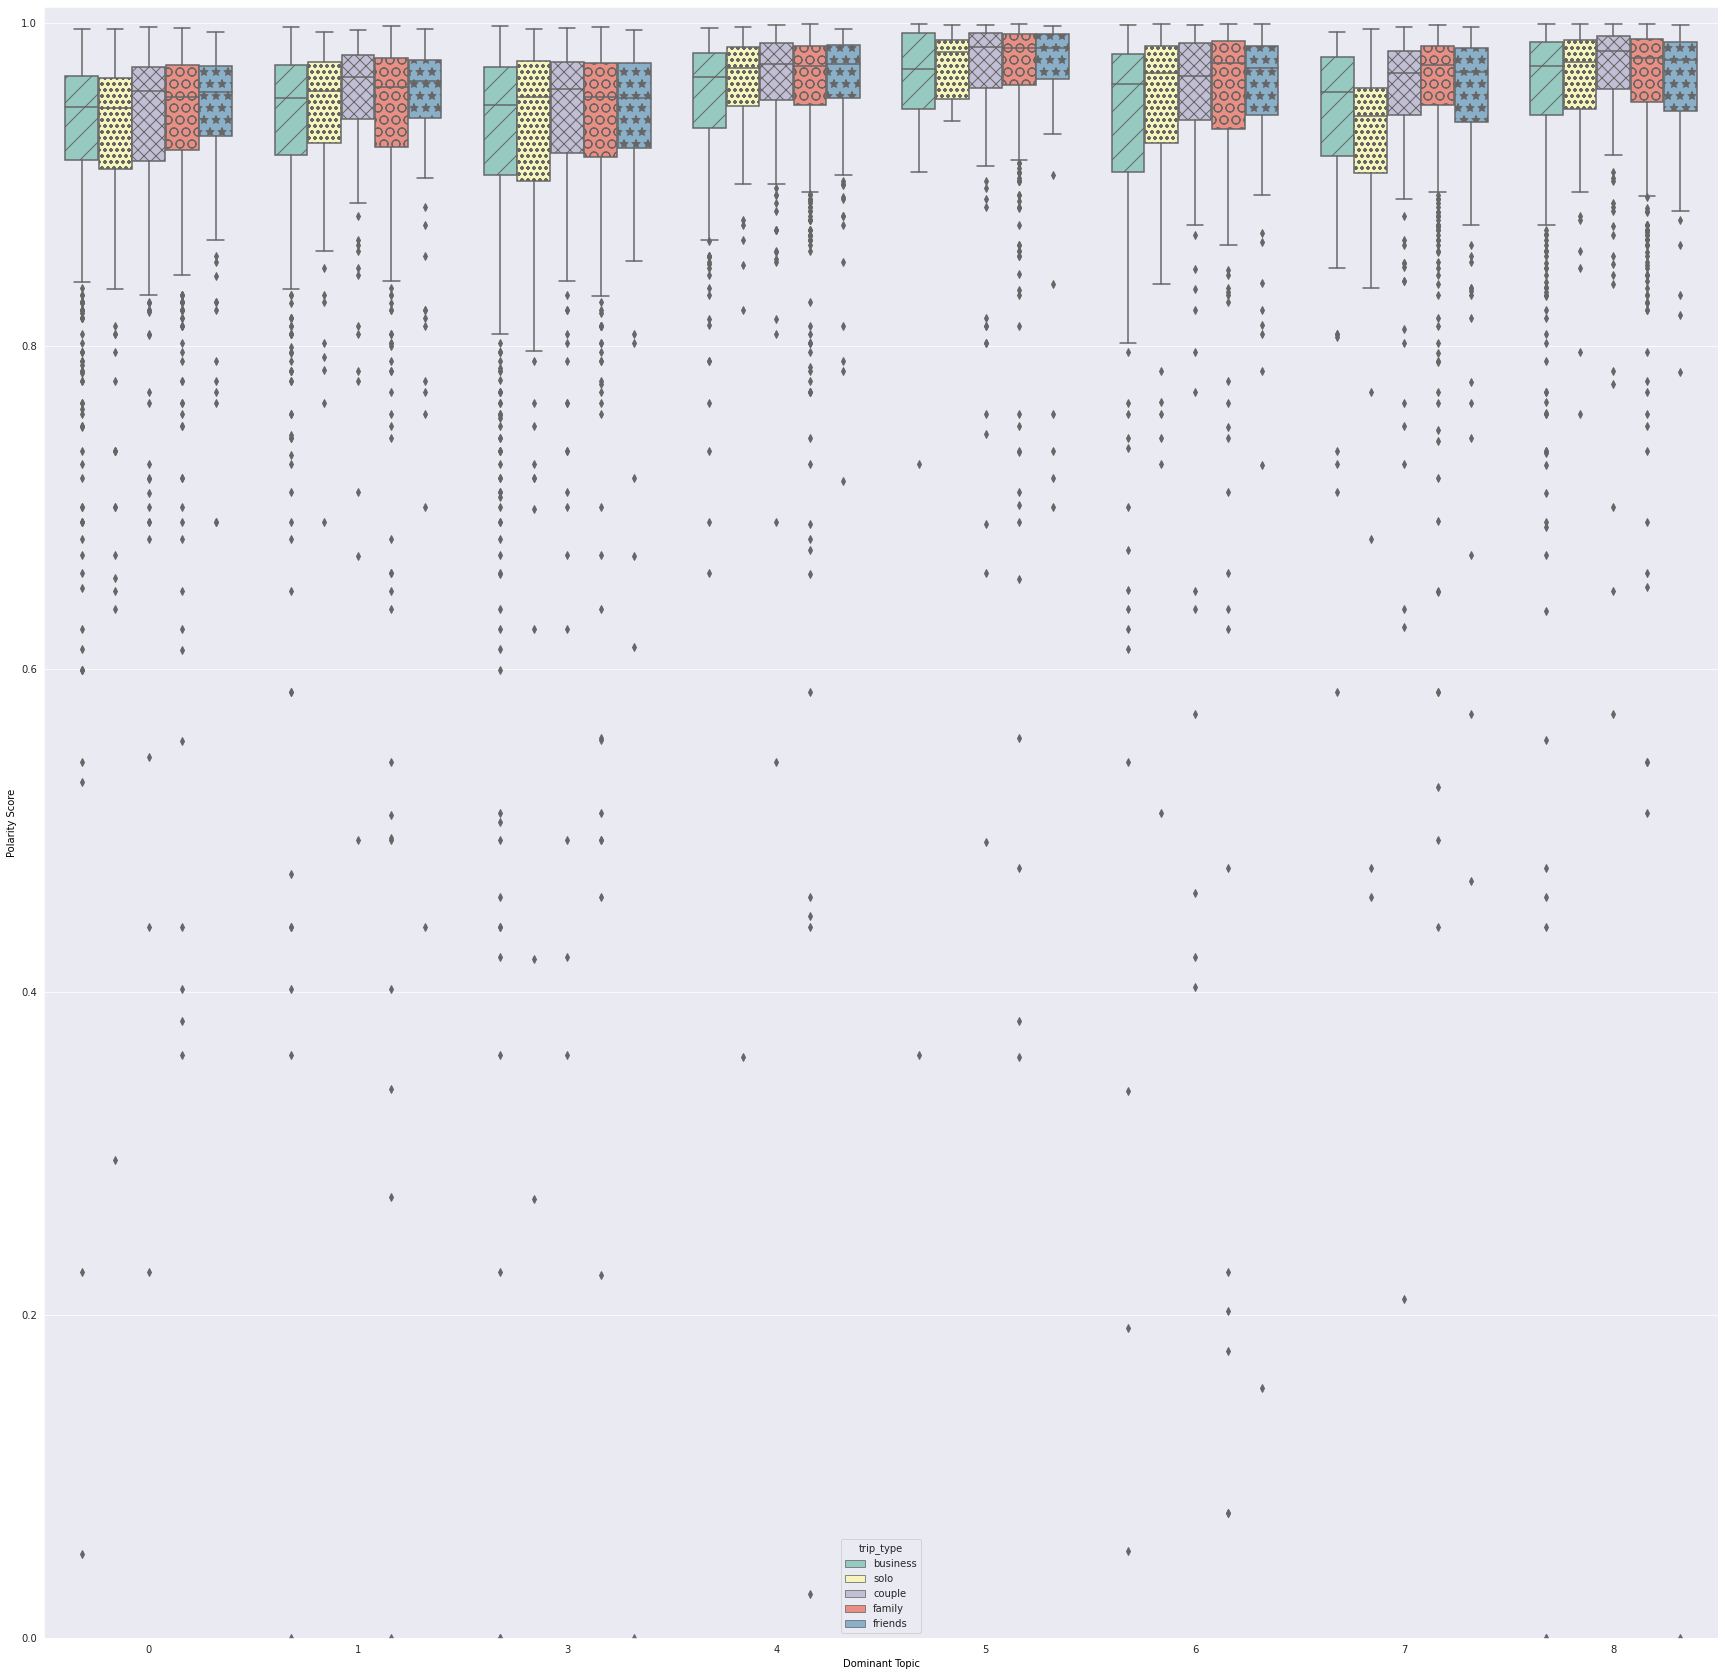

In [ ]:
plt.figure(figsize=(30,30))
plt.ylim(0, 1.01)
font = {'family': 'times_new_roman',
        'color':  'black',
        'weight': 'normal',
        'size': 10,
        }

ax = sns.boxplot(y='compound_score', x='dominant_topic', hue='trip_type', data=df_covid[df_covid.dominant_topic!=2], hue_order=order, palette='Set3')

hatches = ["/", "oo", "xx", "O", "*"] * 8
for hatch, patch in zip(hatches, ax.artists):
    patch.set_hatch(hatch)

plt.xlabel('Dominant Topic', fontdict=font)
plt.ylabel('Polarity Score', fontdict=font)
#plt.legend(['Business', 'Solo', 'Couple', 'Family', 'Friends'], title='Trip Type', fontsize=10)

**service quality and norms followed during meals**

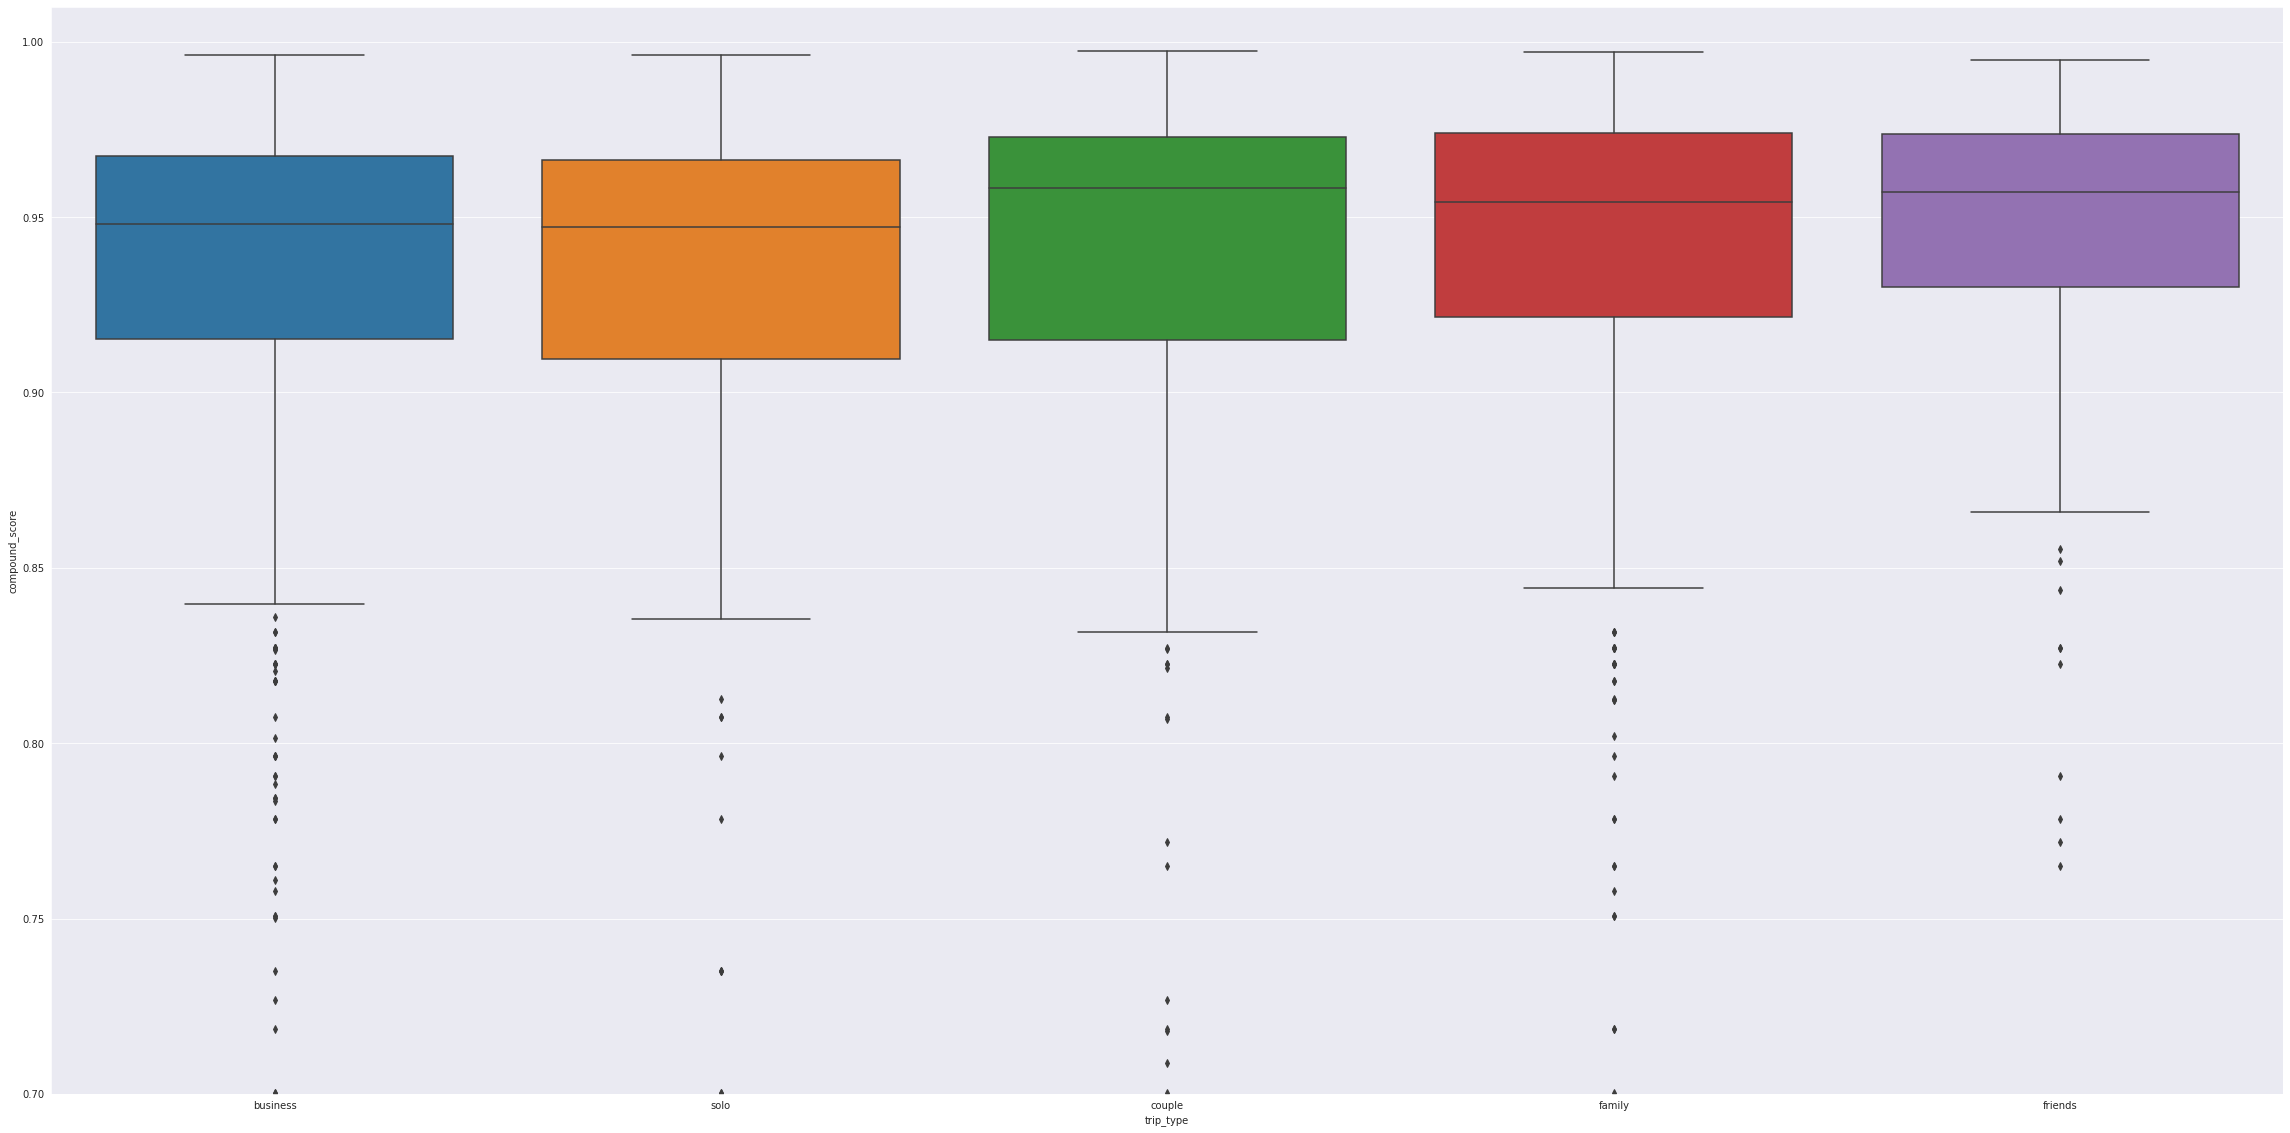

In [ ]:
plt.figure(figsize=(40,20))
plt.ylim(0.7, 1.01)
#sns.boxplot(y='compound_score', x='dominant_topic', hue='trip_type', hue_order=order, data=df_covid[df_covid.dominant_topic==0]);
sns.boxplot(y='compound_score', x='trip_type', order=order, data=df_covid[df_covid.dominant_topic==0]);

maintain the same colour code and also try different shading/filling for each trip_type

**staff behaviour and compliance with covid norms**

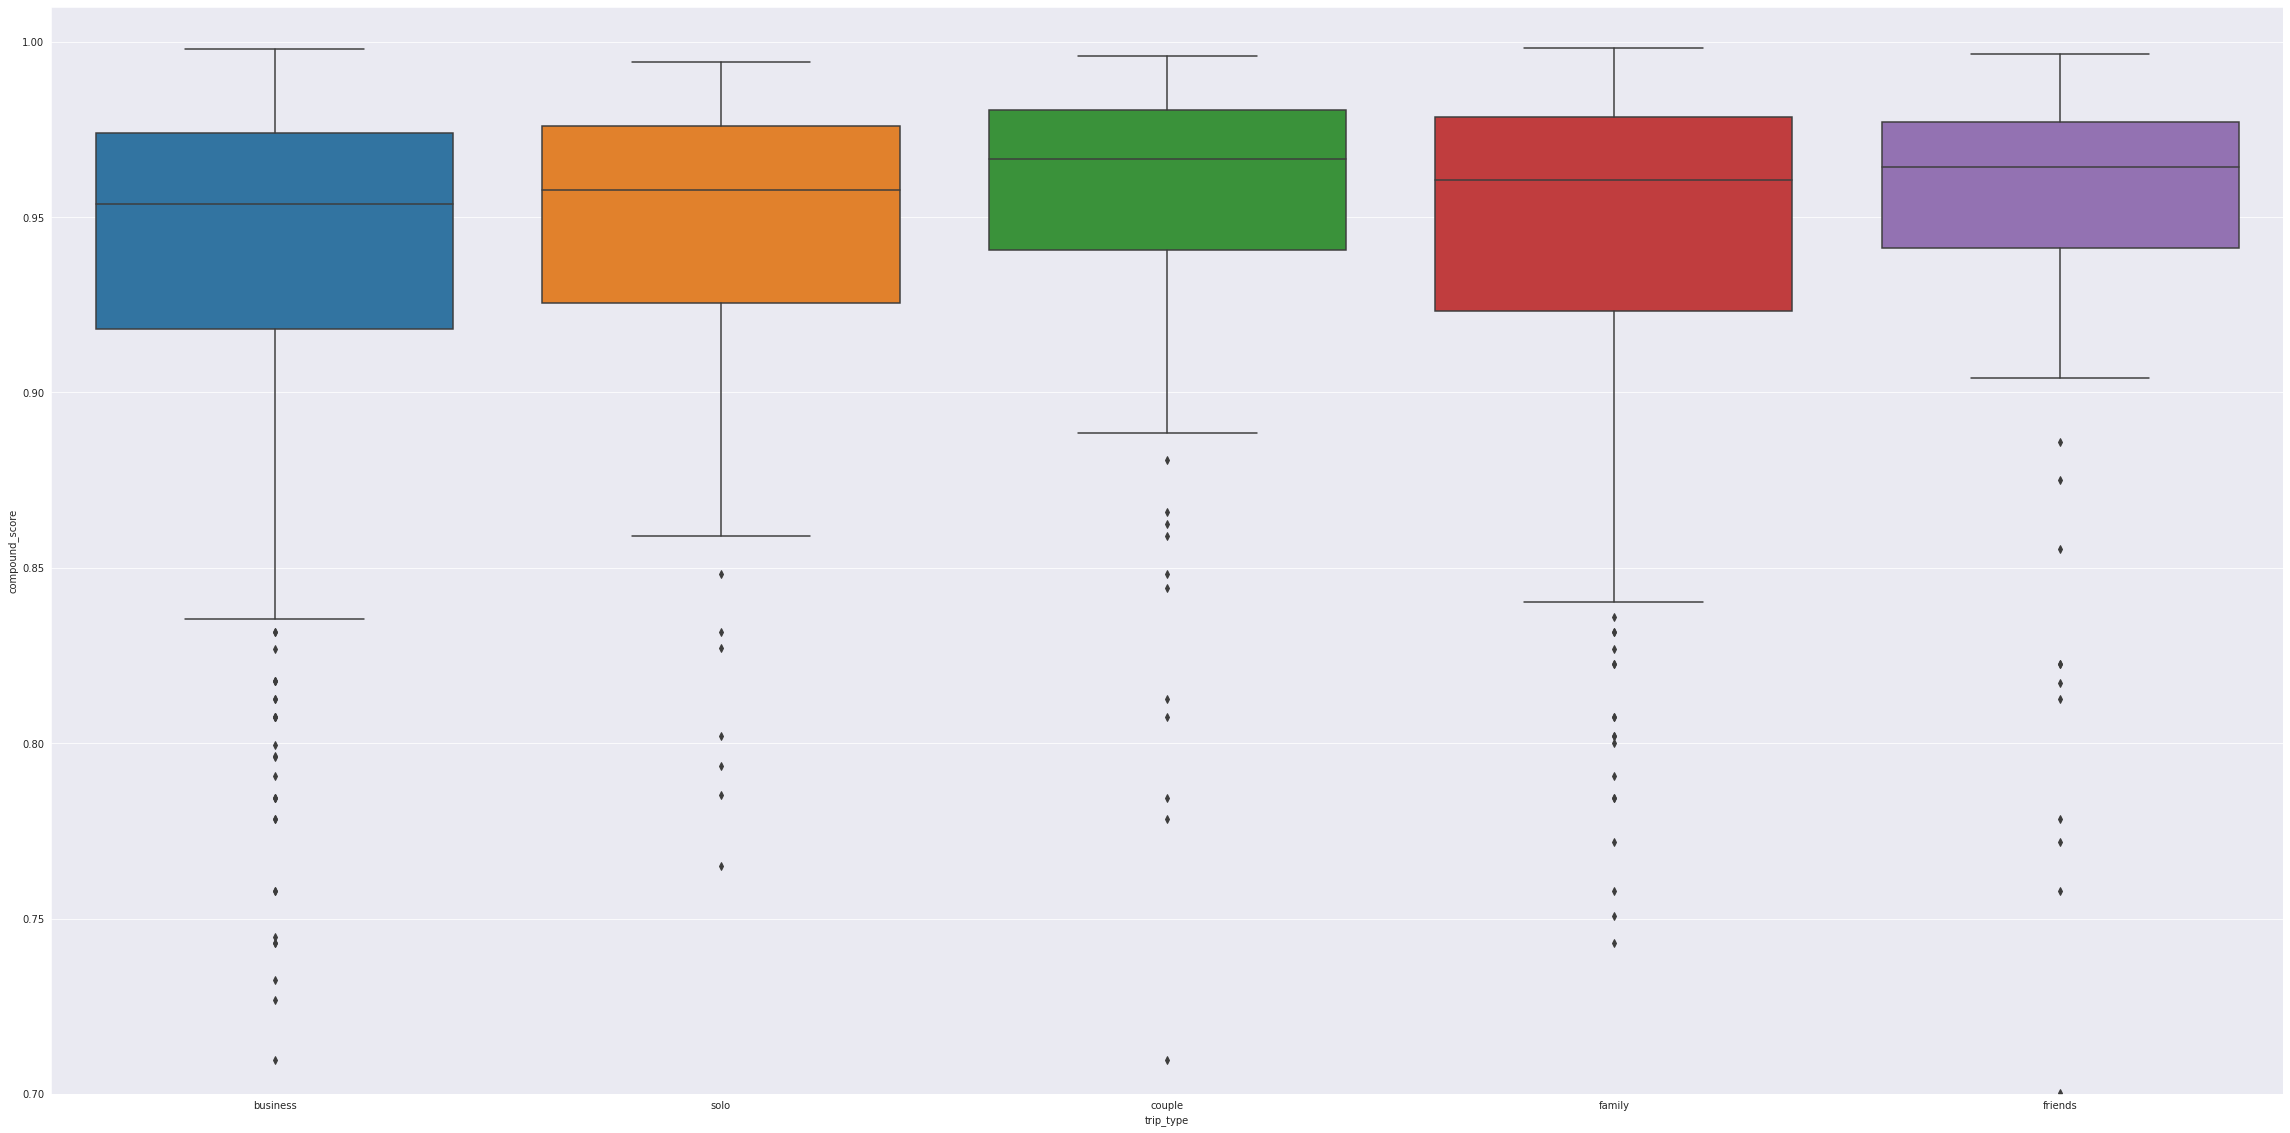

In [ ]:
plt.figure(figsize=(40,20))
plt.ylim(0.7, 1.01)
sns.boxplot(y='compound_score', x='trip_type', order=order, data=df_covid[df_covid.dominant_topic==1]);

**complaints**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


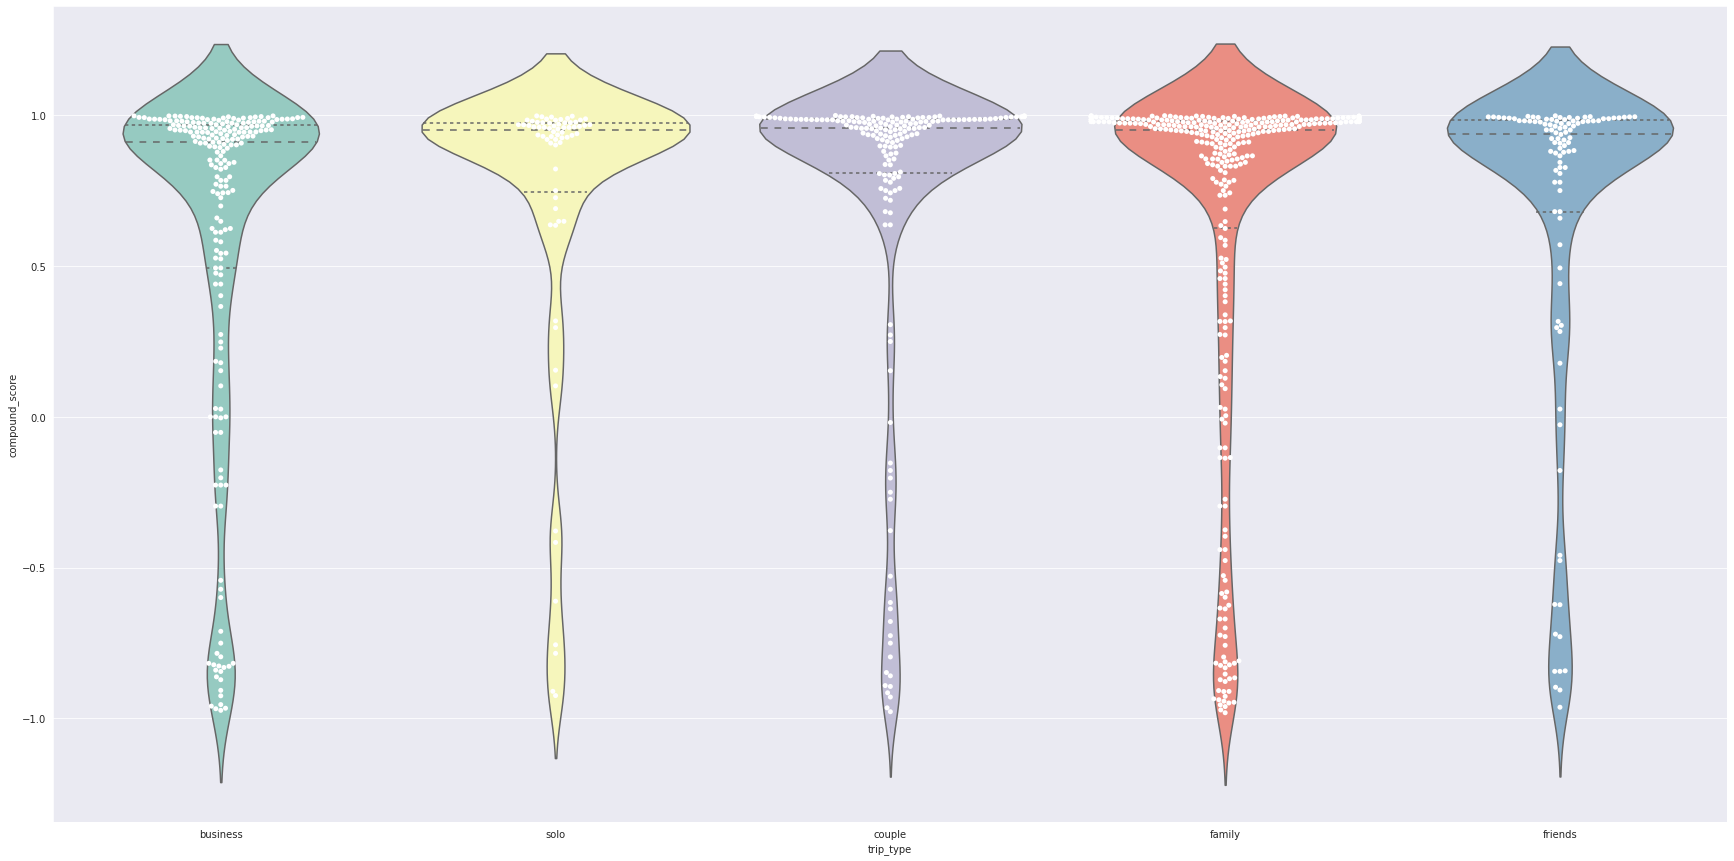

In [ ]:
plt.figure(figsize=(30,15))
sns.violinplot(y='compound_score', x='trip_type', scale='area', #all violins have the same area
              #inner='stick',
               bw=.2, data=df_covid[df_covid.dominant_topic==2], inner='quartile', order=order, palette='Set3',) #color='.8',)

#sns.stripplot(y='compound_score', x='trip_type', data=df_covid[df_covid.dominant_topic==2])
sns.swarmplot(y='compound_score', x='trip_type', data=df_covid[df_covid.dominant_topic==2], color='white', order=order);

**quality of stay and safety measures taken by hotel**

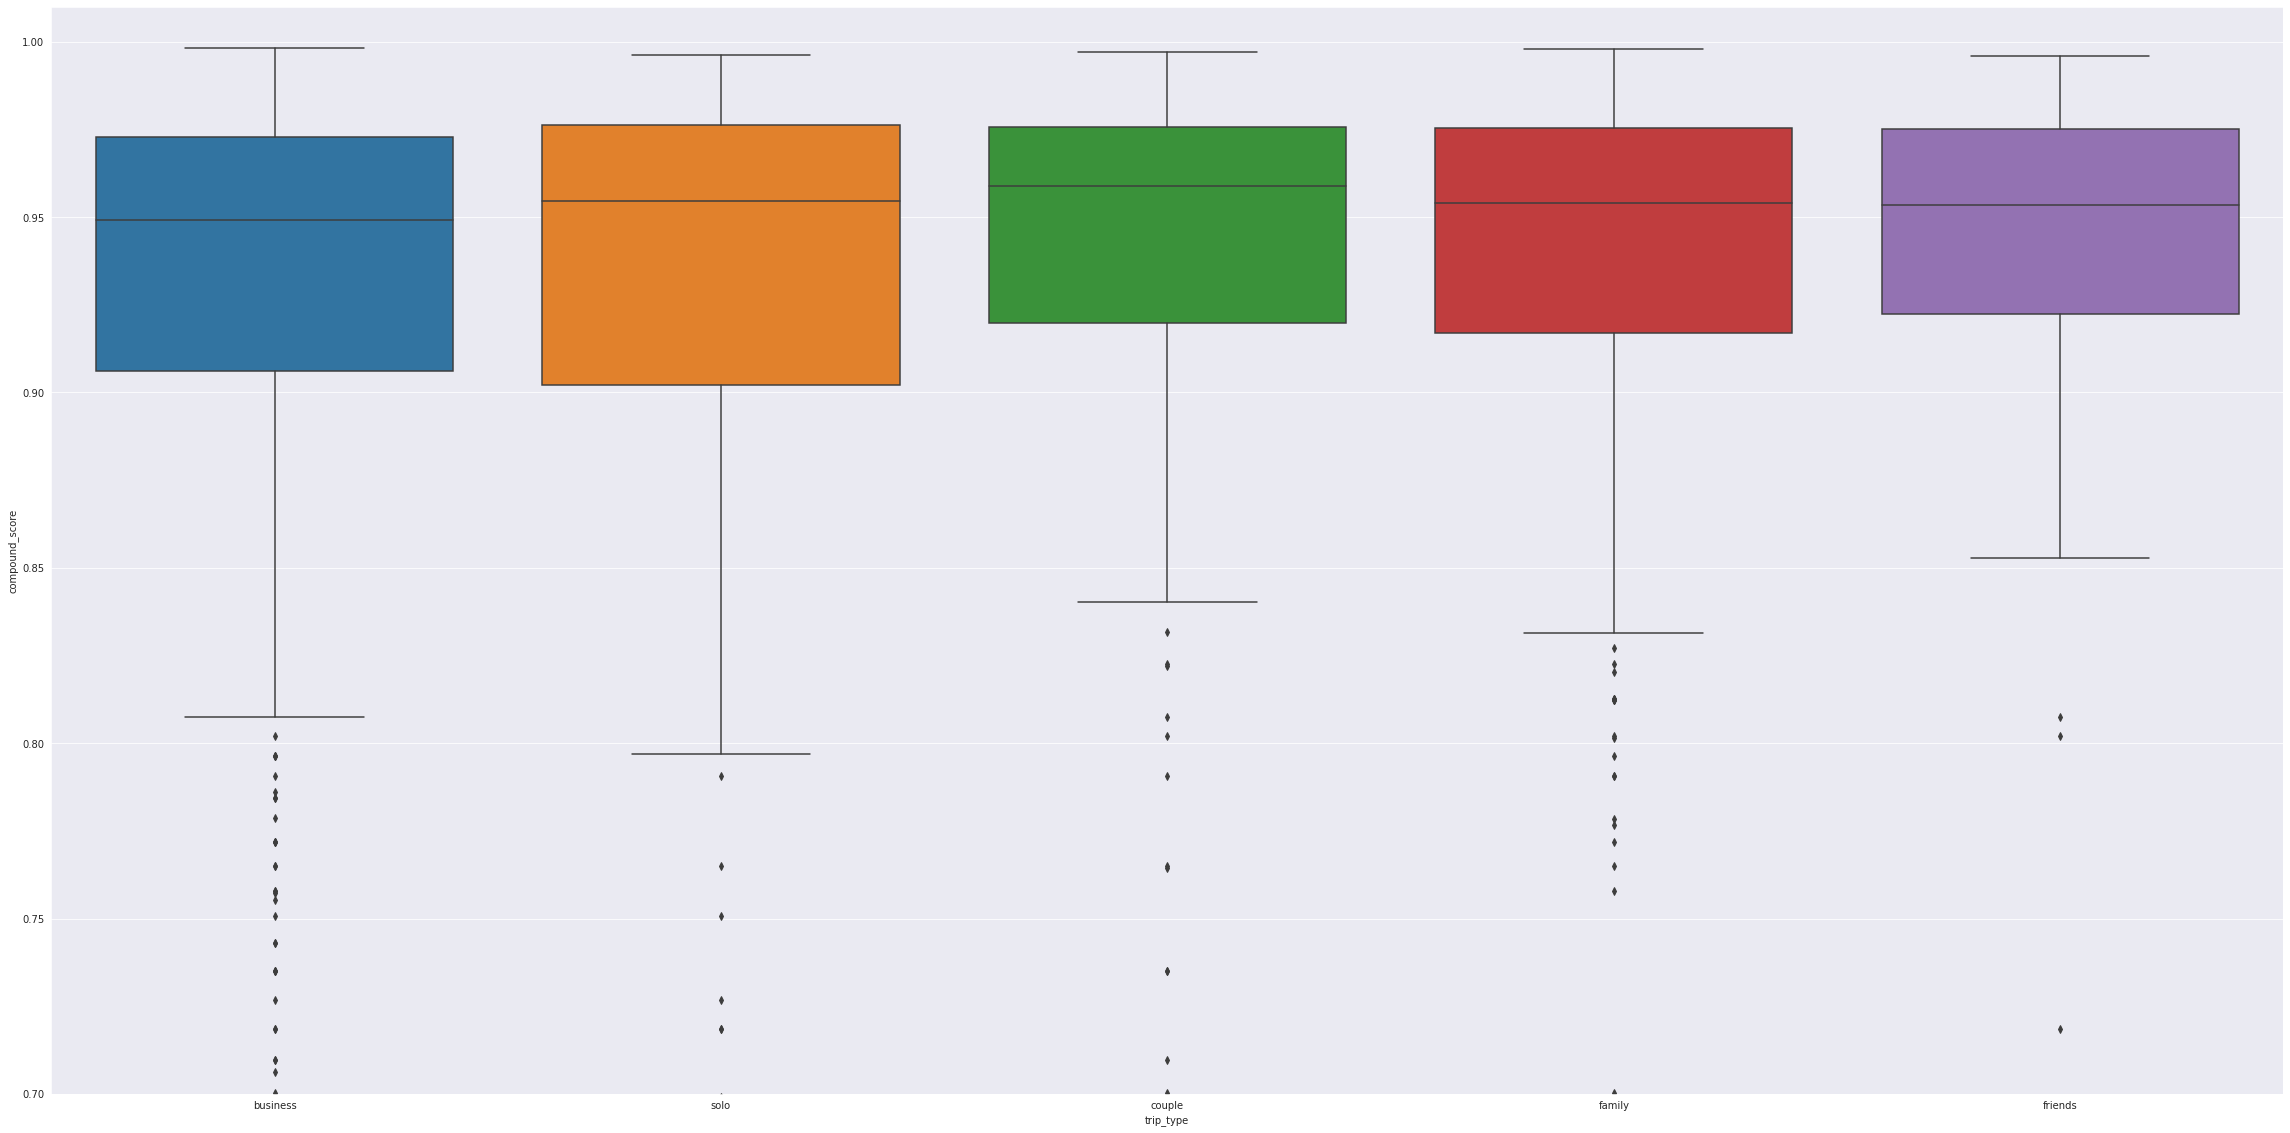

In [ ]:
plt.figure(figsize=(40,20))
plt.ylim(0.7, 1.01)
sns.boxplot(y='compound_score', x='trip_type', order = order, data=df_covid[df_covid.dominant_topic==3]);

**hospitality**

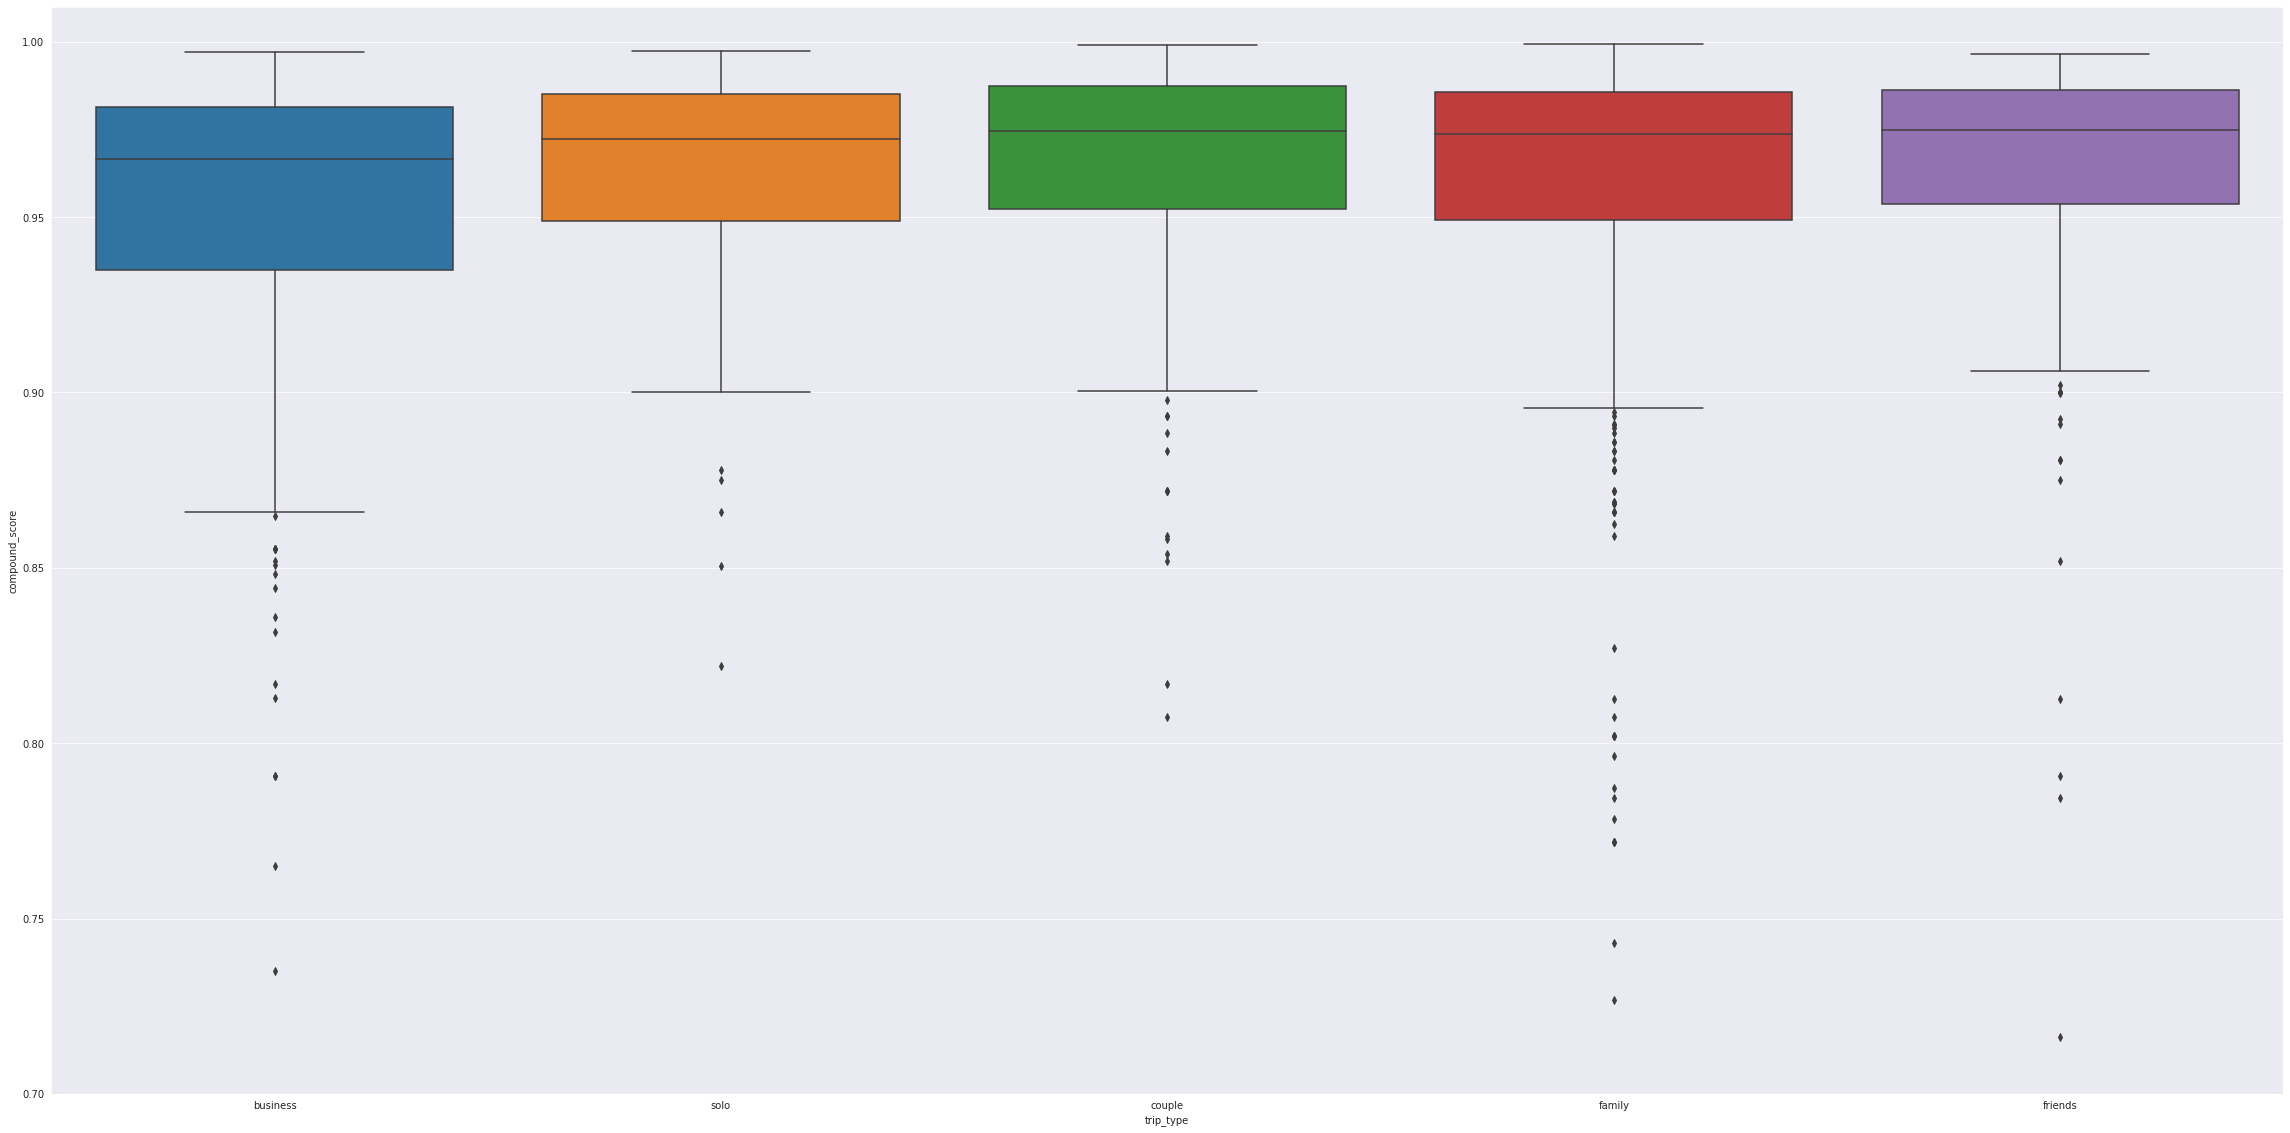

In [ ]:
plt.figure(figsize=(40,20))
plt.ylim(0.7,1.01)
sns.boxplot(y='compound_score', x='trip_type', order = order, data=df_covid[df_covid.dominant_topic==4]);

**property, scenery, amenities**

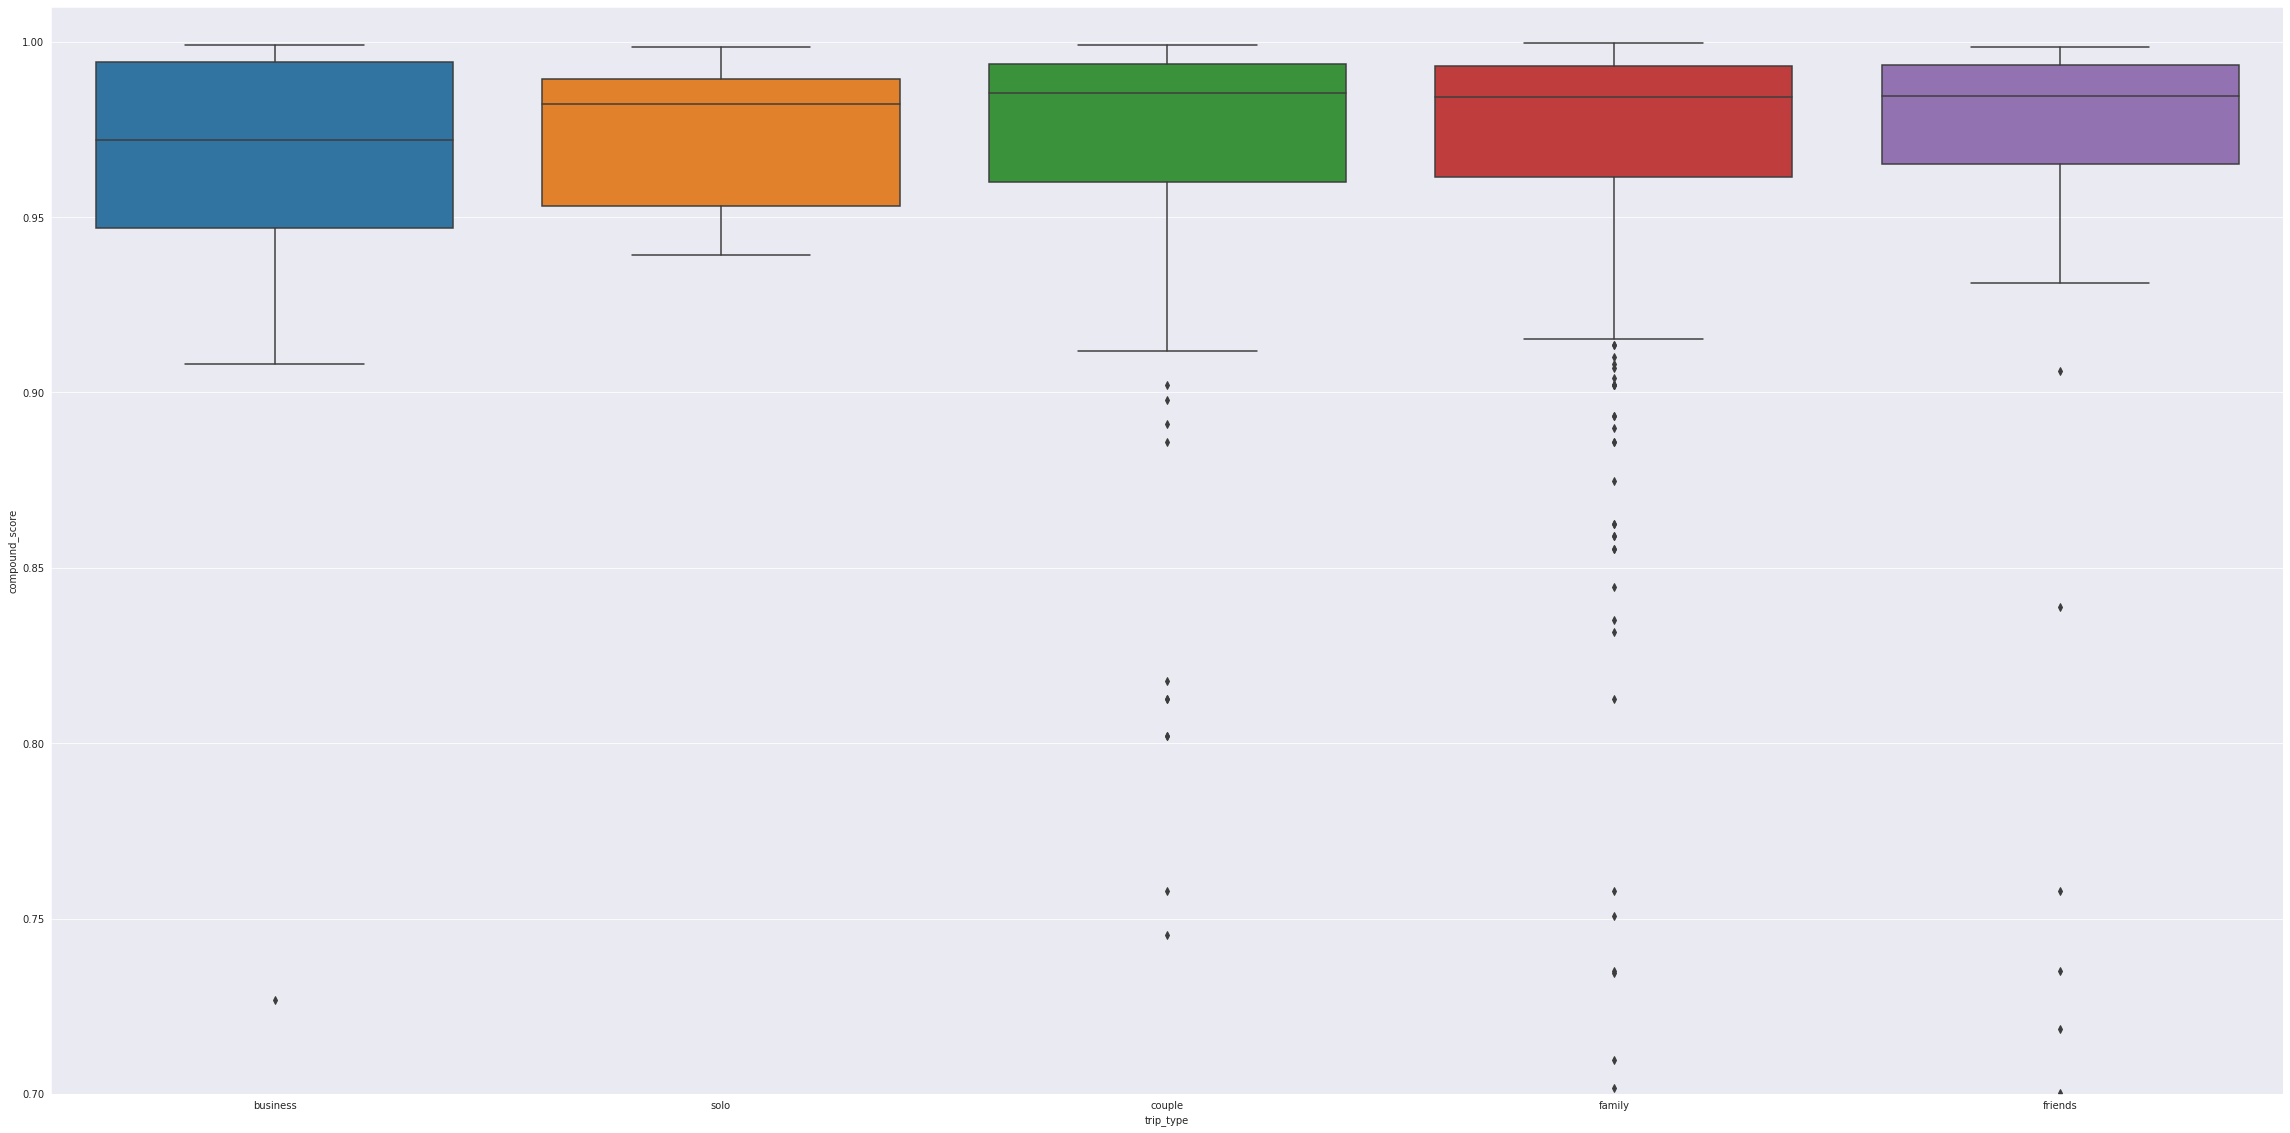

In [ ]:
plt.figure(figsize=(40,20))
plt.ylim(0.7,1.01)
sns.boxplot(y='compound_score', x='trip_type', order = order, data=df_covid[df_covid.dominant_topic==5]);

**overall experience**

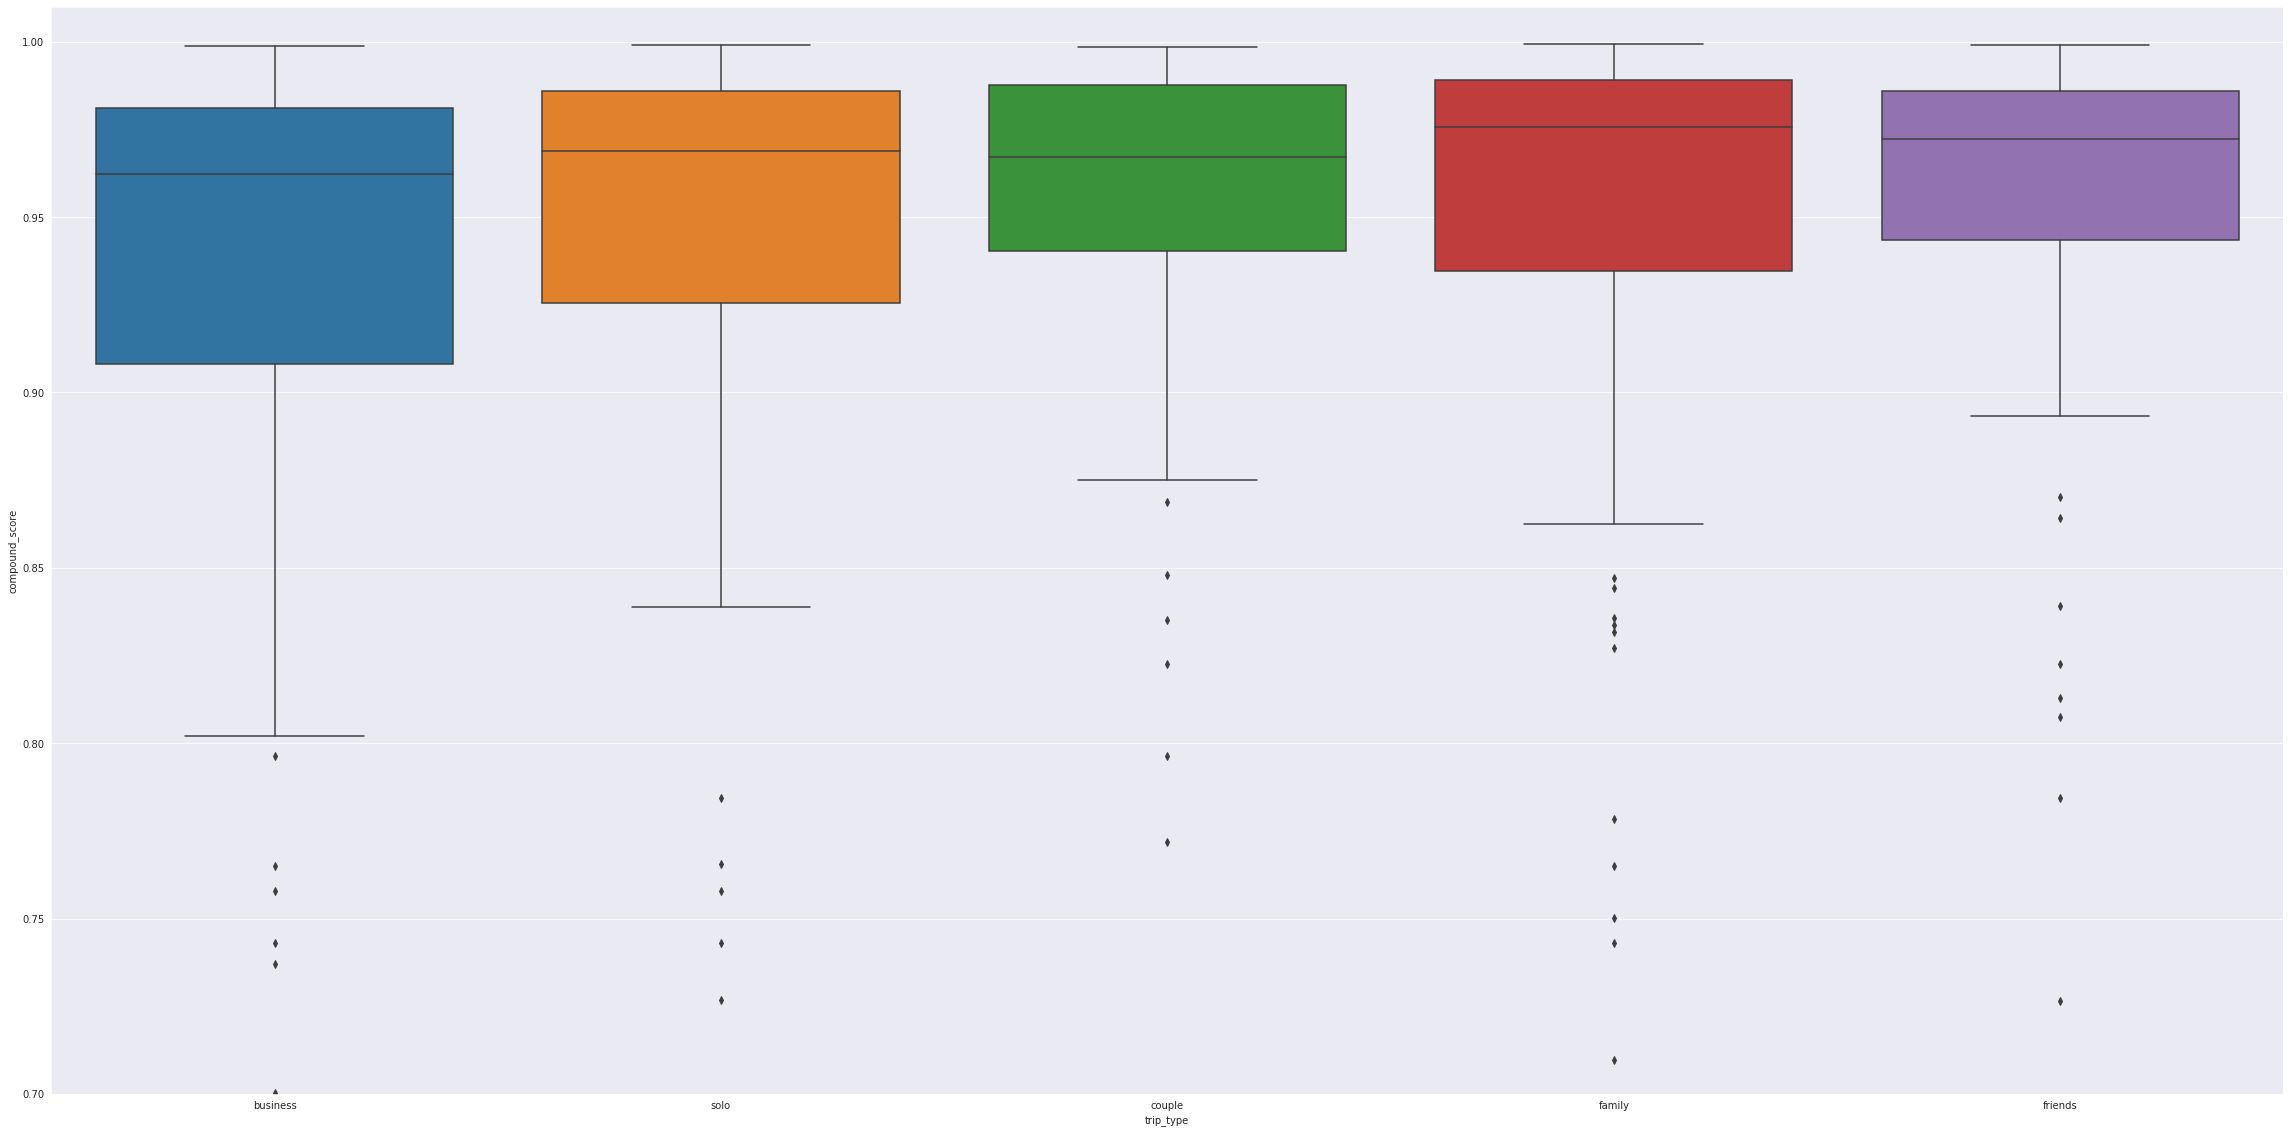

In [ ]:
plt.figure(figsize=(40,20))
plt.ylim(0.7,1.01)
sns.boxplot(y='compound_score', x='trip_type', order=order, data=df_covid[df_covid.dominant_topic==6]);

**resort location/leisure travel**

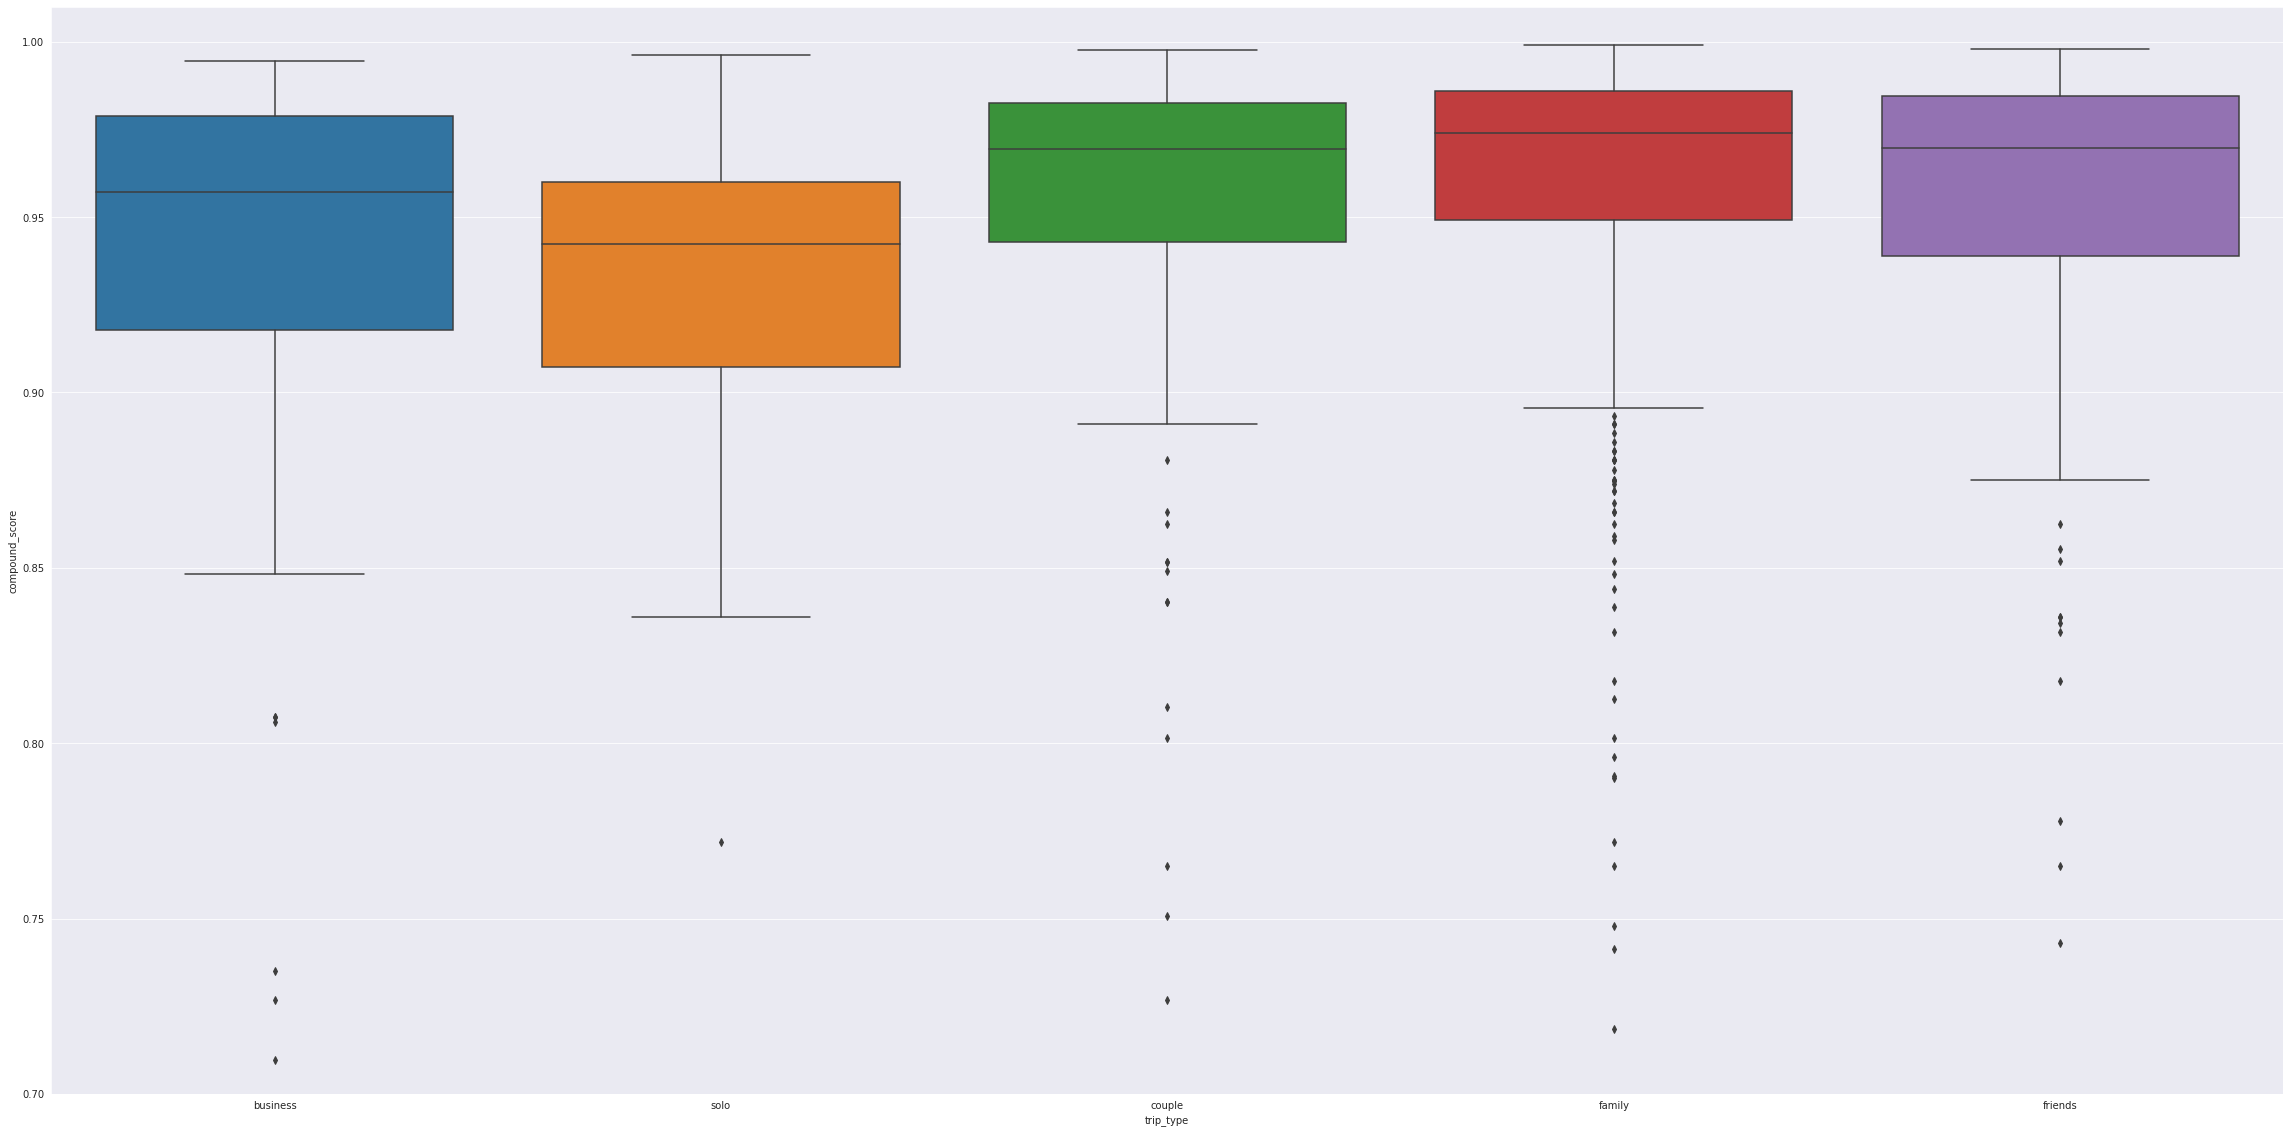

In [ ]:
plt.figure(figsize=(40,20))
plt.ylim(0.7,1.01)
plt.xlabel('Dominant Topic')
sns.boxplot(y='compound_score', x='trip_type', order=order, data=df_covid[df_covid.dominant_topic==7])
plt.show()

**compliments to hotel team**

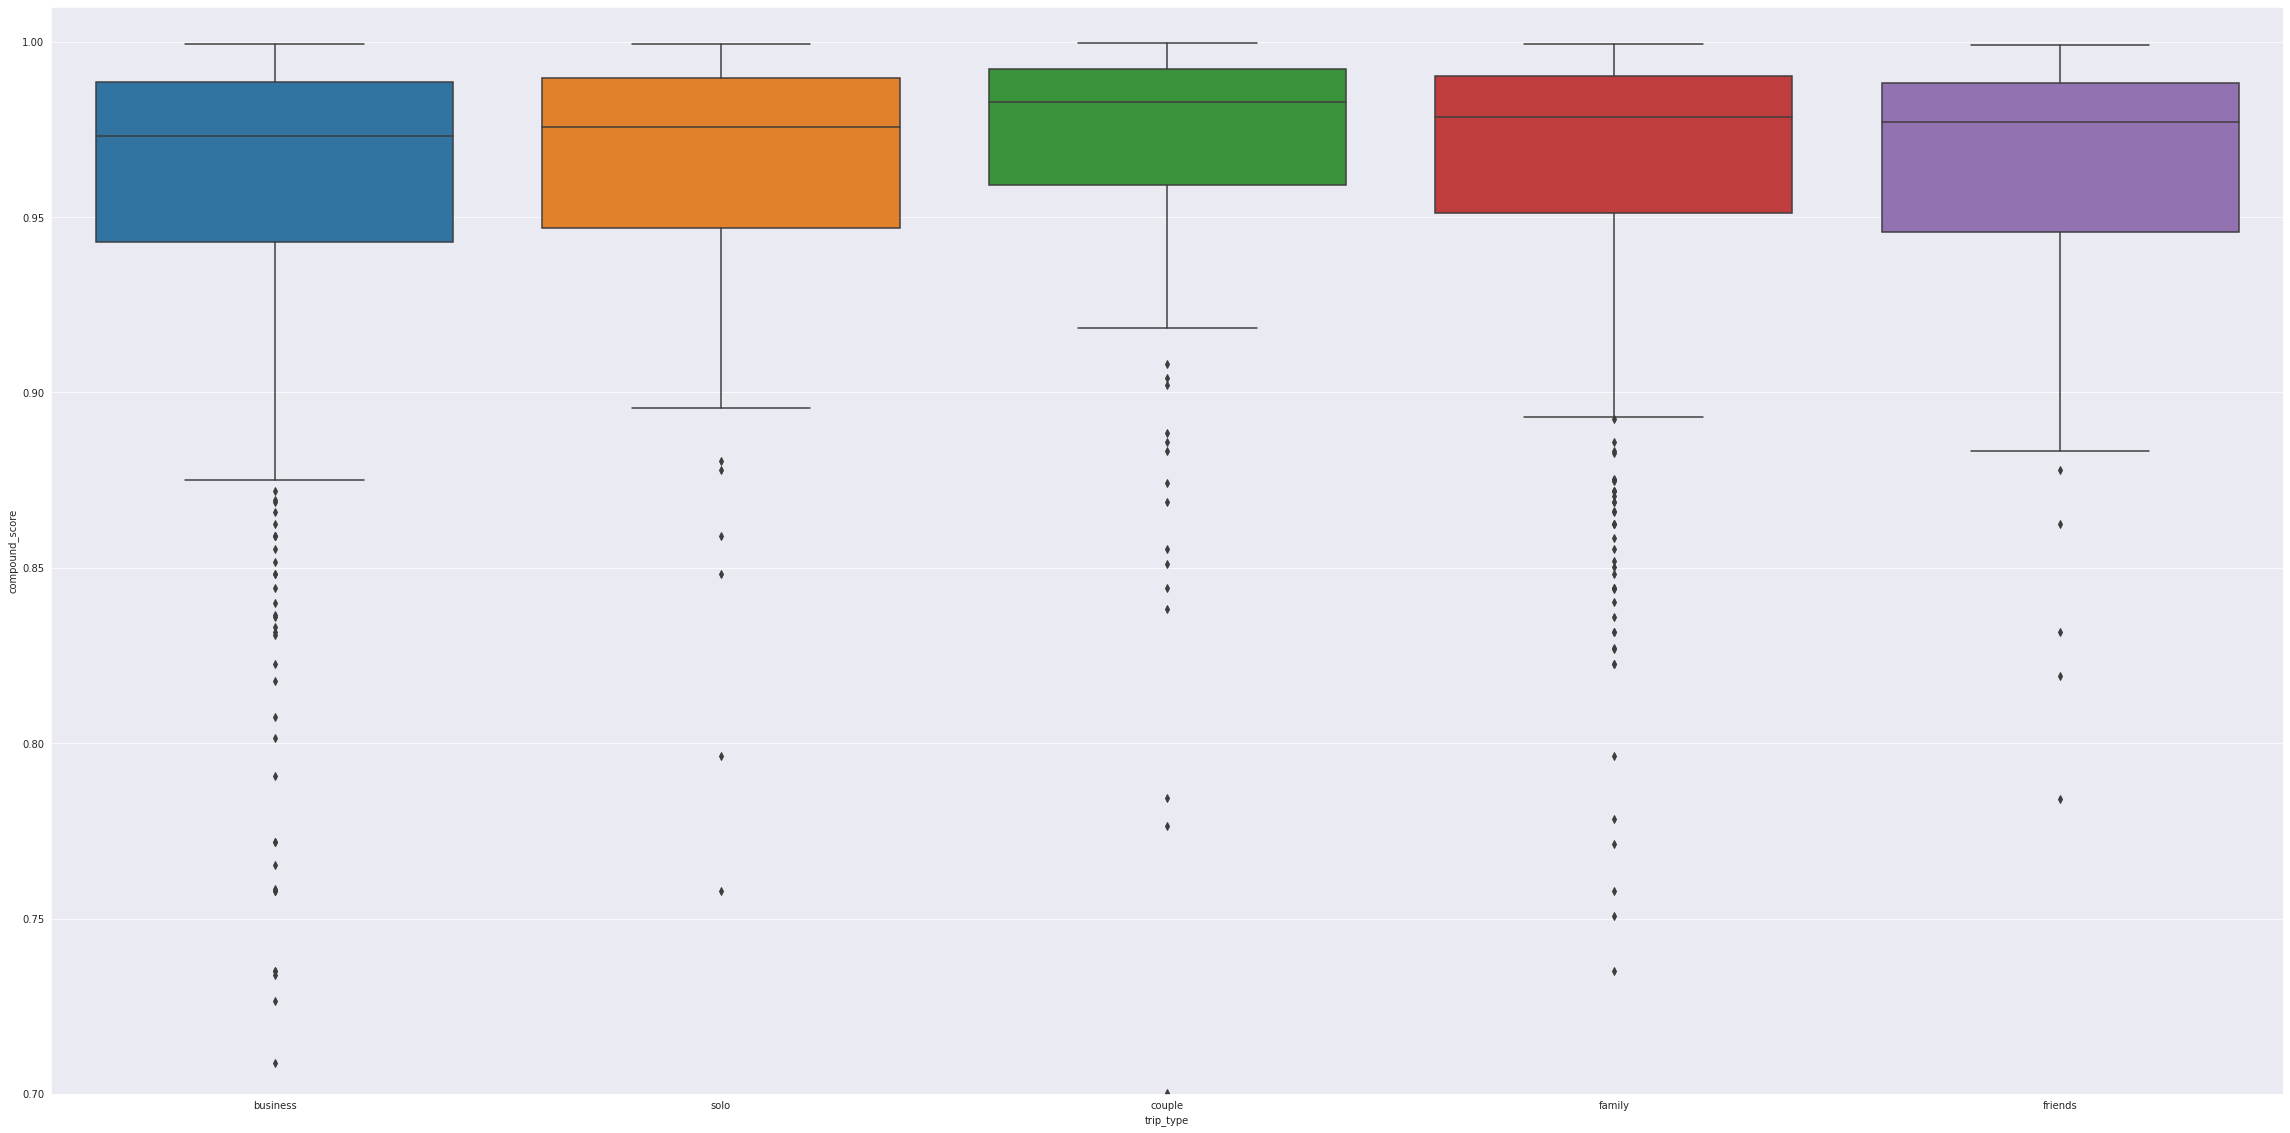

In [ ]:
plt.figure(figsize=(40,20))
plt.ylim(0.7,1.01)
plt.xlabel('Dominant Topic')
sns.boxplot(y='compound_score', x='trip_type', order=order, data=df_covid[df_covid.dominant_topic==8])
plt.show()

### Precautions

In [ ]:
df_covid.groupby('dominant_topic').agg({'compound_score':'mean'})

compound_score
dominant_topic                
0                     0.930645
1                     0.935800
2                     0.658852
3                     0.916271
4                     0.956665
5                     0.953663
6                     0.916857
7                     0.948463
8                     0.951491

In [ ]:
df_covid_0 = df_covid[df_covid.dominant_topic==0]
df_covid_1 = df_covid[df_covid.dominant_topic==1]
df_covid_3 = df_covid[df_covid.dominant_topic==3]

In [ ]:
df_covid_0[df_covid_0.precautions.isna()].compound_score.mean()

0.9262797183098601

In [ ]:
df_covid_1[df_covid_1.precautions.isna()].compound_score.mean()

0.9088154255319151

In [ ]:
df_covid_3[df_covid_3.precautions.isna()].compound_score.mean()

0.9146160337552738

about 10% of the hotels haven't listed precautions on tripadvisor but still have good reviews on precautions taken

In [ ]:
len(df_covid[df_covid.dominant_topic==0])

3298

In [ ]:
df_covid[df_covid.dominant_topic==0].precautions.isna().sum()

355

In [ ]:
355/3298*100

10.764099454214676

In [ ]:
len(df_covid[df_covid.dominant_topic==1])

2111

In [ ]:
df_covid[df_covid.dominant_topic==1].precautions.isna().sum()

188

In [ ]:
188/2111*100

8.905731880625297

about 10% of hotels don't list their precautions on tripadvisor but still have pretty positive reviews regarding covid precautions

do freq table for this

In [ ]:
df_covid.shape

(18644, 19)

In [ ]:
df_covid.precautions = df_covid.precautions.astype(str)

precautions_count = []

for i in df_covid.precautions.str.split('\n'):
  precautions_count.append(len(i))

df_covid['precautions_count'] = precautions_count

In [ ]:
pd.qcut(df_covid.precautions_count, 5, duplicates='drop').value_counts()

(12.0, 14.0]    6727
(10.0, 12.0]    4424
(0.999, 5.0]    3870
(5.0, 10.0]     3623
Name: precautions_count, dtype: int64

In [ ]:
6727+4424+3870+3623

18644

In [ ]:
pcb = pd.qcut(df_covid.precautions_count, 5, duplicates='drop', labels=[1, 2, 3, 4])

In [ ]:
df_covid['precautions_count_binned'] = pcb

In [ ]:
df_covid.head()

hotel_name  ... price_mean
0       Park Inn by Radisson New Delhi Lajpat Nagar  ...     7440.0
1                           Dewdrop Intercity Hotel  ...     3080.0
2                      The Golden Palms Hotel & Spa  ...     4368.5
3                                        Hotel Aura  ...     3006.0
4  ITC Maurya, a Luxury Collection Hotel, New Delhi  ...    13229.5

[5 rows x 22 columns]

In [ ]:
df_covid['precautions_count_binned'].value_counts()

4    6727
3    4424
1    3870
2    3623
Name: precautions_count_binned, dtype: int64

In [ ]:
df_covid['precautions_count_binned']

0        1
1        1
2        1
3        1
4        3
        ..
18639    4
18640    4
18641    4
18642    4
18643    4
Name: precautions_count_binned, Length: 18644, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

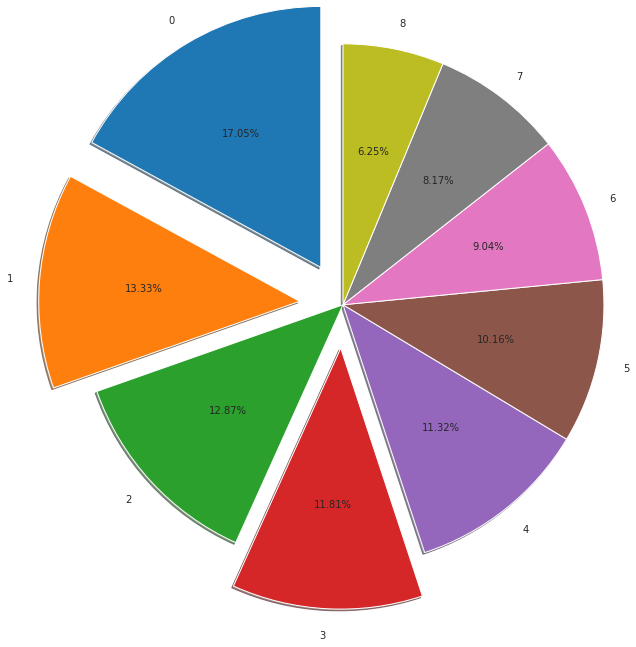

In [ ]:
plt.pie( df_covid[ df_covid['precautions_count_binned'] == 1 ].dominant_topic.value_counts(),
         startangle=90,
         explode=(0.5, 0.5, 0, 0.5, 0, 0, 0, 0, 0),
         autopct='%1.2f%%',
         shadow=True,
         radius=3,
         labels=[0,1,2,3,4,5,6,7,8] );

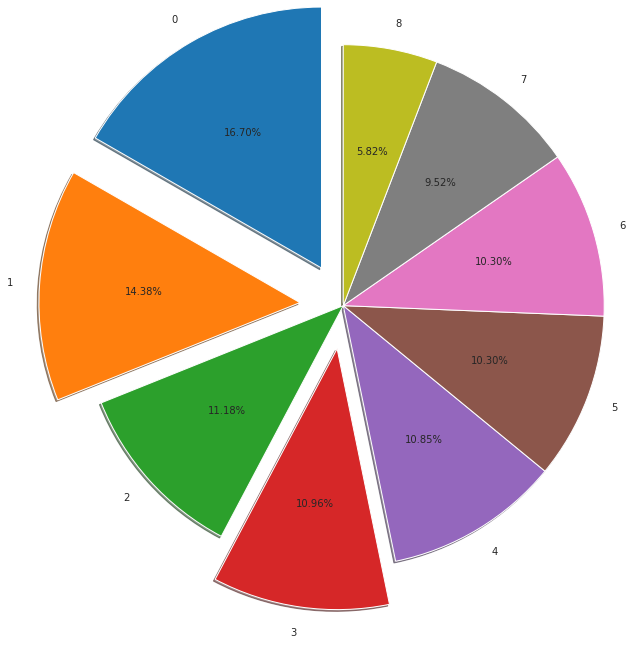

In [ ]:
plt.pie( df_covid[ df_covid['precautions_count_binned'] == 2 ].dominant_topic.value_counts(),
         startangle=90,
         explode=(0.5, 0.5, 0, 0.5, 0, 0, 0, 0, 0),
         autopct='%1.2f%%',
         shadow=True,
         radius=3,
         labels=[0,1,2,3,4,5,6,7,8] );

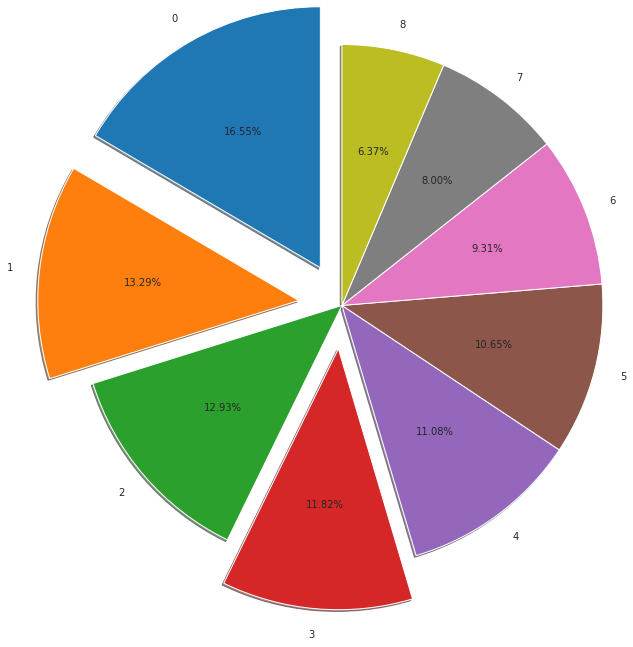

In [ ]:
plt.pie( df_covid[ df_covid['precautions_count_binned'] == 3 ].dominant_topic.value_counts(),
         startangle=90,
         explode=(0.5, 0.5, 0, 0.5, 0, 0, 0, 0, 0),
         autopct='%1.2f%%',
         shadow=True,
         radius=3,
         labels=[0,1,2,3,4,5,6,7,8] );

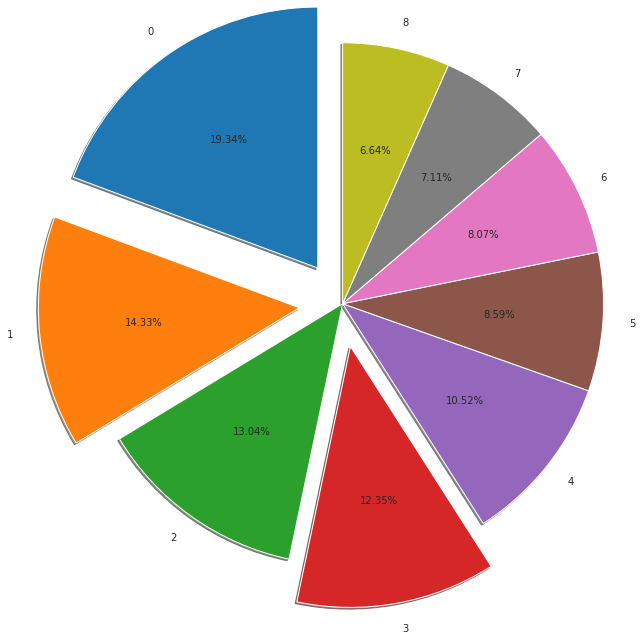

In [ ]:
plt.pie( df_covid[ df_covid['precautions_count_binned'] == 4 ].dominant_topic.value_counts(),
         startangle=90,
         explode=(0.5, 0.5, 0, 0.5, 0, 0, 0, 0, 0),
         autopct='%1.2f%%',
         shadow=True,
         radius=3,
         labels=[0,1,2,3,4,5,6,7,8] );

find smth to justify no variation

H0: no of precautions taken are influencing spread of reviews
H1: H0'

check if chi2 is the right thing to do

In [ ]:
pd.crosstab(df_covid.precautions_count_binned, df_covid.dominant_topic)

dominant_topic               0    1    2    3    4    5    6    7    8
precautions_count_binned                                              
1                          660  393  498  438  350  516  242  457  316
2                          605  397  345  373  405  373  211  521  393
3                          732  490  412  523  588  354  282  471  572
4                         1301  831  578  964  877  447  478  543  708

In [ ]:
observed = pd.crosstab(df_covid.precautions_count_binned, df_covid.dominant_topic)
expected = stats.chi2_contingency(observed)[3]
chi_square = sum( [ (o-e)**2/e for o,e in zip(observed.values, expected) ] )
chi_sq_stat = chi_square[0] + chi_square[1]

In [ ]:
chi_sq_stat

28.15481182095062

In [ ]:
critical_val = stats.chi2.ppf(q=0.95, df=24)
p_val = 1 - stats.chi2.cdf(chi_sq_stat, 24)

In [ ]:
critical_val

36.41502850180731

In [ ]:
p_val

0.2535642773324819

the chi2 test is in line with our analysis as critical_val > chi_sq_stat and p_val > 0.05. hence we can conclude that dominant topic and the number of precautions taken are statistically independent

### who is the most concerned?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


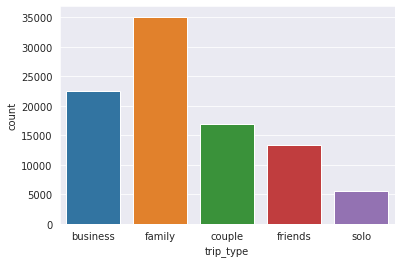

In [ ]:
sns.countplot(df_new.trip_type, order=['business', 'family', 'couple', 'friends', 'solo']);

In [ ]:
df_new.trip_type.value_counts()

family      35074
business    22581
couple      16934
friends     13295
solo         5533
Name: trip_type, dtype: int64

try a different visualisation (bar)

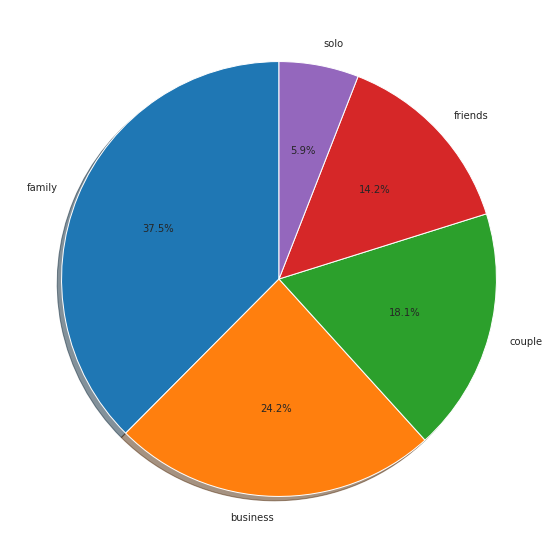

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(df_new.trip_type.value_counts(),
        labels=['family', 'business', 'couple', 'friends', 'solo'],
        autopct='%1.1f%%',
        shadow=True,
        startangle=90);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


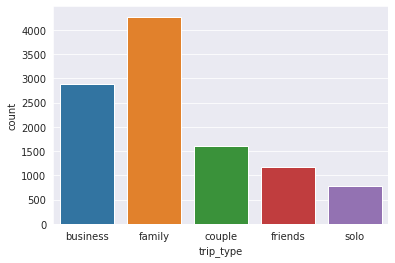

In [ ]:
sns.countplot(df_covid.trip_type, order=['business', 'family', 'couple', 'friends', 'solo'])

In [ ]:
df_covid.trip_type.value_counts()

family      4267
business    2875
couple      1598
friends     1181
solo         771
Name: trip_type, dtype: int64

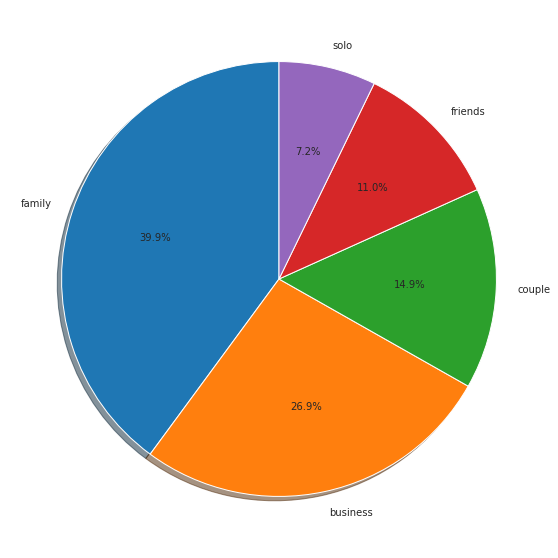

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(df_covid.trip_type.value_counts(),
        labels=['family', 'business', 'couple', 'friends', 'solo'],
        autopct='%1.1f%%',
        shadow=True,
        startangle=90);

slight increase in solo, business and family and a decrease in friends and couple suggesting that the former might be a bit more concerned. do a table for side by side comparisons.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


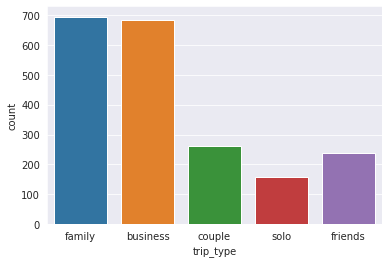

In [ ]:
sns.countplot(df_covid[df_covid.dominant_topic==0].trip_type);

In [ ]:
df_covid[df_covid.dominant_topic==1].trip_type.value_counts()

family      519
business    408
friends     144
couple      136
solo         98
Name: trip_type, dtype: int64

In [ ]:
df_covid[df_covid.dominant_topic==3].trip_type.value_counts()

business    614
family      388
solo        165
couple      156
friends     130
Name: trip_type, dtype: int64

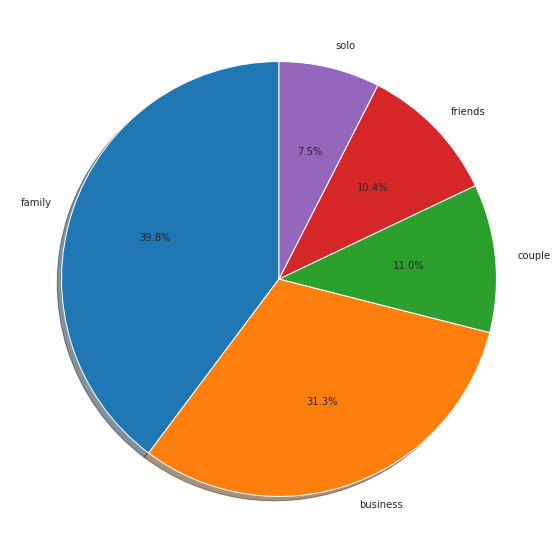

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(df_covid[df_covid.dominant_topic==1].trip_type.value_counts(),
        labels=['family', 'business', 'couple', 'friends', 'solo'],
        autopct='%1.1f%%',
        shadow=True,
        startangle=90);

**comparison with df_covid:**

good increase in business, slight increase in solo and significant decrease in family, friends and couple almost the same

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


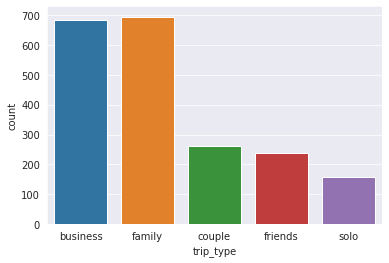

In [ ]:
sns.countplot(df_covid[df_covid.dominant_topic==0].trip_type, order=['business', 'family', 'couple', 'friends', 'solo']);

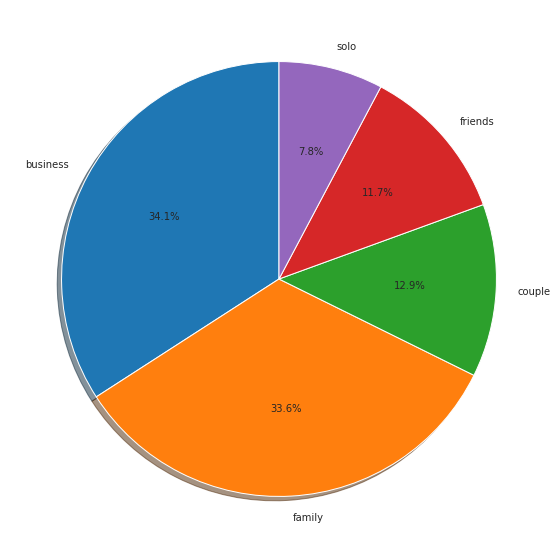

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(df_covid[df_covid.dominant_topic==0].trip_type.value_counts(),
        labels=['business', 'family', 'couple', 'friends', 'solo'],
        autopct='%1.1f%%',
        shadow=True,
        startangle=90);

**comparison with df_covid:**

significant increase in business and a slight decrease in all the others

do it for all 8 topics (8 rows), 5 columns (trip_types) ; 8x5 visualisation ; do a topic x trip_type crosstab and try tests

In [ ]:
df_topic_tt = pd.crosstab(df_covid.dominant_topic, df_covid.trip_type)

In [ ]:
df_topic_tt

trip_type       business  couple  family  friends  solo
dominant_topic                                         
0                    684     262     695      238   158
1                    408     136     519      144    98
2                    211     180     354      100    68
3                    614     156     388      130   165
4                    253     267     580      147    59
5                     49     177     414       79    17
6                    187      98     219       75    72
7                     75     160     612      176    26
8                    394     162     486       92   108

In [ ]:
df_topic_tt.iloc[:,4]

dominant_topic
0    158
1     98
2     68
3    165
4     59
5     17
6     72
7     26
8    108
Name: solo, dtype: int64

In [ ]:
df_topic_tt_perc = pd.DataFrame(columns=df_topic_tt.columns)

for i,j in zip(df_topic_tt.columns, range(5)):
  a = df_topic_tt[i].sum(axis=0)
  c=[]
  for k in df_topic_tt.iloc[:,j]:
    b = k/a
    c.append(b)
  df_topic_tt_perc[i] = c

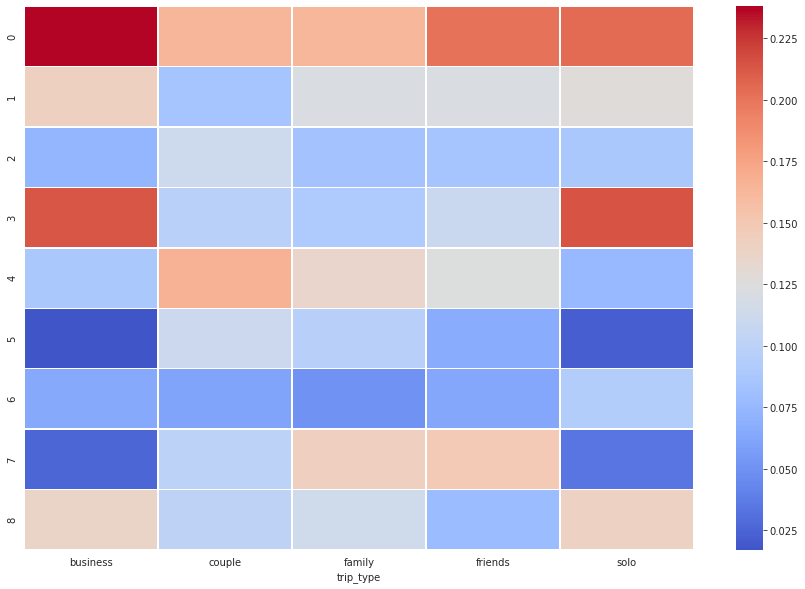

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_topic_tt_perc, linewidths=0.5, center=0.125, cmap='coolwarm')

replace the y axis numbers with topic headings. make sure all text in the figures are at least font size 10

In [ ]:
observed = df_topic_tt
expected = stats.chi2_contingency(observed)[3]
chi_square = sum( [ (o-e)**2/e for o,e in zip(observed.values, expected) ] )
chi_sq_stat = chi_square[0] + chi_square[1]

In [ ]:
chi_sq_stat

603.9780307603226

In [ ]:
critical_val = stats.chi2.ppf(q=0.95, df=32)
p_val = 1 - stats.chi2.cdf(chi_sq_stat, 32)

In [ ]:
critical_val

46.19425952027847

In [ ]:
p_val

0.0

there is some statistically significant relation b/w trip_type and dominant_topic

In [ ]:
df_topic_tt

dominant_topic    0    1    2    3    4    5    6    7
trip_type                                             
business        167  322  128   98   70  514  299  256
couple           42   94   78   97  122  132   51   98
family          108  211   91  184  257  339  196  253
friends          32  100   40   57   76  147   49  101
solo             51  110   43   20   30  123   78   93

In [ ]:
!pip install squarify

In [ ]:
import squarify

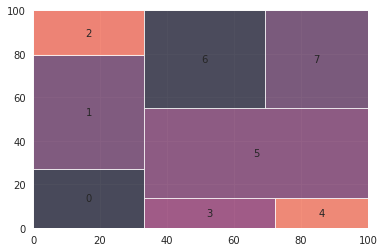

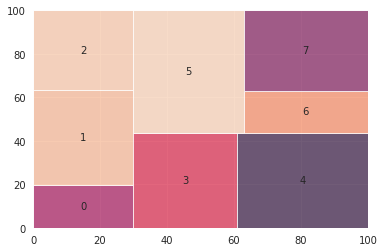

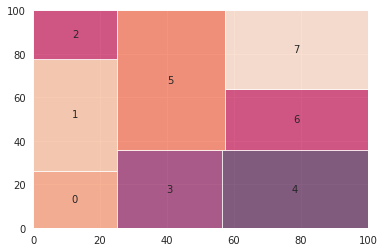

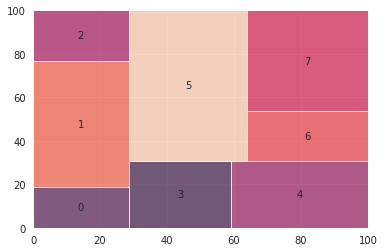

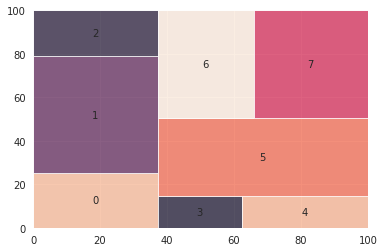

In [ ]:
for i in range(5):
  squarify.plot(sizes=df_topic_tt.iloc[i], label=[0,1,2,3,4,5,6,7], alpha=0.7)
  plt.show()

###topic trend with time

In [ ]:
df_covid.head()

hotel_name  ... compound_score
0       Park Inn by Radisson New Delhi Lajpat Nagar  ...         0.9936
1                           Dewdrop Intercity Hotel  ...         0.9860
2                      The Golden Palms Hotel & Spa  ...         0.9638
3                                        Hotel Aura  ...         0.8689
4  ITC Maurya, a Luxury Collection Hotel, New Delhi  ...         0.9371

[5 rows x 19 columns]

In [ ]:
df_covid = pd.get_dummies(df_covid, columns=['dominant_topic'], drop_first=False)

In [ ]:
df_covid.head()

hotel_name  ... dominant_topic_8
0       Park Inn by Radisson New Delhi Lajpat Nagar  ...                0
1                           Dewdrop Intercity Hotel  ...                0
2                      The Golden Palms Hotel & Spa  ...                0
3                                        Hotel Aura  ...                0
4  ITC Maurya, a Luxury Collection Hotel, New Delhi  ...                0

[5 rows x 27 columns]

In [ ]:
df_covid['Date'] = pd.to_datetime(df_covid.Date)

In [ ]:
df_topics_with_time = df_covid.groupby(['Date'], as_index=False).agg({'dominant_topic_0':'sum',
                                                                      'dominant_topic_1':'sum',
                                                                      'dominant_topic_2':'sum',
                                                                      'dominant_topic_3':'sum',
                                                                      'dominant_topic_4':'sum',
                                                                      'dominant_topic_5':'sum',
                                                                      'dominant_topic_6':'sum',
                                                                      'dominant_topic_7':'sum'
                                                                    })

In [ ]:
df_topics_with_time.head()

Date  dominant_topic_0  ...  dominant_topic_6  dominant_topic_7
0 2020-02-01               2.0  ...                 8               7.0
1 2020-03-01              29.0  ...                63              15.0
2 2020-04-01              10.0  ...                23               3.0
3 2020-05-01              25.0  ...                13               2.0
4 2020-06-01              79.0  ...                42              22.0

[5 rows x 9 columns]

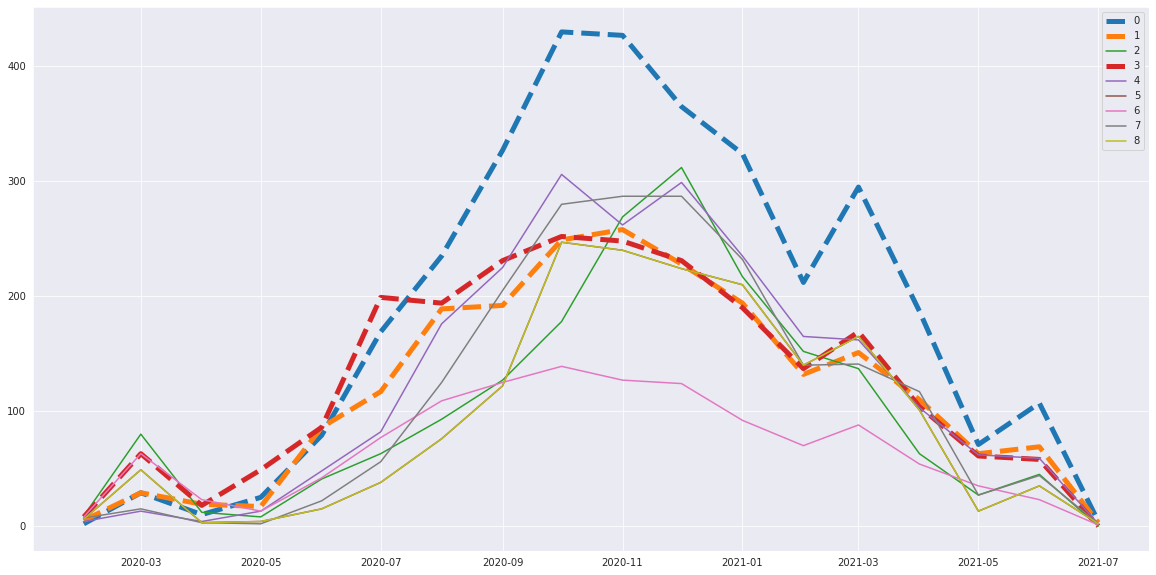

In [ ]:
plt.figure(figsize=(20,10))


plt.plot(df_topics_with_time.Date, df_topics_with_time.dominant_topic_0, label='0', lw=5, ls='--')
plt.plot(df_topics_with_time.Date, df_topics_with_time.dominant_topic_1, label='1', lw=5, ls='--')
plt.plot(df_topics_with_time.Date, df_topics_with_time.dominant_topic_2, label='2')
plt.plot(df_topics_with_time.Date, df_topics_with_time.dominant_topic_3, label='3', lw=5, ls='--')
plt.plot(df_topics_with_time.Date, df_topics_with_time.dominant_topic_4, label='4')
plt.plot(df_topics_with_time.Date, df_topics_with_time.dominant_topic_5, label='5')
plt.plot(df_topics_with_time.Date, df_topics_with_time.dominant_topic_6, label='6')
plt.plot(df_topics_with_time.Date, df_topics_with_time.dominant_topic_7, label='7')
plt.plot(df_topics_with_time.Date, df_topics_with_time.dominant_topic_5, label='8')

plt.legend();


1.   complaints #2
2.   property, scenery, amenities #5
3.   overall experience #6
4.   compliments to hotel team #8
5.   resort location/leisure travel #7
6.   hospitality #4
7.   quality of stay and safety measures taken by hotel #3
8.   staff behaviour and compliance with covid norms #1
9.   service quality and norms followed during meals #0


check a government website for unlock dates

In [ ]:
df_covid.Date.value_counts()

2020-11-01    2315
2020-10-01    2314
2020-12-01    2278
2021-01-01    1864
2020-09-01    1773
2021-03-01    1460
2020-08-01    1363
2021-02-01    1278
2021-04-01     934
2020-07-01     913
2021-06-01     497
2020-06-01     481
2020-03-01     414
2021-05-01     413
2020-05-01     159
2020-04-01     118
2020-02-01      55
2021-07-01      15
Name: Date, dtype: int64

try and analyse state-wise if not possible include as limitation

### topic trend with location -- hold

In [ ]:
pd.crosstab(df_covid.dominant_topic, df_covid.location, normalize=True, dropna=True)

location            Agra  Ahmedabad  ...  Visakhapatnam (Vizag)  Vypin Island
dominant_topic                       ...                                     
0               0.000452   0.005727  ...               0.001959      0.000000
1               0.001507   0.013715  ...               0.004672      0.000000
2               0.000452   0.005727  ...               0.000904      0.000151
3               0.001959   0.002261  ...               0.002562      0.000000
4               0.001809   0.004371  ...               0.003466      0.000000
5               0.001507   0.023060  ...               0.010249      0.000000
6               0.001658   0.014619  ...               0.003617      0.000000
7               0.001356   0.011304  ...               0.003466      0.000000

[8 rows x 51 columns]

In [ ]:
df_topic_location = pd.crosstab(df_covid.dominant_topic, df_covid.location)

In [ ]:
df_covid.location.unique()

array(['New Delhi', 'Bengaluru', 'Mumbai', 'Chennai', 'Jaipur', 'Amer',
       'Gurugram (Gurgaon)', 'Hyderabad', 'Kolkata', 'Kochi (Cochin)',
       'Maradu', 'Nedumbassery', 'Ernakulam', 'Vypin Island', 'Pune',
       'Manali', 'Haripur', 'Prini', 'Srinagar', 'Ahmedabad', 'Udaipur',
       'Candolim', 'Anjuna', 'Bardez', 'Siolim', 'Calangute', 'Varanasi',
       'Agra', 'Gangtok', 'Alappuzha', 'McLeod Ganj', 'Dharamsala',
       'Coimbatore', 'Visakhapatnam (Vizag)', 'Trivandrum', 'Kodaikanal',
       'Dehradun', 'Shirdi', 'Mahabaleshwar', 'Mussoorie', 'Nainital',
       'Nagpur', 'Patna', 'Lonavala', 'Chikmagalur', 'Nashik', 'Katra',
       'Ajmer', 'Varkala Town', 'Varkala', 'Pushkar'], dtype=object)

In [ ]:
locations = df_covid.location.unique()

In [ ]:
for i in locations:

  sum=0
  print(i)

  for j in range(8):

    sum+=df_topic_location[i][j]

    if(df_topic_location[i][j] == max(df_topic_location[i])):
      print(j)
      print('\n')

New Delhi
5


Bengaluru
5


Mumbai
5


Chennai
5


Jaipur
5


Amer
3


Gurugram (Gurgaon)
1


Hyderabad
5


Kolkata
5


Kochi (Cochin)
5


Maradu
5


Nedumbassery
5


6


Ernakulam
1


Vypin Island
2


Pune
4


Manali
3


Haripur
3


Prini
7


Srinagar
5


Ahmedabad
5


Udaipur
7


Candolim
0


5


Anjuna
3


5


Bardez
5


Siolim
3


7


Calangute
3


Varanasi
3


Agra
3


Gangtok
0


2


5


Alappuzha
3


McLeod Ganj
3


Dharamsala
3


Coimbatore
1


Visakhapatnam (Vizag)
5


Trivandrum
5


Kodaikanal
5


Dehradun
1


3


4


Shirdi
4


Mahabaleshwar
3


Mussoorie
3


Nainital
3


Nagpur
5


Patna
5


Lonavala
3


Chikmagalur
3


Nashik
5


Katra
1


3


6


Ajmer
1


Varkala Town
1


7


Varkala
5


Pushkar
5




hold onto this for now

## amenities and precautions -- hold

###covid data

In [ ]:
df_covid.amenities = df_covid.amenities.astype(str)

amenities_count = []

for i in df_covid.amenities.str.split('\n'):
  amenities_count.append(len(i))

df_covid['amenities_count'] = amenities_count

In [ ]:
df_covid.head()

hotel_name  ... amenities_count
0       Park Inn by Radisson New Delhi Lajpat Nagar  ...              33
1                           Dewdrop Intercity Hotel  ...              18
2                      The Golden Palms Hotel & Spa  ...              13
3                                        Hotel Aura  ...               9
4  ITC Maurya, a Luxury Collection Hotel, New Delhi  ...              42

[5 rows x 19 columns]

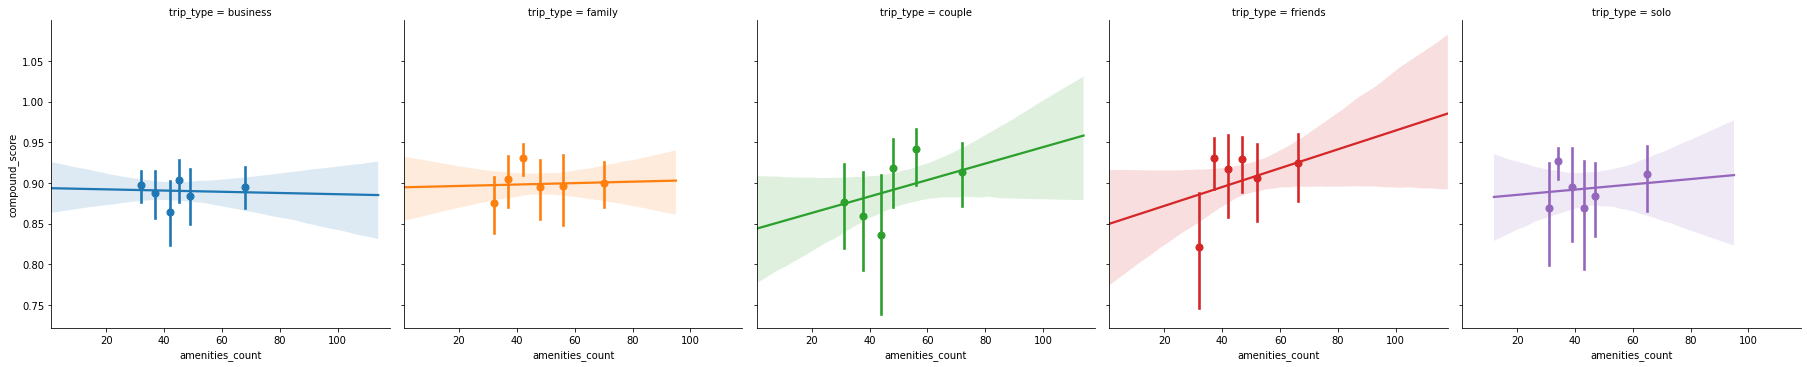

In [ ]:
sns.lmplot(x='amenities_count', x_bins=6, y='compound_score', hue='trip_type', col='trip_type', data=df_covid);

In [ ]:
df_covid.precautions = df_covid.precautions.astype(str)

precautions_count = []

for i in df_covid.precautions.str.split('\n'):
  precautions_count.append(len(i))

df_covid['precautions_count'] = precautions_count

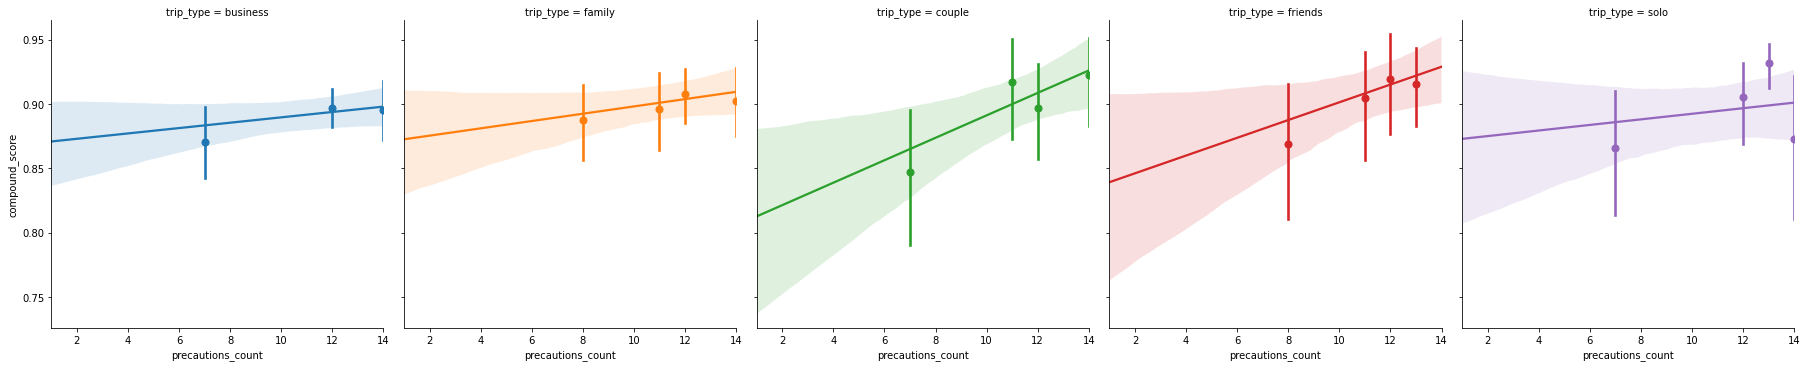

In [ ]:
sns.lmplot(x='precautions_count', x_bins=4,  y='compound_score',hue='trip_type', col='trip_type',  data=df_covid);

In [ ]:
def calc_norm(param):
  param_norm = []
  for i in param:
    param_norm.append( (i-min(param))/(max(param)-min(param)) )
  return param_norm

In [ ]:
rating_norm = calc_norm(df_covid.rating)
compound_score_norm = calc_norm(df_covid.compound_score)

In [ ]:
rating_norm = np.array(rating_norm)
compound_score_norm = np.array(np.array(compound_score_norm))

INFO - 11:21:54: NumExpr defaulting to 2 threads.


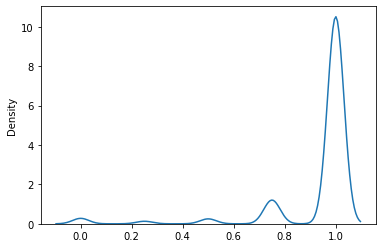

In [ ]:
sns.kdeplot(rating_norm)

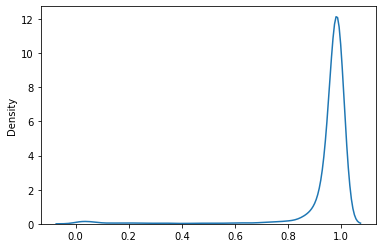

In [ ]:
sns.kdeplot(compound_score_norm)

In [ ]:
beta = 0.75
polarity_agg = np.sqrt(rating_norm * compound_score_norm**beta)

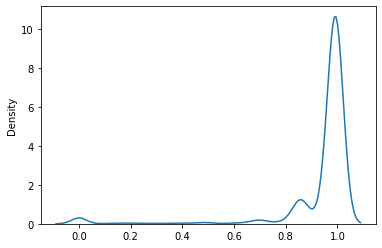

In [ ]:
sns.kdeplot(polarity_agg)

In [ ]:
df_covid['aggregated_polarity_score'] = polarity_agg

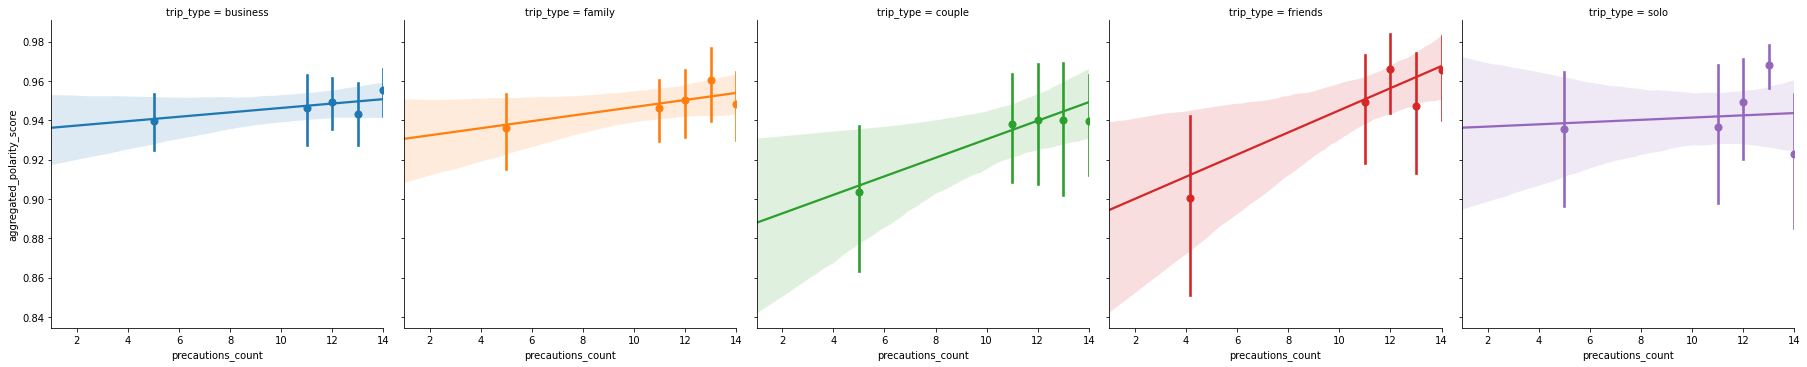

In [ ]:
sns.lmplot(x='precautions_count', x_bins=5, y='aggregated_polarity_score', hue='trip_type', col='trip_type', data=df_covid)

In [ ]:
df_covid.room_features = df_covid.room_features.astype(str)

room_features_count = []

for i in df_covid.room_features.str.split('\n'):
  room_features_count.append(len(i))

df_covid['room_features_count'] = room_features_count

In [ ]:
df_covid.room_types = df_covid.room_types.astype(str)

room_types_count = []

for i in df_covid.room_types.str.split('\n'):
  room_types_count.append(len(i))

df_covid['room_types_count'] = room_types_count

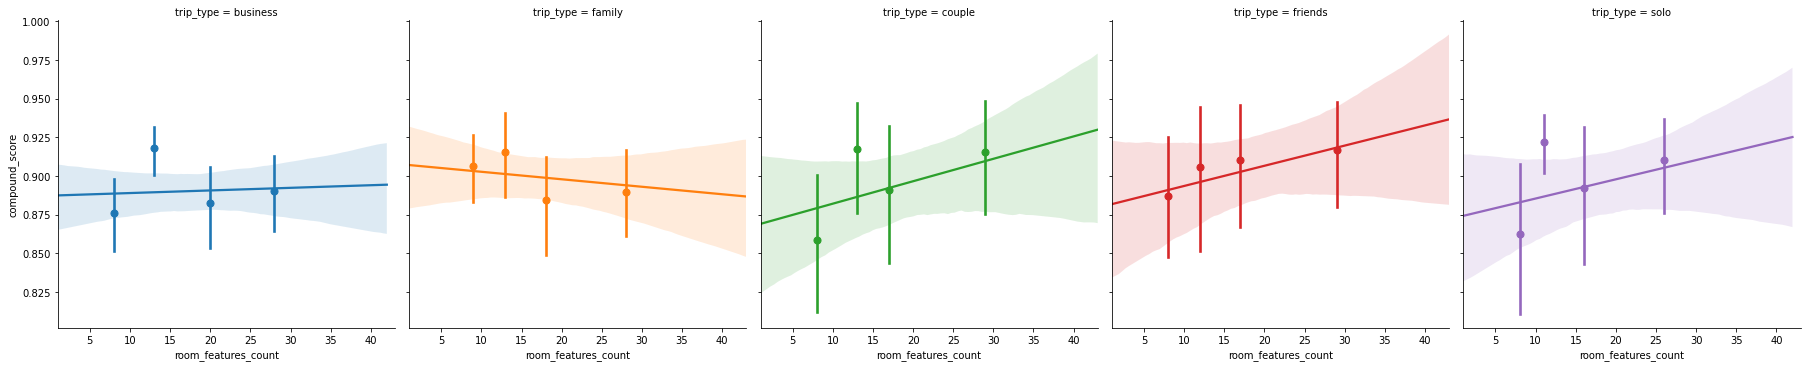

In [ ]:
sns.lmplot(x='room_features_count', x_bins=4, y='compound_score', hue='trip_type', col='trip_type', data=df_covid);

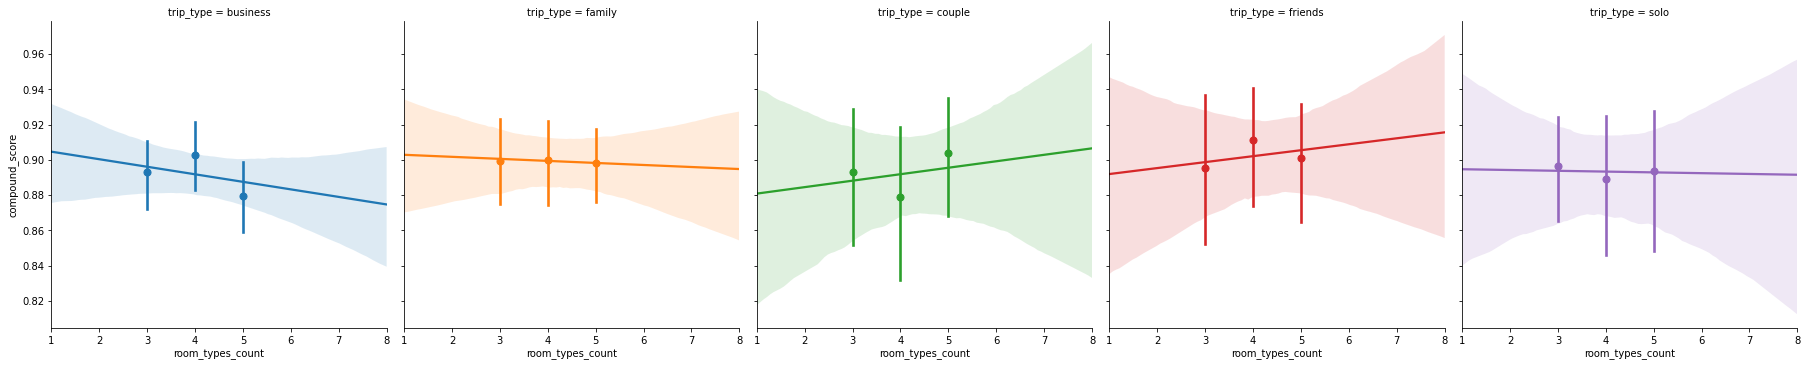

In [ ]:
sns.lmplot(x='room_types_count', x_bins=4, y='compound_score', hue='trip_type', col='trip_type', data=df_covid);

INFO - 12:38:56: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO - 12:38:56: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


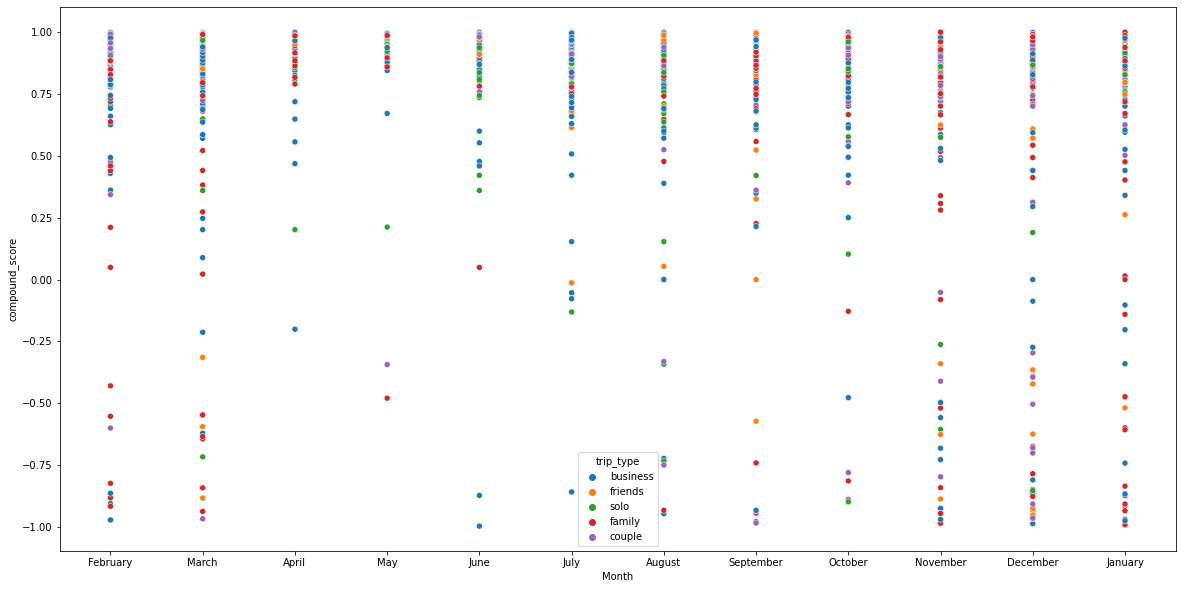

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Month', y='compound_score', data=df_covid.sort_values(by='Date'), hue='trip_type');

###all data

In [ ]:
df.cleaned_review

0         decide stay hotel celebrate friend birthday re...
1         nice hotel room size good mu room 404 request ...
2         well clearly hotel stand close speak even mana...
3         average hotel great locational plus point room...
4         good sometimes act 2 star property frequently ...
                                ...                        
202023    bunch u school decide meet almost 20 year pala...
202024    start positive 1 nice clean property 2 excelle...
202025    stay family nice property panoramic view recei...
202026    fantastic property near temple lake room spaci...
202027    come family friend dec18 expect kind hospitali...
Name: cleaned_review, Length: 202028, dtype: object

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

df['sentiment_scores'] = df['cleaned_review'].apply(lambda rev: sid.polarity_scores(rev))
df['compound_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


AttributeError: ignored

In [ ]:
df.amenities = df.amenities.astype(str)

amenities_count = []

for i in df.amenities.str.split('\n'):
  amenities_count.append(len(i))

df['amenities_count'] = amenities_count

In [ ]:
sns.lmplot(x='amenities_count', x_bins=12, y='compound_score', hue='trip_type', col='trip_type', data=df);

KeyError: ignored

In [ ]:
df.precautions = df.precautions.astype(str)

precautions_count = []

for i in df.precautions.str.split('\n'):
  precautions_count.append(len(i))

df['precautions_count'] = precautions_count

##Precautions vs Price

###covid data -- skip

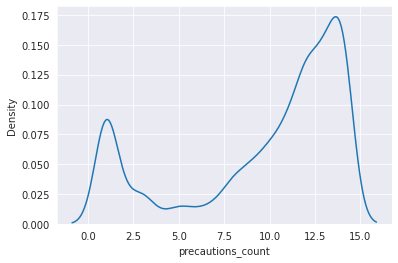

In [ ]:
sns.kdeplot(df_covid.precautions_count)

In [ ]:
df_covid.head()

hotel_name  ... precautions_count_binned
0       Park Inn by Radisson New Delhi Lajpat Nagar  ...                        1
1                           Dewdrop Intercity Hotel  ...                        1
2                      The Golden Palms Hotel & Spa  ...                        1
3                                        Hotel Aura  ...                        1
4  ITC Maurya, a Luxury Collection Hotel, New Delhi  ...                        3

[5 rows x 21 columns]

In [ ]:
df_covid.price_range = df_covid.price_range.str.replace('[^\w\s]', '').str.lstrip().str.rstrip().str.split()

<input>:1: DeprecationWarning: invalid escape sequence \w
<ipython-input-137-a1baf6637564>:1: DeprecationWarning: invalid escape sequence \w
  df_covid.price_range = df_covid.price_range.str.replace('[^\w\s]', '').str.lstrip().str.rstrip().str.split()


AttributeError: ignored

In [ ]:
df_covid.head()

In [ ]:
low=[]
high=[]

for i in df_covid.price_range:
  low.append(i[0])
  high.append(i[1])

df_covid['price_low'] = low
df_covid['price_high'] = high

In [ ]:
df_covid.price_low.unique()

array(['3738', '2200', '2621', '1833', '10188', '7190', '12128', '4546',
       '6673', '4502', '4212', '5498', '6033', '5424', '4398', '11215',
       '5461', '4252', '8868', '1234', '2112', '9176', '10121', '5597',
       '6233', '4361', '4992', '2786', '10938', '8068', '3631', '4331',
       '4179', '2052', '4697', '3707', '4434', '4105', '3376', '4032',
       '5065', '7414', '7037', '6377', '4544', '6890', '3153', '11449',
       '3010', '3891', '6043', '2403', '2542', '2129', '5139', '8357',
       '7572', '5447', '8135', '9092', '11962', '8066', '5791', '9449',
       '4506', '9247', '10865', '8209', '17137', '8075', '9103', '6159',
       '6178', '7919', '6469', '3225', '4766', '3229', '10571', '5938',
       '9174', '4178', '5871', '11305', '7771', '3558', '12066', '7770',
       '5873', '5286', '2713', '5607', '9394', '4648', '4106', '4806',
       '3884', '2495', '3812', '3852', '3082', '6744', '4477', '2569',
       '4770', '5229', '5945', '4471', '4033', '2639', '4575', '3

In [ ]:
df_covid[df_covid.price_low=='IndiaWest'].index

Int64Index([4224, 4225, 4226, 4227, 4228, 4229, 4230, 4231, 4232, 4233], dtype='int64')

In [ ]:
df_covid.loc[4224:4233, 'price_low'] = 7535
df_covid.loc[4224:4233, 'price_high'] = 7535
df_covid.drop('price_range', axis=1, inplace=True)

In [ ]:
df_covid.price_low = df_covid.price_low.astype(int)
df_covid.price_high = df_covid.price_high.astype(int)

In [ ]:
df_covid.price_low.unique()

array([ 3738,  2200,  2621,  1833, 10188,  7190, 12128,  4546,  6673,
        4502,  4212,  5498,  6033,  5424,  4398, 11215,  5461,  4252,
        8868,  1234,  2112,  9176, 10121,  5597,  6233,  4361,  4992,
        2786, 10938,  8068,  3631,  4331,  4179,  2052,  4697,  3707,
        4434,  4105,  3376,  4032,  5065,  7414,  7037,  6377,  4544,
        6890,  3153, 11449,  3010,  3891,  6043,  2403,  2542,  2129,
        5139,  8357,  7572,  5447,  8135,  9092, 11962,  8066,  5791,
        9449,  4506,  9247, 10865,  8209, 17137,  8075,  9103,  6159,
        6178,  7919,  6469,  3225,  4766,  3229, 10571,  5938,  9174,
        4178,  5871, 11305,  7771,  3558, 12066,  7770,  5873,  5286,
        2713,  5607,  9394,  4648,  4106,  4806,  3884,  2495,  3812,
        3852,  3082,  6744,  4477,  2569,  4770,  5229,  5945,  4471,
        4033,  2639,  4575,  3593,  2860,  5718,  3445,  1982,  2544,
        3963,  3050,  4625,  1558,  7706,  1542,  6966,   808,  1454,
       15700,  2597,

In [ ]:
df_covid['price_mean'] = (df_covid.price_low+df_covid.price_high)/2

In [ ]:
df_covid.price_mean

0         7440.0
1         3080.0
2         4368.5
3         3006.0
4        13229.5
          ...   
18639    11037.5
18640     3498.5
18641     3498.5
18642     3498.5
18643     3498.5
Name: price_mean, Length: 18644, dtype: float64

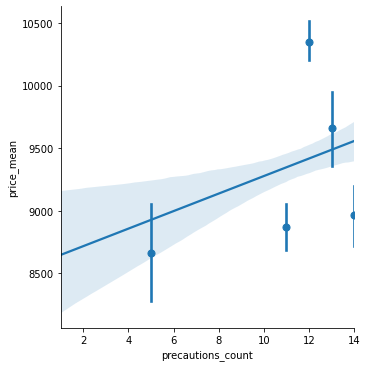

In [ ]:
sns.lmplot(y='price_mean', x='precautions_count', x_bins=5, data=df_covid)

In [ ]:
df_covid.precautions_count.unique()

array([ 1, 12, 14, 11,  3,  2,  9, 13,  8,  5, 10,  7,  4,  6])

In [ ]:
df_covid[df_covid.precautions_count==1]

hotel_name  ... price_mean
0      Park Inn by Radisson New Delhi Lajpat Nagar  ...     7440.0
1                          Dewdrop Intercity Hotel  ...     3080.0
2                     The Golden Palms Hotel & Spa  ...     4368.5
3                                       Hotel Aura  ...     3006.0
204                            The Grand New Delhi  ...     8836.0
...                                            ...  ...        ...
18609                          Saj On The Mountain  ...     8004.5
18610                          Saj On The Mountain  ...     8004.5
18611                          Saj On The Mountain  ...     8004.5
18612                          Saj On The Mountain  ...     8004.5
18613                          Saj On The Mountain  ...     8004.5

[2448 rows x 22 columns]

In [ ]:
df_covid.loc[df_covid.precautions_count==1, 'precautions_count'] = 0

In [ ]:
df_covid[df_covid.precautions_count<=3].precautions.unique()

array([nan,
       'Hand sanitizer available to guests & staff\nRegularly sanitized high-traffic areas\nStaff required to regularly wash hands',
       'Hand sanitizer available to guests & staff\nRegularly sanitized high-traffic areas',
       'Staff required to regularly wash hands\nIndividually wrapped toiletries\n24-hour minimum vacancy between guests',
       'Face masks required for staff in public areas',
       'All linens sanitized in high-temperature wash\nFloors marked for social distancing\nRegularly sanitized high-traffic areas',
       'Doctors available 24/7',
       'All linens sanitized in high-temperature wash',
       'Regularly sanitized high-traffic areas',
       'Regularly sanitized high-traffic areas\nStaff required to regularly wash hands',
       'All linens sanitized in high-temperature wash\nRegularly sanitized high-traffic areas',
       'Individually wrapped toiletries',
       'All linens sanitized in high-temperature wash\nFace masks required for staff i

In [ ]:
df_covid.dtypes

hotel_name                   object
review                       object
rating                        int64
precautions                  object
amenities                    object
trip_type                    object
room_features                object
room_types                   object
location                     object
review_heading               object
Month                        object
Year                          int64
Date                         object
price_low                     int64
price_high                    int64
cleaned_review               object
dominant_topic                int64
sentiment_scores             object
compound_score              float64
precautions_count             int64
precautions_count_binned      int64
price_mean                  float64
dtype: object

In [ ]:
df_covid.precautions.fillna('N/A', inplace=True)
precautions = df_covid.precautions.str.split('\n')

In [ ]:
precautions = np.array(precautions)
np.where(precautions=='N/A', 'Not listed', precautions)

array([list(['N/A']), list(['N/A']), list(['N/A']), ...,
       list(['All linens sanitised in high-temperature wash', 'Face masks required for guests in public areas', 'Face masks required for staff in public areas', 'Floors marked for social distancing', 'Hand sanitiser available to guests & staff', 'Regularly sanitised high-traffic areas', 'Staff required to regularly wash hands', 'Regular temperature checks for staff', 'Contactless check-in', 'Contactless check-out', 'Doctors available 24/7', 'Individually wrapped toiletries', '24-hour minimum vacancy between guests']),
       list(['All linens sanitised in high-temperature wash', 'Face masks required for guests in public areas', 'Face masks required for staff in public areas', 'Floors marked for social distancing', 'Hand sanitiser available to guests & staff', 'Regularly sanitised high-traffic areas', 'Staff required to regularly wash hands', 'Regular temperature checks for staff', 'Contactless check-in', 'Contactless check-out', 

In [ ]:
precautions

0                                                    [N/A]
1                                                    [N/A]
2                                                    [N/A]
3                                                    [N/A]
4        [All linens sanitized in high-temperature wash...
                               ...                        
18639    [All linens sanitised in high-temperature wash...
18640    [All linens sanitised in high-temperature wash...
18641    [All linens sanitised in high-temperature wash...
18642    [All linens sanitised in high-temperature wash...
18643    [All linens sanitised in high-temperature wash...
Name: precautions, Length: 18644, dtype: object

In [ ]:
total_precautions=[]

for i in precautions:
  for j in i:
    total_precautions.append(j)

df_precautions = pd.DataFrame(columns=['precautions'])
df_precautions.precautions = total_precautions

In [ ]:
df_precautions

precautions
0                                                 N/A
1                                                 N/A
2                                                 N/A
3                                                 N/A
4       All linens sanitized in high-temperature wash
...                                               ...
181630                           Contactless check-in
181631                          Contactless check-out
181632                         Doctors available 24/7
181633                Individually wrapped toiletries
181634         24-hour minimum vacancy between guests

[181635 rows x 1 columns]

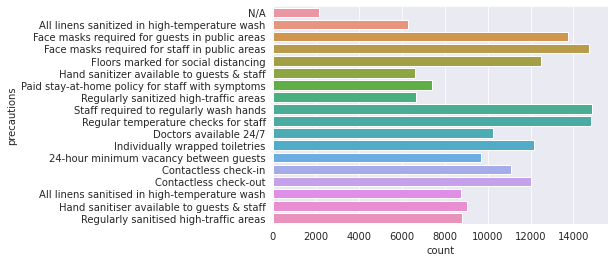

In [ ]:
sns.countplot(y='precautions', data=df_precautions);

In [ ]:
df_precautions.precautions.value_counts()

Staff required to regularly wash hands              14849
Regular temperature checks for staff                14810
Face masks required for staff in public areas       14722
Face masks required for guests in public areas      13766
Floors marked for social distancing                 12502
Individually wrapped toiletries                     12181
Contactless check-out                               12014
Contactless check-in                                11071
Doctors available 24/7                              10266
24-hour minimum vacancy between guests               9686
Hand sanitiser available to guests & staff           9027
Regularly sanitised high-traffic areas               8809
All linens sanitised in high-temperature wash        8770
Paid stay-at-home policy for staff with symptoms     7400
Regularly sanitized high-traffic areas               6673
Hand sanitizer available to guests & staff           6642
All linens sanitized in high-temperature wash        6286
N/A           

In [ ]:
np.log2(len(df_covid)-2773)

11.91513244895065

In [ ]:
mapping_dict = {'Hand sanitizer available to guests & staff':10,
                'Regularly sanitized high-traffic areas':10,
                'Staff required to regularly wash hands':10,
                'Regular temperature checks for staff':10,
                'All linens sanitized in high-temperature wash':10,
                'Face masks required for staff in public areas':20,
                'Face masks required for guests in public areas':20,
                'Floors marked for social distancing':20,
                'Individually wrapped toiletries':30,
                'Contactless check-out':30,
                '24-hour minimum vacancy between guests':30,
                'Doctors available 24/7':30,
                'Contactless check-in':40,
                'Paid stay-at-home policy for staff with symptoms':40,
                'N/A':0}

In [ ]:
precautions_encode=[]

for i in precautions:
  precautions_encode.append(list(map(mapping_dict.get, i)))

In [ ]:
precautions_encode

In [ ]:
precautions_score=[]

for i in precautions_encode:
  precautions_score.append(np.sum(i))

In [ ]:
precautions_score=np.array(precautions_score)
precautions_score/10

24.0

In [ ]:
df_covid['precautions_score'] = precautions_score

In [ ]:
log_precautions_score = np.where(precautions_score==0, 0, np.log(precautions_score))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


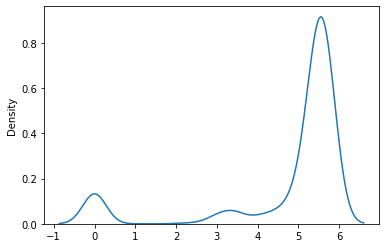

In [ ]:
sns.kdeplot(log_precautions_score);

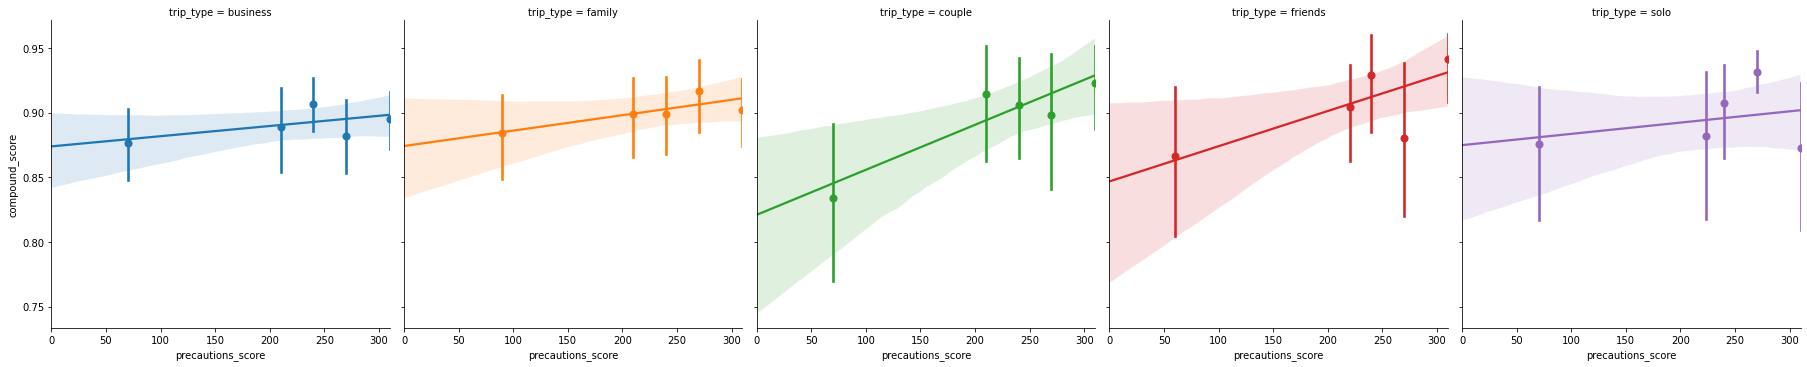

In [ ]:
sns.lmplot(x='precautions_score', x_bins=5, y='compound_score', hue='trip_type', col='trip_type', data=df_covid);

In [ ]:
np.corrcoef(df_covid.precautions_score, df_covid.compound_score)

In [ ]:
df_covid.groupby('dominant_topic').agg({'precautions_score':'mean',
                                        'precautions_count':'mean'})

precautions_score  precautions_count
dominant_topic                                      
0                      214.834308          10.432749
1                      209.783951          10.289095
2                      199.729730           9.807207
3                      183.067047           8.997147
4                      217.833333          10.701389
5                      203.576438           9.983871
6                      217.831021          10.665826
7                      210.596859          10.312042

In [ ]:
df_covid.groupby('trip_type').agg({'precautions_score':'mean',
                                   'precautions_count':'mean',
                                   'price_mean':'mean'})

precautions_score  precautions_count    price_mean
trip_type                                                    
business          209.261057          10.275620   8306.966019
couple            207.591036          10.124650  10191.410364
family            208.944478          10.235509   9449.047590
friends           206.196013          10.114618   8947.098837
solo              212.208029          10.333942   8266.020073

In [ ]:
np.corrcoef(df_covid.precautions_score, df_covid.price_mean)

array([[1.        , 0.05576928],
       [0.05576928, 1.        ]])

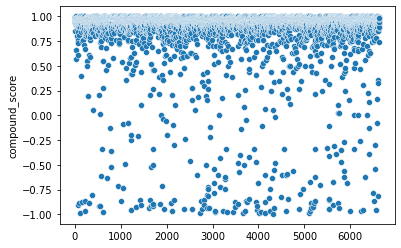

In [ ]:
sns.scatterplot(y=df_covid.compound_score, x=df_covid.index);

In [ ]:
labels=[]
for i in df_covid.rating:
  if(i>=4):
    labels.append('positive')
  else:
    labels.append('negative')

In [ ]:
df_covid['label'] = labels

In [ ]:
df_covid.sentiment_scores

0       {'neg': 0.023, 'neu': 0.729, 'pos': 0.248, 'co...
1       {'neg': 0.013, 'neu': 0.753, 'pos': 0.234, 'co...
2       {'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'comp...
3       {'neg': 0.048, 'neu': 0.667, 'pos': 0.286, 'co...
4       {'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compou...
                              ...                        
6630    {'neg': 0.0, 'neu': 0.657, 'pos': 0.343, 'comp...
6631    {'neg': 0.0, 'neu': 0.636, 'pos': 0.364, 'comp...
6632    {'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp...
6633    {'neg': 0.013, 'neu': 0.761, 'pos': 0.226, 'co...
6634    {'neg': 0.034, 'neu': 0.528, 'pos': 0.438, 'co...
Name: sentiment_scores, Length: 6635, dtype: object

In [ ]:
df_covid.compound_score

0       0.9944
1       0.9801
2       0.9652
3       0.9349
4       0.9431
         ...  
6630    0.9451
6631    0.9760
6632    0.9883
6633    0.9825
6634    0.9839
Name: compound_score, Length: 6635, dtype: float64

In [ ]:
df_covid_pos = df_covid[df_covid.label=='positive']

In [ ]:
len(df_covid_pos[df_covid_pos.compound_score>0])/len(df_covid_pos)

0.9960216422660726

In [ ]:
df_covid_neg = df_covid[df_covid.label=='negative']

In [ ]:
len(df_covid_neg[df_covid_neg.compound_score<0])/len(df_covid_neg)

0.4415954415954416

###all post 2020 feb data

####cleaning -- skip

In [ ]:
df_new.head()

hotel_name  ...                                     cleaned_review
0  Svelte Hotel and Personal Suites  ...  decide stay hotel celebrate friend birthday re...
1  Svelte Hotel and Personal Suites  ...  nice hotel room size good mu room 404 request ...
2  Svelte Hotel and Personal Suites  ...  well clearly hotel stand close expectations sp...
3  Svelte Hotel and Personal Suites  ...  average hotel great locational plus point room...
4  Svelte Hotel and Personal Suites  ...  good sometimes act 2 star property stat freque...

[5 rows x 16 columns]

In [ ]:
df_new['price_range'] = df_new.price_range.str.replace('[^\w\s]', '').str.lstrip().str.rstrip().str.split()

In [ ]:
low=[]
high=[]

for i in df_new.price_range:
  low.append(i[0])
  high.append(i[1])

df_new['price_low'] = low
df_new['price_high'] = high

In [ ]:
df_new.price_low.unique()

In [ ]:
df_new[df_new.price_low=='IndiaWest'].index

In [ ]:
df_new.loc[35117:35200, 'price_low'] = 7535
df_new.loc[35117:35200, 'price_high'] = 7535

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
df_new[df_new.price_low=='Transit'].index

In [ ]:
df_new.loc[16173:16183, 'price_low'] = 2687
df_new.loc[16173:16183, 'price_high'] = 2705

In [ ]:
df_new.price_low = df_new.price_low.astype(int)
df_new.price_high = df_new.price_high.astype(int)

In [ ]:
df_new['price_mean'] = (df_new.price_low+df_new.price_high)/2

In [ ]:
df_new.precautions = df_new.precautions.astype(str)

precautions_count = []

for i in df_new.precautions.str.split('\n'):
  precautions_count.append(len(i))

df_new['precautions_count'] = precautions_count

####precautions_count vs price_mean

In [ ]:
df_new[df_new.price_mean > 0].reset_index(drop=True)

hotel_name  ... compound_score
0      Svelte Hotel and Personal Suites  ...         0.9851
1      Svelte Hotel and Personal Suites  ...         0.9565
2      Svelte Hotel and Personal Suites  ...         0.9812
3      Svelte Hotel and Personal Suites  ...         0.8718
4      Svelte Hotel and Personal Suites  ...         0.9237
...                                 ...  ...            ...
80044            Red Fox Hotel, Bhiwadi  ...         0.9623
80045            Red Fox Hotel, Bhiwadi  ...         0.9741
80046            Red Fox Hotel, Bhiwadi  ...         0.9312
80047            Red Fox Hotel, Bhiwadi  ...         0.9670
80048                      Matsya Vilas  ...         0.9201

[80049 rows x 21 columns]

In [ ]:
df_new_price = df_new[df_new.price_mean > 0].reset_index(drop=True)

In [ ]:
pd.qcut(df_new_price.precautions_count, 5, duplicates='drop').value_counts()

(12.0, 14.0]    27574
(10.0, 12.0]    19196
(2.0, 10.0]     17094
(0.999, 2.0]    16185
Name: precautions_count, dtype: int64

In [ ]:
df_new_price.precautions_count_binned = pd.qcut(df_new.precautions_count, 5, labels=[1,2,3,4,5], duplicates='drop')

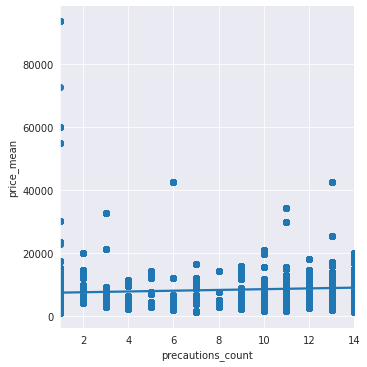

In [ ]:
sns.lmplot(x='precautions_count', y='price_mean', data=df_new_price );

seaborn creates evenly sized bins

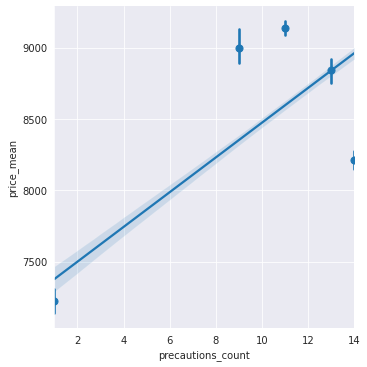

In [ ]:
sns.lmplot(x='precautions_count', y='price_mean', x_bins=5, data=df_new_price);

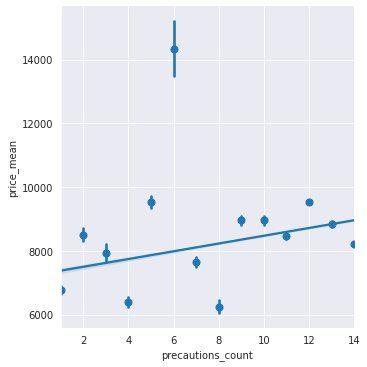

In [ ]:
sns.lmplot(x='precautions_count', y='price_mean', x_estimator=np.mean, data=df_new_price);

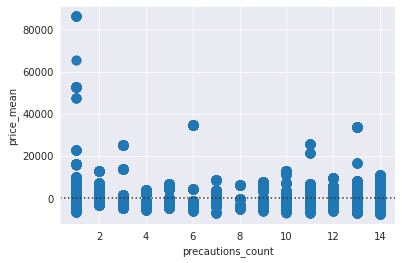

In [ ]:
sns.residplot(x='precautions_count', y='price_mean', data=df_new_price, scatter_kws={"s": 80});

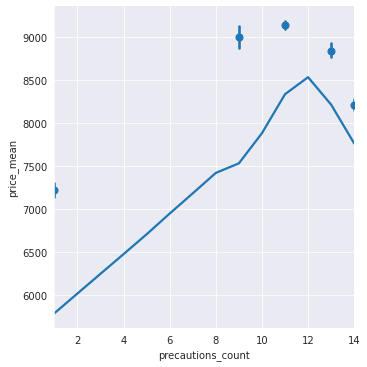

In [ ]:
sns.lmplot(x='precautions_count', y='price_mean', x_bins=5, lowess=True, data=df_new_price);

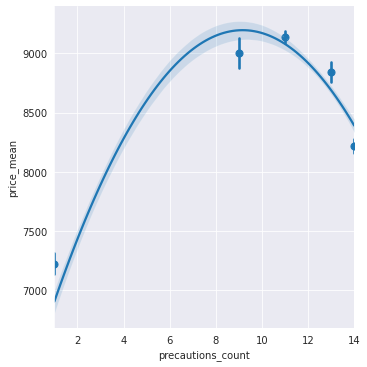

In [ ]:
sns.lmplot(x='precautions_count', y='price_mean', x_bins=5, order=2, data=df_new_price);

locally weighted non paramteric regression

https://www.statisticshowto.com/lowess-smoothing/

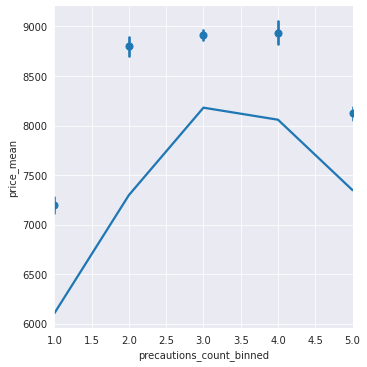

In [ ]:
sns.lmplot(x='precautions_count_binned', y='price_mean', x_estimator=np.mean, lowess=True, data=df_new_price);

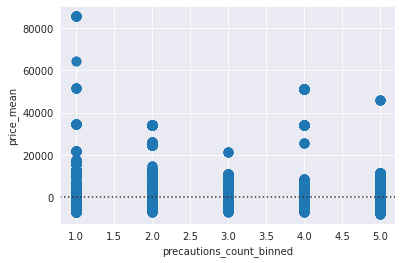

In [ ]:
sns.residplot(x='precautions_count_binned', y='price_mean', data=df_new_price, scatter_kws={"s": 80});

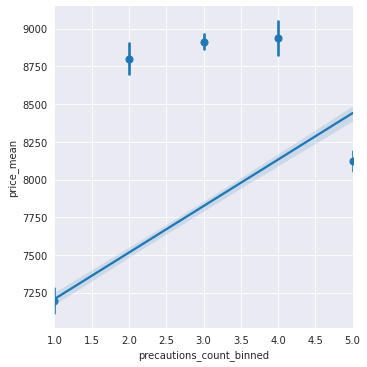

In [ ]:
sns.lmplot(x='precautions_count_binned', y='price_mean', x_estimator=np.mean, robust=True, data=df_new_price);

try order = 2

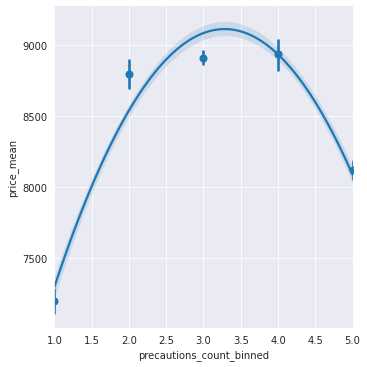

In [ ]:
sns.lmplot(x='precautions_count_binned', y='price_mean', x_estimator=np.mean, order=2, data=df_new_price);

#### for every trip_type individually -- skip

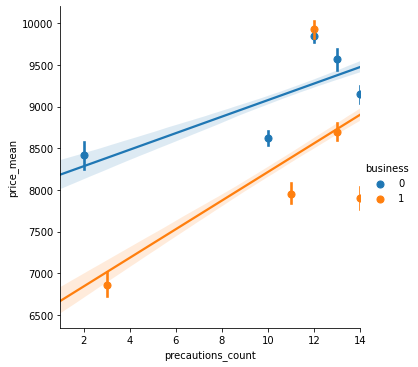

In [ ]:
sns.lmplot(x='precautions_count', y='price_mean', x_bins=5, hue='business', data=df_new);

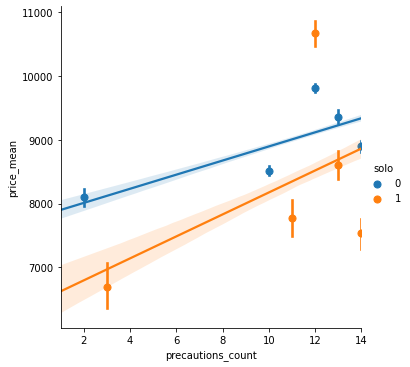

In [ ]:
sns.lmplot(x='precautions_count', y='price_mean', x_bins=5, hue='solo', data=df_new);

even though business and solo trips tend to be cheaper, they do prefer to pay more for more precautions

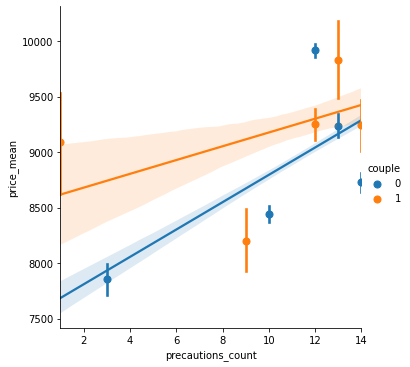

In [ ]:
sns.lmplot(x='precautions_count', y='price_mean', x_bins=5, hue='couple', data=df_new);

quite the opposite for couples

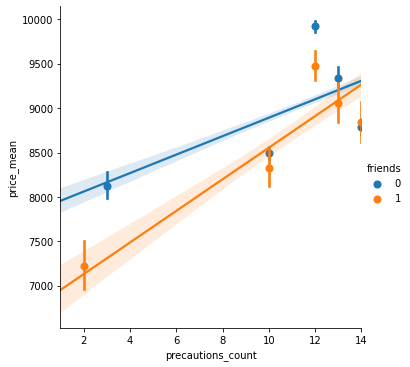

In [ ]:
sns.lmplot(x='precautions_count', y='price_mean', x_bins=5, hue='friends', data=df_new);

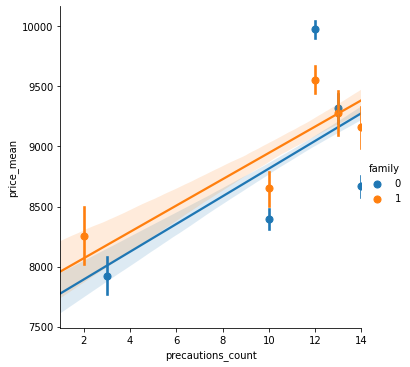

In [ ]:
sns.lmplot(x='precautions_count', y='price_mean', x_bins=5, hue='family', data=df_new);

#### all trip types in one

In [ ]:
trip_type=[]
for i in range(len(df_new)):

  if(df_new.loc[i].business==1):
    trip_type.append('business')

  elif(df_new.loc[i].family==1):
    trip_type.append('family')

  elif(df_new.loc[i].solo==1):
    trip_type.append('solo')

  elif(df_new.loc[i].friends==1):
    trip_type.append('friends')

  elif(df_new.loc[i].couple==1):
    trip_type.append('couple')

  else:
    trip_type.append('N/A')

In [ ]:
len(trip_type)

57271

In [ ]:
df_new['trip_type']=trip_type

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


##### precautions_count, price_mean, trip_type

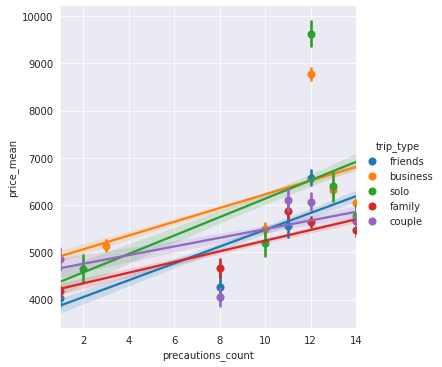

In [ ]:
sns.lmplot(x='precautions_count', y='price_mean', x_bins=5, hue='trip_type', data=df_new);

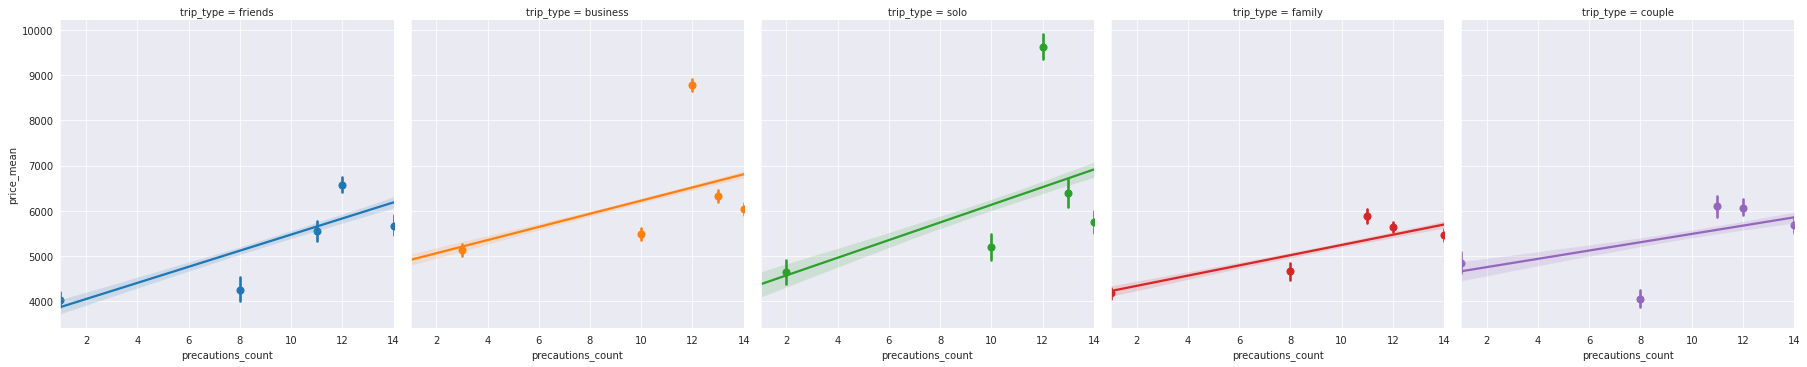

In [ ]:
sns.lmplot(x='precautions_count', y='price_mean', x_bins=5, hue='trip_type', col='trip_type', data=df_new);

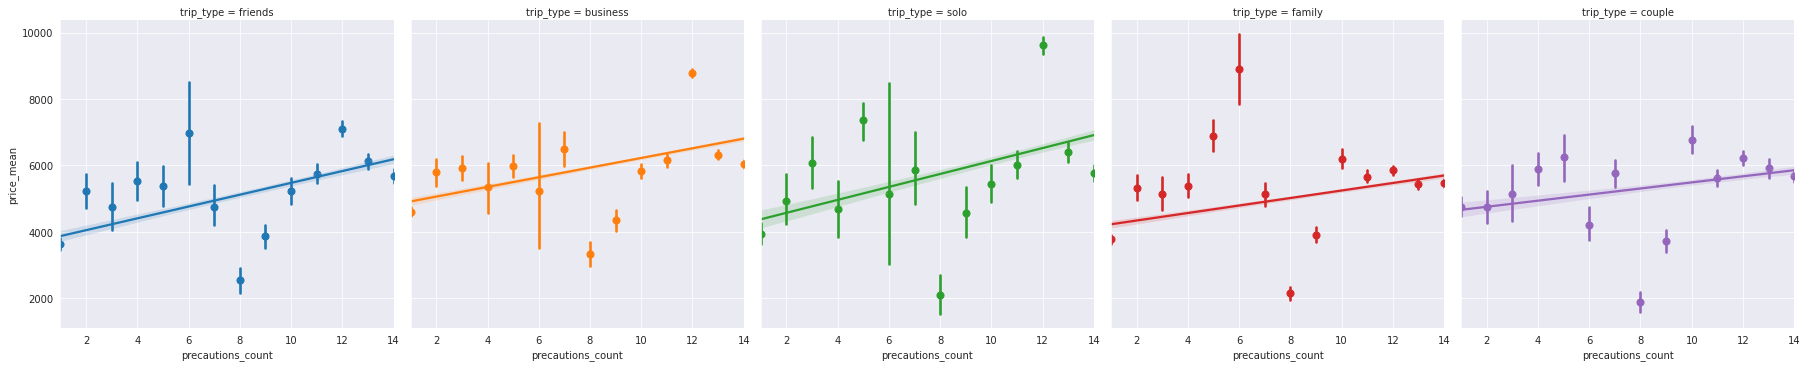

In [ ]:
sns.lmplot(x='precautions_count', y='price_mean', x_estimator=np.mean, hue='trip_type', col='trip_type', data=df_new);

In [ ]:
import scipy as sp
from scipy import stats

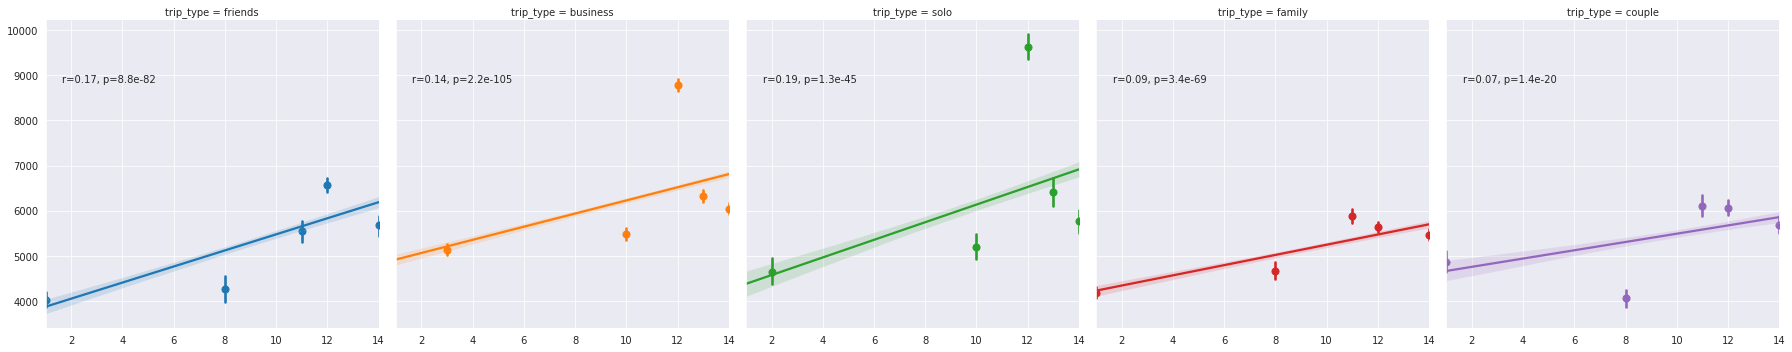

In [ ]:
g = sns.lmplot(x='precautions_count', y='price_mean', data=df_new,
               hue='trip_type', col='trip_type', x_bins=5)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['precautions_count'], data['price_mean'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)

g.map_dataframe(annotate)
plt.show()

In [ ]:
df_new.precautions_count_binned.value_counts()

2    37349
3    33738
1    31884
5    30175
4    22115
Name: precautions_count_binned, dtype: int64

In [ ]:
df_new.groupby(by='precautions_count', dropna=True).agg({'price_mean':'mean',
                                                         'price_high':'mean',
                                                         'price_low':'mean'}).sort_values('price_mean', ascending=False)

price_mean    price_high    price_low
precautions_count                                        
6                  7240.942053  12296.474338  2185.409768
12                 5683.304836   7592.036639  3774.573033
5                  5170.979458   6766.356602  3575.602314
7                  4641.353738   5951.179439  3331.528037
4                  4588.103704   5950.651178  3225.556229
13                 4515.789170   6100.832331  2930.746009
11                 4466.663453   6399.312016  2534.014890
14                 4432.416752   5857.096305  3007.737200
10                 4426.780455   5976.344029  2877.216881
2                  4055.591656   5260.699870  2850.483442
3                  4053.825409   5812.336358  2295.314460
1                  3467.324896   4711.327106  2223.322685
9                  3244.567169   4397.678038  2091.456299
8                  1625.379907   2168.841554  1081.918261

In [ ]:
df_new['precautions_count_binned_temp_dont_use_this'] = pd.cut(df_new['precautions_count'], bins=[0, 5, 10, 15], labels=[1,2,3])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


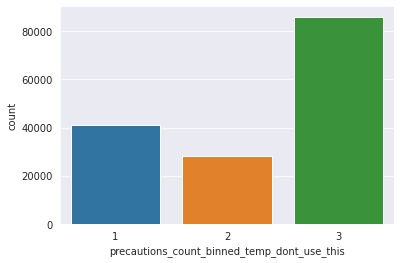

In [ ]:
sns.countplot(df_new.precautions_count_binned_temp_dont_use_this);

hotels that take 10-15 precautions have most number of residents (at least they have most no of ppl leaving reviews after their stay)

In [ ]:
df_new.groupby('hotel_name').agg({'precautions_count_binned_temp_dont_use_this':'max'})

precautions_count_binned_temp_dont_use_this
hotel_name                                                                             
180 McIver                                                                            1
3 by OYO - Nami Residency                                                             1
36 Palms                                                                              1
36 Palms Boutique Retreat                                                             1
7 Apple Hotel Aurangabad                                                              3
...                                                                                 ...
ibis Mumbai Airport - An AccorHotels Brand                                            3
ibis Nashik                                                                           3
ibis Styles Goa Calangute Resort                                                      3
juSTa Brij Bhoomi, Nathdwara Resort                                                   1
vivaana CULTURE HOTEL                                                                 2

[2290 rows x 1 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


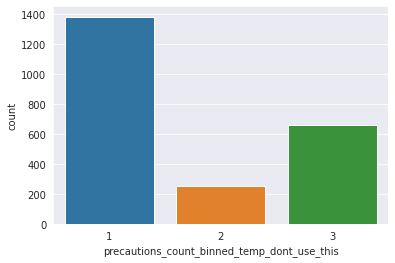

In [ ]:
sns.countplot(df_new.groupby('hotel_name').agg({'precautions_count_binned_temp_dont_use_this':'max'}).precautions_count_binned_temp_dont_use_this)

Most hotels take only 0-5 precautions followed by 10-15 precautions

In [ ]:
sid = SentimentIntensityAnalyzer()

df_new['sentiment_scores'] = df_new['cleaned_review'].apply(lambda rev: sid.polarity_scores(rev))
df_new['compound_score'] = df_new['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

In [ ]:
df_new.groupby(by='precautions_count_binned_temp_dont_use_this', dropna=True).agg({'price_mean':'mean', 'compound_score':'mean'}).sort_values('price_mean', ascending=False)

price_mean  compound_score
precautions_count_binned                             
3                         5198.927367        0.911154
4                         4515.789170        0.916594
5                         4432.416752        0.913715
2                         3991.374039        0.914559
1                         3538.081483        0.884461

not much difference in vader sentiment scores

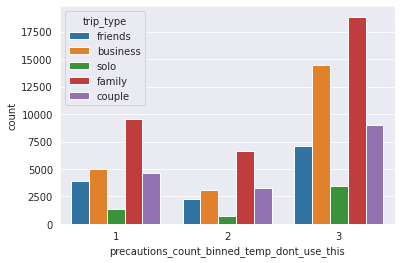

In [ ]:
sns.countplot(x='precautions_count_binned_temp_dont_use_this', hue='trip_type', data=df_new);

try percentages for the above and try to link it with the price

there's no variation in the spread of trip type acorss binned precaution count, hence people are willing to pay extra for more precautions

colours and shapes (should be decipherable in black and white)
remove underscores from visualisations
legend - first letter must be capital for each trip_type - try changing source code

In [ ]:
df_new[df_new.precautions_count==1].groupby('hotel_name').agg({'price_mean':'mean'}).price_mean.mean()

2557.8641245463778

Mean price of hotels having no precautions listed on tripadvisor is just 2257

In [ ]:
df_new.precautions.fillna('Not Listed', inplace=True)heatmap
precautions = df_new.groupby('hotel_name').agg({'precautions':'max'}).precautions.str.split('\n')

total_precautions=[]

for i in precautions:
  for j in i:
    total_precautions.append(j)

df_precautions = pd.DataFrame(columns=['precautions'])
df_precautions.precautions = total_precautions

In [ ]:
precautions = df_new.groupby('hotel_name').agg({'precautions':'max'}).precautions.str.split('\n')

total_precautions=[]

for i in precautions:
  for j in i:
    total_precautions.append(j)

df_precautions = pd.DataFrame(columns=['precautions'])
df_precautions.precautions = total_precautions

In [ ]:
df_precautions.precautions.value_counts()

Not Listed                                          1249
Staff required to regularly wash hands               910
Face masks required for staff in public areas        907
Regular temperature checks for staff                 895
Face masks required for guests in public areas       860
Contactless check-out                                727
Individually wrapped toiletries                      696
Contactless check-in                                 685
Floors marked for social distancing                  677
Doctors available 24/7                               605
24-hour minimum vacancy between guests               602
Hand sanitiser available to guests & staff           577
Regularly sanitised high-traffic areas               554
All linens sanitised in high-temperature wash        553
Paid stay-at-home policy for staff with symptoms     485
Hand sanitizer available to guests & staff           388
Regularly sanitized high-traffic areas               379
All linens sanitized in high-te

In [ ]:
df_precautions.precautions.replace({'All linens sanitized in high-temperature wash':'All linens sanitised in high-temperature wash',
                                    'Regularly sanitized high-traffic areas':'Regularly sanitised high-traffic areas',
                                    'Hand sanitizer available to guests & staff':'Hand sanitiser available to guests & staff'}, inplace=True)

In [ ]:
df_precautions.precautions.value_counts()

Not Listed                                          1249
Hand sanitiser available to guests & staff           965
Regularly sanitised high-traffic areas               933
Staff required to regularly wash hands               910
Face masks required for staff in public areas        907
All linens sanitised in high-temperature wash        905
Regular temperature checks for staff                 895
Face masks required for guests in public areas       860
Contactless check-out                                727
Individually wrapped toiletries                      696
Contactless check-in                                 685
Floors marked for social distancing                  677
Doctors available 24/7                               605
24-hour minimum vacancy between guests               602
Paid stay-at-home policy for staff with symptoms     485
Name: precautions, dtype: int64

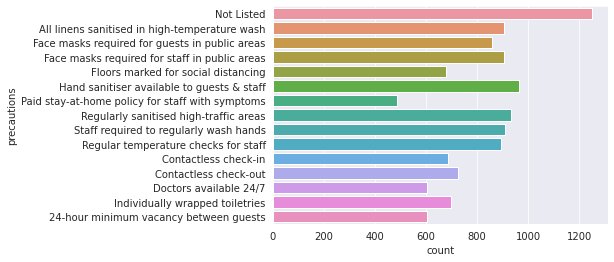

In [ ]:
sns.countplot(y='precautions', data=df_precautions);

try analysing wrt reviews. do a table with precautions listed, count and compound_score

### without hotels that haven't listed precautions

In [ ]:
df_new_prec = df_new[df_new.precautions_count>1]

In [ ]:
df_new_prec.drop(columns=['precautions_count_binned'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_new_prec.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


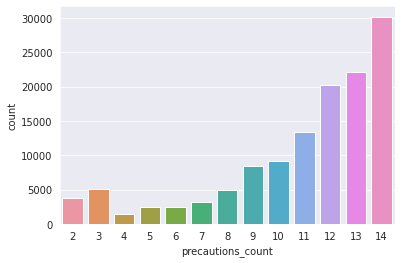

In [ ]:
sns.countplot(df_new_prec['precautions_count']); #by review

In [ ]:
pd.qcut(df_new_prec.precautions_count, 6, duplicates='drop').value_counts()

(8.0, 11.0]     31127
(13.0, 14.0]    30175
(1.999, 8.0]    23489
(12.0, 13.0]    22115
(11.0, 12.0]    20306
Name: precautions_count, dtype: int64

In [ ]:
df_new_prec['precautions_count_binned'] = pd.qcut(df_new_prec.precautions_count, 6, duplicates='drop')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


##### regression by reviews

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
x = df_new_prec.precautions_count
x = sm.add_constant(x)
y = df_new_prec.price_mean

In [ ]:
mod = sm.OLS(y, x)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             price_mean   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     181.5
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           2.76e-41
Time:                        06:05:25   Log-Likelihood:            -4.8417e+05
No. Observations:               49478   AIC:                         9.683e+05
Df Residuals:                   49476   BIC:                         9.684e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8142.0636     67.50

##### regression by hotel

In [ ]:
df_new_prec.groupby(['hotel_name', 'location'], as_index=False).agg({'precautions_count':'mean',
                                                                     'price_mean':'mean'})

hotel_name  ...   price_mean
0                            7 Apple Hotel Aurangabad  ...  2297.000000
1                                      7 Apple Resort  ...  3694.791209
2                       AGS Holiday Resorts, Yelagiri  ...     0.000000
3                     ALMEIDA - IN THE LAP OF ROYALTY  ...     0.000000
4    AM Hotel Kollection: The Summer House, Pachmarhi  ...     0.000000
..                                                ...  ...          ...
995                         ibis Chennai Sipcot Hotel  ...  1778.005952
996                 ibis Coimbatore City Centre Hotel  ...  2120.083333
997        ibis Mumbai Airport - An AccorHotels Brand  ...  6746.000000
998                                       ibis Nashik  ...  3743.500000
999                  ibis Styles Goa Calangute Resort  ...  5506.000000

[1000 rows x 4 columns]

In [ ]:
df_new_prec_hotel = df_new_prec.groupby(['hotel_name', 'location'], as_index=False).agg({'precautions_count':'mean',
                                                                                         'price_mean':'mean',
                                                                                         'price_low':'mean',
                                                                                         'price_high':'mean',})

In [ ]:
df_new_prec_hotel

hotel_name  ...   price_high
0                            7 Apple Hotel Aurangabad  ...  2771.000000
1                                      7 Apple Resort  ...  4534.329670
2                       AGS Holiday Resorts, Yelagiri  ...     0.000000
3                     ALMEIDA - IN THE LAP OF ROYALTY  ...     0.000000
4    AM Hotel Kollection: The Summer House, Pachmarhi  ...     0.000000
..                                                ...  ...          ...
995                         ibis Chennai Sipcot Hotel  ...  1922.380952
996                 ibis Coimbatore City Centre Hotel  ...  2332.055556
997        ibis Mumbai Airport - An AccorHotels Brand  ...  8726.000000
998                                       ibis Nashik  ...  4184.000000
999                  ibis Styles Goa Calangute Resort  ...  6534.000000

[1000 rows x 6 columns]

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
x = df_new_prec_hotel.precautions_count

In [ ]:
x

0      14.0
1      13.0
2       6.0
3      14.0
4       9.0
       ... 
995    14.0
996    14.0
997    14.0
998    13.0
999    14.0
Name: precautions_count, Length: 1000, dtype: float64

In [ ]:
x = sm.add_constant(x)
y = df_new_prec_hotel.price_mean

In [ ]:
x

const  precautions_count
0      1.0               14.0
1      1.0               13.0
2      1.0                6.0
3      1.0               14.0
4      1.0                9.0
..     ...                ...
995    1.0               14.0
996    1.0               14.0
997    1.0               14.0
998    1.0               13.0
999    1.0               14.0

[1000 rows x 2 columns]

In [ ]:
mod = sm.OLS(endog=y, exog=x)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             price_mean   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.660
Date:                Sat, 10 Jul 2021   Prob (F-statistic):              0.103
Time:                        12:30:55   Log-Likelihood:                -9844.2
No. Observations:                1000   AIC:                         1.969e+04
Df Residuals:                     998   BIC:                         1.970e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2946.9370    475.91

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(np.array(df_new_prec_hotel['precautions_count']).reshape(-1,1), np.array(df_new_prec_hotel['price_mean']).reshape(-1,1))

In [ ]:
reg.score(np.array(df_new_prec_hotel['precautions_count']).reshape(-1,1), np.array(df_new_prec_hotel['price_mean']).reshape(-1,1))

0.0006976934839463267

hence we conclude that there is no linear relationship b/w precautions_count and price_mean

In [ ]:
df_new_prec_hotel.precautions_count.value_counts()

14    87
12    57
13    54
11    45
10    23
9     18
7     13
3     13
2     12
8      6
5      6
1      5
6      4
4      2
Name: precautions_count, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


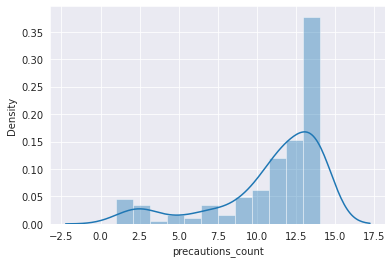

In [ ]:
sns.distplot(df_new_prec_hotel.precautions_count)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


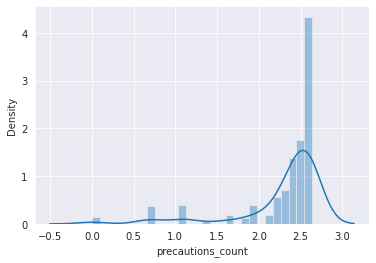

In [ ]:
sns.distplot(np.log(df_new_prec_hotel.precautions_count))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


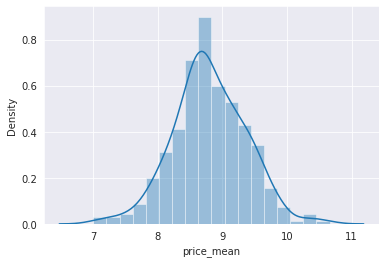

In [ ]:
sns.distplot(np.log(df_new_prec_hotel.price_mean))

In [ ]:
x = np.log(df_new_prec_hotel.precautions_count)
x = sm.add_constant(x)
y = np.log(df_new_prec_hotel.price_mean)

In [ ]:
mod = sm.OLS(endog=y, exog=x)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             price_mean   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3211
Date:                Fri, 11 Jun 2021   Prob (F-statistic):              0.571
Time:                        09:16:24   Log-Likelihood:                -292.10
No. Observations:                 345   AIC:                             588.2
Df Residuals:                     343   BIC:                             595.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.7276      0.13

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_new_prec_hotel['precautions_scaled'] = scaler.fit_transform(np.array(df_new_prec_hotel.precautions_count).reshape(-1,1))
df_new_prec_hotel['price_mean_scaled'] = scaler.fit_transform(np.array(df_new_prec_hotel.price_mean).reshape(-1,1))
df_new_prec_hotel['price_low_scaled'] = scaler.fit_transform(np.array(df_new_prec_hotel.price_low).reshape(-1,1))
df_new_prec_hotel['price_high_scaled'] = scaler.fit_transform(np.array(df_new_prec_hotel.price_high).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


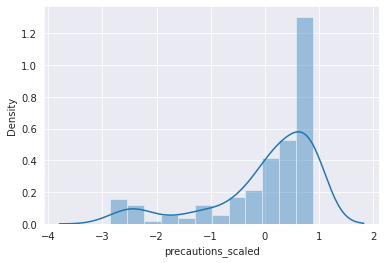

In [ ]:
sns.distplot(df_new_prec_hotel['precautions_scaled'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


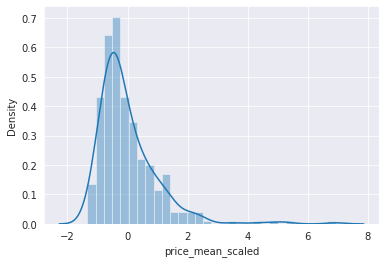

In [ ]:
sns.distplot(df_new_prec_hotel['price_mean_scaled'])

In [ ]:
x = df_new_prec_hotel.precautions_scaled
x = sm.add_constant(x)
y = df_new_prec_hotel.price_mean_scaled

In [ ]:
mod = sm.OLS(endog=y, exog=x)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      price_mean_scaled   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2395
Date:                Wed, 16 Jun 2021   Prob (F-statistic):              0.625
Time:                        06:22:22   Log-Likelihood:                -489.41
No. Observations:                 345   AIC:                             982.8
Df Residuals:                     343   BIC:                             990.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.683e-16      0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


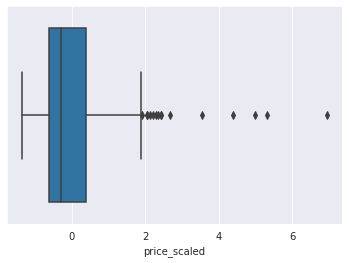

In [ ]:
sns.boxplot(df_new_prec_hotel['price_mean_scaled'])

In [ ]:
df_new_prec_hotel['price_mean_scaled'].describe()

count    3.450000e+02
mean    -1.636372e-16
std      1.001452e+00
min     -1.338762e+00
25%     -6.218236e-01
50%     -2.915889e-01
75%      3.760638e-01
max      6.932469e+00
Name: price_mean_scaled, dtype: float64

In [ ]:
iqr = df_new_prec_hotel['price_mean_scaled'].quantile(0.75) - df_new_prec_hotel['price_mean_scaled'].quantile(0.25)
upper_whisker = df_new_prec_hotel['price_mean_scaled'].quantile(0.75) + 1.5*iqr
price_mean_scaled_no_outliers = np.where(df_new_prec_hotel['price_mean_scaled'] > upper_whisker, upper_whisker, df_new_prec_hotel['price_mean_scaled'])
df_new_prec_hotel['price_mean_scaled_no_outliers'] = price_mean_scaled_no_outliers

0.9978873608037482

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


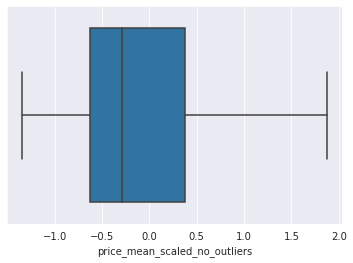

In [ ]:
sns.boxplot(df_new_prec_hotel['price_mean_scaled_no_outliers'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


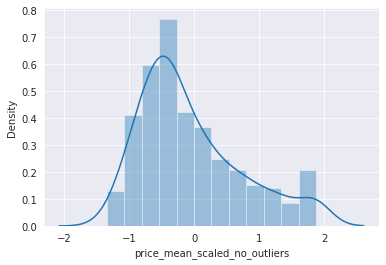

In [ ]:
sns.distplot(df_new_prec_hotel['price_mean_scaled_no_outliers'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


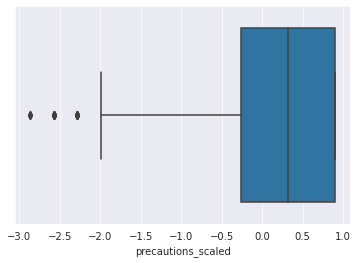

In [ ]:
sns.boxplot(df_new_prec_hotel['precautions_scaled'])

In [ ]:
iqr = df_new_prec_hotel.precautions_scaled.quantile(0.75) - df_new_prec_hotel.precautions_scaled.quantile(0.25)
lower_whikser = df_new_prec_hotel['precautions_scaled'].quantile(0.25) - 1.5*iqr

In [ ]:
precautions_scaled_no_outliers = np.where(df_new_prec_hotel['precautions_scaled'] < lower_whikser, lower_whikser, df_new_prec_hotel['precautions_scaled'])

In [ ]:
df_new_prec_hotel['precautions_scaled_no_outliers'] = precautions_scaled_no_outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


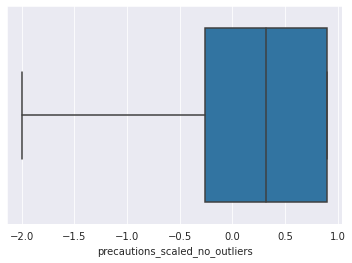

In [ ]:
sns.boxplot(df_new_prec_hotel['precautions_scaled_no_outliers'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


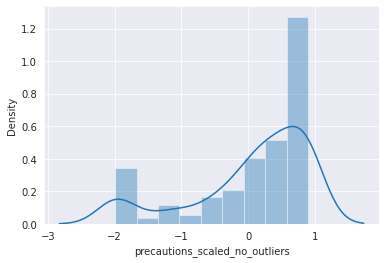

In [ ]:
sns.distplot(df_new_prec_hotel['precautions_scaled_no_outliers'])

In [ ]:
x = df_new_prec_hotel.precautions_scaled_no_outliers
x = sm.add_constant(x)
y = df_new_prec_hotel.price_mean_scaled_no_outliers

In [ ]:
mod = sm.OLS(endog=y, exog=x)
res = mod.fit()
print(res.summary())

                                  OLS Regression Results                                 
Dep. Variable:     price_mean_scaled_no_outliers   R-squared:                       0.003
Model:                                       OLS   Adj. R-squared:                  0.000
Method:                            Least Squares   F-statistic:                     1.135
Date:                           Wed, 16 Jun 2021   Prob (F-statistic):              0.287
Time:                                   06:25:50   Log-Likelihood:                -405.50
No. Observations:                            345   AIC:                             815.0
Df Residuals:                                343   BIC:                             822.7
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-

In [ ]:
stats.f_oneway(precautions_scaled_no_outliers, price_mean_scaled_no_outliers)

F_onewayResult(statistic=2.4447552877370846, pvalue=0.11837810055260735)

In [ ]:
stats.f_oneway(precautions_scaled_no_outliers, price_mean_scaled_no_outliers)

F_onewayResult(statistic=2.4447552877370846, pvalue=0.11837810055260735)

In [ ]:
stats.kruskal(df_new_prec_hotel.precautions_count, df_new_prec_hotel.price_mean)

KruskalResult(statistic=518.5137697873615, pvalue=8.910289906200962e-115)

In [ ]:
stats.kruskal(df_new_prec_hotel.precautions_count_binned, df_new_prec_hotel.price_mean)

KruskalResult(statistic=525.0662363361689, pvalue=3.344454226777385e-116)

statistically significant difference in the means of price for all precautions groups

In [ ]:
df_new_prec_hotel

precautions_count  ...  precautions_count_binned
hotel_name                                                     ...                          
Aadrika                                                    10  ...                         1
Aauris                                                      9  ...                         1
Abu Sarovar Portico                                        10  ...                         1
Aditya Hometel                                              9  ...                         1
Aloft Bengaluru Cessna Business Park                       13  ...                         2
...                                                       ...  ...                       ...
ibis Bengaluru Outer Ring Road Hotel                       12  ...                         2
ibis Chennai OMR Hotel                                     13  ...                         2
ibis Chennai Sipcot Hotel                                  14  ...                         3
ibis Mumbai Airport - An AccorHotels Brand                 14  ...                         3
ibis Styles Goa Calangute Resort                           14  ...                         3

[345 rows x 11 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


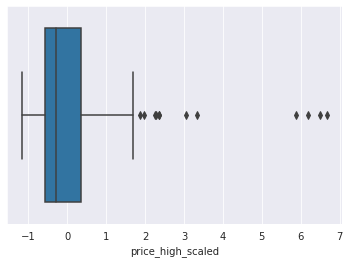

In [ ]:
sns.boxplot(df_new_prec_hotel.price_high_scaled)

In [ ]:
iqr = df_new_prec_hotel['price_high_scaled'].quantile(0.75) - df_new_prec_hotel['price_high_scaled'].quantile(0.25)
upper_whisker = df_new_prec_hotel['price_high_scaled'].quantile(0.75) + 1.5*iqr
price_high_scaled_no_outliers = np.where(df_new_prec_hotel['price_high_scaled'] > upper_whisker, upper_whisker, df_new_prec_hotel['price_high_scaled'])
df_new_prec_hotel['price_high_scaled_no_outliers'] = price_high_scaled_no_outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


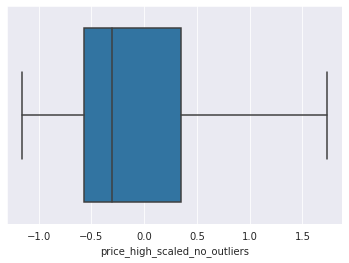

In [ ]:
sns.boxplot(df_new_prec_hotel.price_high_scaled_no_outliers)

In [ ]:
x = df_new_prec_hotel.precautions_scaled_no_outliers
x = sm.add_constant(x)
y = df_new_prec_hotel.price_high_scaled_no_outliers

In [ ]:
mod = sm.OLS(endog=y, exog=x)
res = mod.fit()
print(res.summary())

                                  OLS Regression Results                                 
Dep. Variable:     price_high_scaled_no_outliers   R-squared:                       0.003
Model:                                       OLS   Adj. R-squared:                  0.000
Method:                            Least Squares   F-statistic:                     1.041
Date:                           Wed, 16 Jun 2021   Prob (F-statistic):              0.308
Time:                                   06:33:50   Log-Likelihood:                -367.75
No. Observations:                            345   AIC:                             739.5
Df Residuals:                                343   BIC:                             747.2
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-

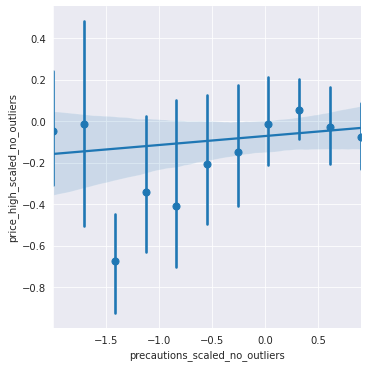

In [ ]:
sns.lmplot(data=df_new_prec_hotel, x='precautions_scaled_no_outliers', y='price_high_scaled_no_outliers', x_estimator=np.mean)

#### precautions vs price by hotel

In [ ]:
df_new_prec.groupby('hotel_name', as_index=False).agg({'precautions_count':'max',
                                                       'price_mean':'mean',
                                                       'price_high':'mean',
                                                       'price_low':'mean'})

hotel_name  ...    price_low
0                             7 Apple Hotel Aurangabad  ...  1823.000000
1                                       7 Apple Resort  ...  2855.252747
2                        AGS Holiday Resorts, Yelagiri  ...     0.000000
3                      ALMEIDA - IN THE LAP OF ROYALTY  ...     0.000000
4     AM Hotel Kollection: The Summer House, Pachmarhi  ...     0.000000
...                                                ...  ...          ...
1010                 ibis Coimbatore City Centre Hotel  ...  1908.111111
1011        ibis Mumbai Airport - An AccorHotels Brand  ...  4766.000000
1012                                       ibis Nashik  ...  3303.000000
1013                  ibis Styles Goa Calangute Resort  ...  4478.000000
1014                             vivaana CULTURE HOTEL  ...     0.000000

[1015 rows x 5 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


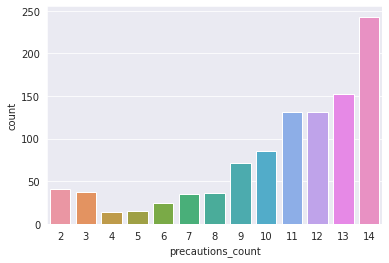

In [ ]:
sns.countplot( df_new_prec.groupby('hotel_name', as_index=False).agg({'precautions_count':'max'}).precautions_count )

lot of hotels taking a large number of precautions

In [ ]:
df_new_prec_hotel = df_new_prec.groupby('hotel_name', as_index=False).agg({'precautions_count':'max',
                                                                           'price_mean':'max',
                                                                           'price_high':'mean',
                                                                           'price_low':'mean'})

In [ ]:
df_new_prec_hotel = df_new_prec_hotel[df_new_prec_hotel.price_mean!=0]

In [ ]:
df_new_prec_hotel.shape

(548, 6)

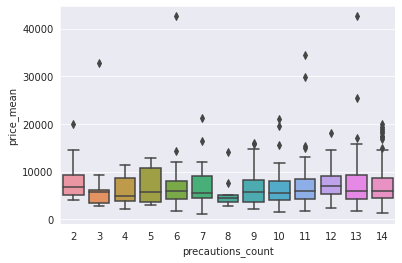

In [ ]:
sns.boxplot(x='precautions_count', y='price_mean', data=df_new_prec_hotel)

(array([221., 215.,  66.,  30.,  10.,   1.,   1.,   1.,   1.,   2.]),
 array([ 1100.  ,  5247.25,  9394.5 , 13541.75, 17689.  , 21836.25,
        25983.5 , 30130.75, 34278.  , 38425.25, 42572.5 ]),
 <a list of 10 Patch objects>)

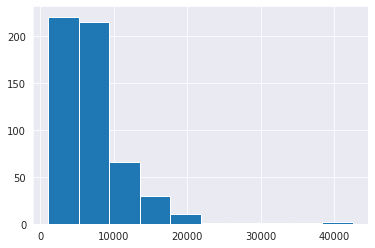

In [ ]:
plt.hist(df_new_prec_hotel.price_mean)

In [ ]:
stats.levene(df_new_prec_hotel.precautions_count, df_new_prec_hotel.price_mean, center='trimmed')

LeveneResult(statistic=899.5248794611853, pvalue=5.732338468123839e-141)

unequal variances

In [ ]:
df_new_prec_hotel.groupby('precautions_count').agg({'price_mean':np.var,
                                                    'price_high':np.var,
                                                    'price_low':np.var
                                                  })

price_mean    price_high     price_low
precautions_count                                          
2                  1.767368e+07  3.013105e+07  6.526521e+06
3                  4.869012e+07  1.769758e+08  1.791100e+06
4                  9.486939e+06  1.847354e+07  3.957104e+06
5                  1.913555e+07  2.760359e+07  6.314746e+06
6                  1.219910e+08  2.342287e+08  6.593183e+06
7                  2.282458e+07  3.070864e+07  7.484654e+06
8                  8.611679e+06  1.373574e+07  5.609199e+06
9                  1.787028e+07  3.117701e+07  9.462693e+06
10                 1.670252e+07  3.488930e+07  3.726650e+06
11                 2.989486e+07  1.047655e+08  3.549809e+06
12                 1.065027e+07  1.624200e+07  4.215008e+06
13                 3.025113e+07  4.067251e+07  5.657413e+06
14                 1.623159e+07  3.303550e+07  5.677953e+06

In [ ]:
if( 4*8.611679e+06 < 1.219910e+08):
  print(1)

1


going ahead with Kruskal's

In [ ]:
stats.kruskal(df_new_prec_hotel.precautions_count, df_new_prec_hotel.price_mean)

KruskalResult(statistic=824.0618092481968, pvalue=3.1672802186393264e-181)

significantly different means of prices for different precaution counts

try a post hoc test Tukey's HSD

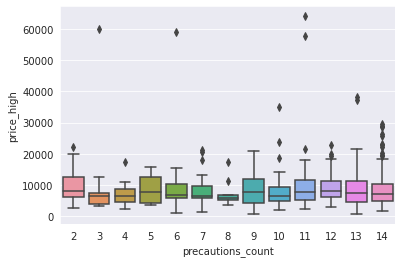

In [ ]:
sns.boxplot(x='precautions_count', y='price_high', data=df_new_prec_hotel)

make the box plot presentable

(array([260., 199.,  59.,  19.,   4.,   3.,   0.,   0.,   1.,   3.]),
 array([  740.625 ,  7068.3625, 13396.1   , 19723.8375, 26051.575 ,
        32379.3125, 38707.05  , 45034.7875, 51362.525 , 57690.2625,
        64018.    ]),
 <a list of 10 Patch objects>)

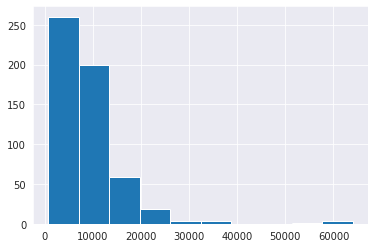

In [ ]:
plt.hist(df_new_prec_hotel.price_high)

In [ ]:
stats.levene(df_new_prec_hotel.precautions_count, df_new_prec_hotel.price_mean, center='trimmed')

LeveneResult(statistic=899.5248794611853, pvalue=5.732338468123839e-141)

In [ ]:
stats.kruskal(df_new_prec_hotel.precautions_count, df_new_prec_hotel.price_high)

KruskalResult(statistic=824.0618544697057, pvalue=3.1672085181607533e-181)

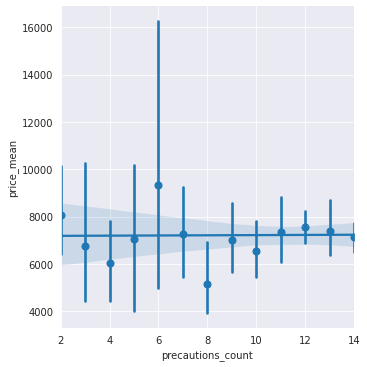

In [ ]:
sns.lmplot(x='precautions_count', y='price_mean', x_estimator=np.mean, data=df_new_prec_hotel);

In [ ]:
pd.qcut(df_new_prec_hotel.precautions_count,3).value_counts()

(1.999, 11.0]    236
(11.0, 13.0]     170
(13.0, 14.0]     142
Name: precautions_count, dtype: int64

In [ ]:
df_new_prec_hotel['precautions_count_binned'] = pd.qcut(df_new_prec_hotel.precautions_count, 3, labels=[1, 2, 3])

In [ ]:
df_new_prec_hotel.precautions_count_binned.value_counts()

1    236
2    170
3    142
Name: precautions_count_binned, dtype: int64

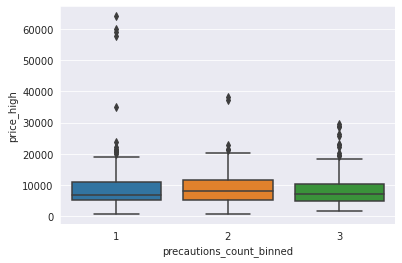

In [ ]:
sns.boxplot(x='precautions_count_binned', y='price_high', data=df_new_prec_hotel)

some hotels that charge more, haven't listed as many precautions, not a good sign

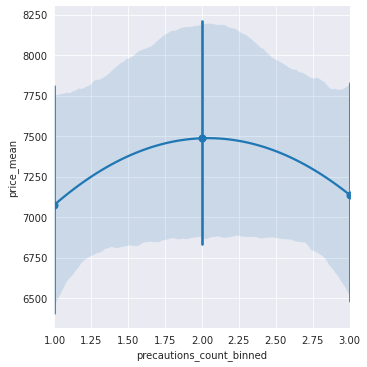

In [ ]:
sns.lmplot(x='precautions_count_binned', y='price_mean', x_estimator=np.mean, data=df_new_prec_hotel, order=2);

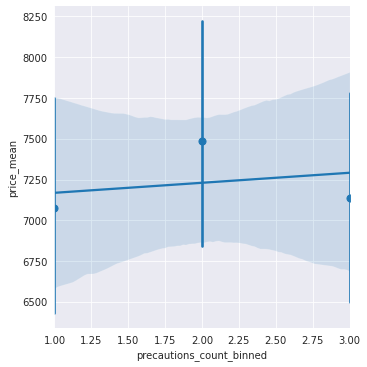

In [ ]:
sns.lmplot(x='precautions_count_binned', y='price_mean', x_estimator=np.mean, data=df_new_prec_hotel,);

##### chi-sqaure for precautions_count_binned and price_mean_binned -- skip

In [ ]:
df_new_prec_hotel['price_mean_binned'] = pd.qcut(df_new_prec_hotel.price_mean, 5, labels=[1,2,3,4,5])

In [ ]:
pd.crosstab(df_new_prec_hotel.precautions_count_binned, df_new_prec_hotel.price_mean_binned)

AttributeError: ignored

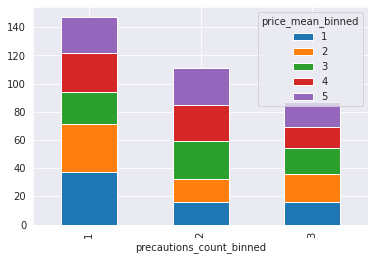

In [ ]:
pd.crosstab(df_new_prec_hotel.precautions_count_binned, df_new_prec_hotel.price_mean_binned).plot(kind='bar', stacked=True)

In [ ]:
df_new_prec_hotel

precautions_count  price_mean
hotel_name                                                               
Aadrika                                                    10      4252.5
Aauris                                                      9      4917.0
Abu Sarovar Portico                                        10      3994.5
Aditya Hometel                                              9      3153.0
Aloft Bengaluru Cessna Business Park                       13     10555.5
...                                                       ...         ...
ibis Bengaluru Outer Ring Road Hotel                       12      5644.0
ibis Chennai OMR Hotel                                     13      3266.5
ibis Chennai Sipcot Hotel                                  14      2715.5
ibis Mumbai Airport - An AccorHotels Brand                 14      6746.0
ibis Styles Goa Calangute Resort                           14      5506.0

[345 rows x 2 columns]

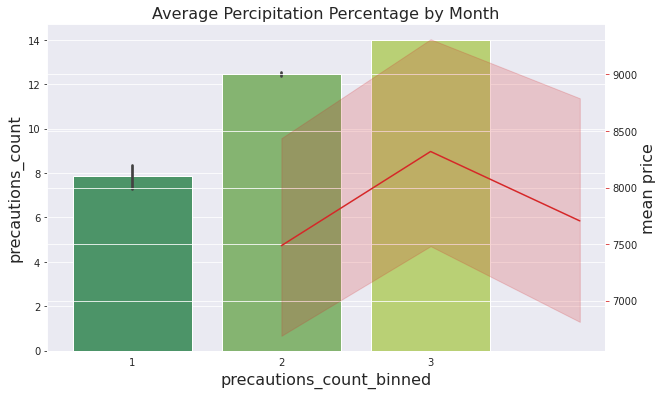

In [ ]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('Average Percipitation Percentage by Month', fontsize=16)
ax1.set_xlabel('hotels', fontsize=16)
ax1.set_ylabel('number of precautions taken', fontsize=16)
ax1 = sns.barplot(x='precautions_count_binned', y='precautions_count', data=df_new_prec_hotel, palette='summer')
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('mean price', fontsize=16)
ax2 = sns.lineplot(x='precautions_count_binned', y='price_mean', data=df_new_prec_hotel, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot

plt.show()

In [ ]:
observed = pd.crosstab(df_new_prec_hotel.precautions_count_binned, df_new_prec_hotel.price_mean_binned)

In [ ]:
stats.chi2_contingency(observed)

(11.444581214192509,
 0.17775814226008646,
 8,
 array([[29.4       , 29.82608696, 28.97391304, 29.4       , 29.4       ],
        [22.2       , 22.52173913, 21.87826087, 22.2       , 22.2       ],
        [17.4       , 17.65217391, 17.14782609, 17.4       , 17.4       ]]))

In [ ]:
expected = stats.chi2_contingency(observed)[3]

In [ ]:
expected

array([[29.4       , 29.82608696, 28.97391304, 29.4       , 29.4       ],
       [22.2       , 22.52173913, 21.87826087, 22.2       , 22.2       ],
       [17.4       , 17.65217391, 17.14782609, 17.4       , 17.4       ]])

In [ ]:
chi_square = sum( [ (o-e)**2/e for o,e in zip(observed.values, expected) ] )
chi_sq_stat = chi_square[0] + chi_square[1]

In [ ]:
chi_sq_stat

6.593712441706812

In [ ]:
critical_val = stats.chi2.ppf(q=0.95, df=8)
p_val = 1 - stats.chi2.cdf(chi_sq_stat, 8)

In [ ]:
critical_val

15.50731305586545

In [ ]:
p_val

0.5810327941055873

chi-square stat < critical value and p > 0.05 => there is no statistically significant relation b/w the two variables

#### precautions, price_mean and trip_type -- try

In [ ]:
df_new_prec.precautions_count_binned.value_counts()

(8.0, 11.0]     31127
(13.0, 14.0]    30175
(1.999, 8.0]    23489
(12.0, 13.0]    22115
(11.0, 12.0]    20306
Name: precautions_count_binned, dtype: int64

In [ ]:
b = pd.qcut(df_new_prec.precautions_count, 3, labels=[1, 2, 3])

In [ ]:
df_new_prec['precautions_count_binned'] = b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_new_prec.precautions_count_binned.value_counts()

2    19567
1    18333
3    11578
Name: precautions_count_binned, dtype: int64

In [ ]:
a = pd.qcut(df_new_prec.price_mean, 5, labels=[1, 2, 3, 4, 5])

In [ ]:
df_new_prec['price_mean_binned'] = a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_new_prec.price_mean_binned.value_counts()

2    10053
1     9916
5     9872
3     9821
4     9816
Name: price_mean_binned, dtype: int64

In [ ]:
df_new_prec.trip_type.value_counts()

business    14003
family      12985
couple       6536
friends      5807
solo         3323
Name: trip_type, dtype: int64

In [ ]:
df_new_prec.columns

Index(['hotel_name', 'review', 'rating', 'precautions', 'amenities',
       'room_features', 'room_types', 'price_range', 'location',
       'review_heading', 'Month', 'Year', 'Date', 'cleaned_review', 'business',
       'couple', 'family', 'friends', 'solo', 'price_low', 'price_high',
       'price_mean', 'precautions_count', 'trip_type',
       'precautions_count_binned', 'price_mean_binned'],
      dtype='object')

In [ ]:
pd.pivot_table( df_new_prec,
                values=['business', 'couple', 'family', 'friends', 'solo'],
                index=['precautions_count_binned', 'price_mean_binned'],
                aggfunc='sum' )

business  couple  ...  friends  solo
precautions_count_binned price_mean_binned                    ...               
1                        1                      1341     797  ...      680   326
                         2                      1247     342  ...      383   232
                         3                      1079     450  ...      473   283
                         4                       622     433  ...      314   128
                         5                       565     547  ...      393   118
2                        1                       605     307  ...      254   122
                         2                      1233     413  ...      447   296
                         3                      1082     511  ...      585   207
                         4                      1838     760  ...      748   366
                         5                      1114     401  ...      314   390
3                        1                       896     380  ...      249   244
                         2                       919     332  ...      308   313
                         3                       655     236  ...      206   103
                         4                       302     178  ...      170    61
                         5                       505     449  ...      283   134

[15 rows x 5 columns]

In [ ]:
df_new_prec_price_tt = pd.pivot_table( df_new_prec,
                                       values=['business', 'couple', 'family', 'friends', 'solo'],
                                       index=['precautions_count_binned', 'price_mean_binned'],
                                       aggfunc='sum' )

In [ ]:
observed = df_new_prec_price_tt.values

In [ ]:
expected = stats.chi2_contingency(observed)[3]

In [ ]:
chi_square = sum( [ (o-e)**2/e for o,e in zip(observed, expected) ] )
chi_sq_stat = chi_square[0] + chi_square[1]

In [ ]:
chi_sq_stat

606.7443155385795

In [ ]:
14*4

56

In [ ]:
critical_val = stats.chi2.ppf(q=0.95, df=56)
p_val = 1 - stats.chi2.cdf(chi_sq_stat, 56)

In [ ]:
critical_val

74.46832415930936

In [ ]:
p_val

0.0

In [ ]:
critical_val = stats.chi2.ppf(q=0.95, df=8)
p_val = 1 - stats.chi2.cdf(chi_sq_stat, 8)

In [ ]:
critical_val

15.50731305586545

In [ ]:
p_val

0.0

#### locations vs precautions -- hold

In [ ]:
df_locations = df_new.groupby('location', as_index=False).agg({'precautions_count':'mean',
                                                               'price_mean':'mean',}).sort_values('precautions_count', ascending=False).reset_index(drop=True)

In [ ]:
df_locations

location  precautions_count  price_mean
0       Pothamedu               14.0         0.0
1       Gorakhpur               14.0         0.0
2      Dhanachuli               14.0         0.0
3    Divar Island               14.0         0.0
4        Bathinda               14.0         0.0
..            ...                ...         ...
376         Churu                1.0         0.0
377         Chomu                1.0         0.0
378        Orchha                1.0         0.0
379  Chittaurgarh                1.0         0.0
380      Agartala                1.0         0.0

[381 rows x 3 columns]

In [ ]:
pd.cut(df_locations.precautions_count, bins=[0, 5, 10, 15] ).value_counts()

(0, 5]      170
(5, 10]     118
(10, 15]     93
Name: precautions_count, dtype: int64

In [ ]:
df_locations['precautions_count_binned'] = pd.cut(df_locations.precautions_count, bins=[0, 5, 10, 15], labels=[1,2,3])

In [ ]:
df_locations.tail()

location  precautions_count  price_mean precautions_count_binned
376         Churu                1.0         0.0                        1
377         Chomu                1.0         0.0                        1
378        Orchha                1.0         0.0                        1
379  Chittaurgarh                1.0         0.0                        1
380      Agartala                1.0         0.0                        1

In [ ]:
df_locations[ df_locations.precautions_count_binned==1 ].location.to_list()

['Thavinhal',
 'Daman',
 'Darjeeling',
 'Alappuzha',
 'Gangtok',
 'Valparai',
 'Hassan',
 'Rameswaram',
 'Panchgani',
 'Ramnagar',
 'Mukteshwar',
 'Erode',
 'Kausani',
 'Masinagudi',
 'Kullu',
 'Hubli-Dharwad',
 'Velankanni',
 'Pelling',
 'Mohali',
 'Kanha National Park',
 'Digha',
 'Ravangla',
 'Ganpatipule',
 'Kushalnagar',
 'Pantnagar',
 'Karwar',
 'Anjuna',
 'Shivpuri',
 'Arambol',
 'Auli',
 'Somnath',
 'Kanyakumari',
 'Tiruchirappalli',
 'Bandipur',
 'Tapovan',
 'Bundi',
 'Ranchi',
 'Agonda',
 'Ernakulam',
 'Lataguri',
 'Pawalgarh',
 'Kurnool',
 'Bilaspur',
 'Banjar',
 'Varanasi',
 'Kottayam',
 'Mandawa',
 'Paro',
 'Varkala Town',
 'Vapi',
 'Chail',
 'Sohra',
 'Jamshedpur',
 'Udupi',
 'Sarahan',
 'Tala',
 'Santiniketan',
 'Amer',
 'Ambalavayal',
 'Samode',
 'Vasco da Gama',
 'Ambala',
 'Almora',
 'Saligao',
 'Ahmednagar',
 'Wai',
 'West Sikkim',
 'Bharuch',
 'Sangla',
 'Anand',
 'Sasan Gir',
 'Theog Tehsil',
 'Tarapith',
 'Sulthan Bathery',
 'Tarkarli',
 'Thanjavur',
 'Bandipur Na

In [ ]:
df_locations[df_locations.precautions_count_binned==2].location.to_list()

['Joshimath',
 'Vypin Island',
 'New Tehri',
 'Kidanganad',
 'Edava',
 'Pondicherry',
 'Lonavala',
 'Colva',
 'Kodaikanal',
 'Mararikulam',
 'Puri',
 'Sawai Madhopur',
 'Raipur',
 'Port Blair',
 'Nagpur',
 'Bir',
 'Jaipur',
 'Mahabalipuram',
 'Bodh Gaya',
 'Vrindavan',
 'Ooty',
 'Navi Mumbai',
 'Leh',
 'Shirdi',
 'Patna',
 'Junagadh',
 'Kotagiri',
 'Devala',
 'Trivandrum',
 'Manali',
 'Solan',
 'Nainital',
 'Hinjewadi',
 'Panjim',
 'Kolkata',
 'Igatpuri',
 'Vadodara',
 'Benaulim',
 'Nashik',
 'Panchkula',
 'Ajmer',
 'Visakhapatnam (Vizag)',
 'Coimbatore',
 'Chandrapur',
 'Rajkot',
 'Gwalior',
 'Lansdowne',
 'Thekkady',
 'Jim Corbett National Park',
 'Havelock Island',
 'Mussoorie',
 'Katra',
 'Tharangambadi',
 'Majorda',
 'Pollachi Town',
 'Kamalapur',
 'Mashobra',
 'Kumily',
 'Cansaulim',
 'Dona Paula',
 'Kovalam',
 'Dahej',
 'Virajpet',
 'Matheran',
 'Kaziranga National Park',
 'Mangalore',
 'Kumarakom',
 'Howrah',
 'Pushkar',
 'Chikmagalur',
 'Prini',
 'Betalbatim',
 'Agra',
 'Khaju

In [ ]:
df_locations[df_locations.precautions_count_binned==3].location.to_list()

['Pothamedu',
 'Gorakhpur',
 'Dhanachuli',
 'Divar Island',
 'Bathinda',
 'Kanchipuram',
 'Tuticorin',
 'Fort Kochi',
 'Alsisar',
 'Rudrapur',
 'Binsar',
 'Naddi',
 'Nedumbassery',
 'Bhiwadi',
 'Ratnagiri',
 'Thrissur',
 'Jamnagar',
 'Palampur',
 'Gandhinagar',
 'Haripur',
 'Moradabad',
 'Davangere',
 'Singthali Village',
 'Naldhera',
 'Varkala',
 'Khandala',
 'Kalpetta',
 'Baradia',
 'Kakinada',
 'Kota',
 'Padinjarathara',
 'Chandigarh',
 'Kolhapur',
 'Meerut',
 'Chithirapuram',
 'Hospet',
 'Thane',
 'Cavelossim',
 'Kollam',
 'Jammu City',
 'Oragadam',
 'Dhanbad',
 'Kangra',
 'Nagaon',
 'Maradu',
 'Gund',
 'Siddapura',
 'Gurugram (Gurgaon)',
 'Dhela',
 'Arpora',
 'Utorda',
 'Yercaud',
 'Mundra',
 'Jalandhar',
 'Tirunelveli',
 'Baddi',
 'Udaipur',
 'Madurai',
 'Ahmedabad',
 'Gokarna',
 'Chennai',
 'Gir National Park',
 'Mumbai',
 'Dwarka',
 'Noida',
 'Deori',
 'Jhansi',
 'Patiala',
 'Bija Kheri',
 'Varca',
 'Dapoli',
 'Vijayawada',
 'Shimoga',
 'Bengaluru',
 'Shillong',
 'Aurangabad',


In [ ]:
df_locations[df_locations.price_mean!=0].groupby('precautions_count_binned').agg({'price_mean':'mean'})

price_mean
precautions_count_binned             
1                         7877.086364
2                         5557.616016
3                         5157.951817

#####use this

In [ ]:
df_new.groupby(['hotel_name', 'location']).agg({'precautions_count':'mean',
                                                'price_mean':'mean'})

precautions_count   price_mean
hotel_name                                 location                                    
180 McIver                                 Coonoor                     1.0     0.000000
3 by OYO - Nami Residency                  Ahmedabad                   1.0  6446.500000
36 Palms                                   Cherai Beach                1.0     0.000000
36 Palms Boutique Retreat                  Cherai Beach                1.0     0.000000
7 Apple Hotel Aurangabad                   Aurangabad                 14.0  2297.000000
...                                                                    ...          ...
ibis Coimbatore City Centre Hotel          Coimbatore                 14.0  2120.083333
ibis Mumbai Airport - An AccorHotels Brand Mumbai                     14.0  6746.000000
ibis Nashik                                Nashik                     13.0  3743.500000
ibis Styles Goa Calangute Resort           Calangute                  14.0  5506.000000
juSTa Brij Bhoomi, Nathdwara Resort        Nathdwara                   1.0     0.000000

[2266 rows x 2 columns]

In [ ]:
df_locations = df_new.groupby(['hotel_name', 'location'], as_index=False).agg({'precautions_count':'mean',
                                                                               'price_mean':'mean'})

In [ ]:
df_locations

hotel_name  ...   price_mean
0                                     180 McIver  ...     0.000000
1                      3 by OYO - Nami Residency  ...  6446.500000
2                                       36 Palms  ...     0.000000
3                      36 Palms Boutique Retreat  ...     0.000000
4                       7 Apple Hotel Aurangabad  ...  2297.000000
...                                          ...  ...          ...
2261           ibis Coimbatore City Centre Hotel  ...  2120.083333
2262  ibis Mumbai Airport - An AccorHotels Brand  ...  6746.000000
2263                                 ibis Nashik  ...  3743.500000
2264            ibis Styles Goa Calangute Resort  ...  5506.000000
2265         juSTa Brij Bhoomi, Nathdwara Resort  ...     0.000000

[2266 rows x 4 columns]

In [ ]:
df_locations[df_locations.price_mean!=0].groupby('precautions_count_binned').agg({'price_mean':'mean'})

price_mean
precautions_count_binned             
1                         5353.427637
2                         6351.981217
3                         6825.100477

In [ ]:
df_loc_prec = df_locations.groupby('location', as_index=False).agg({'precautions_count':'mean',
                                                                    'price_mean':'mean'})

In [ ]:
df_loc_prec['precautions_count_binned'] = pd.cut(df_loc_prec.precautions_count, bins=[0,5,10,15], labels=[1,2,3])

In [ ]:
set( df_loc_prec[ df_loc_prec.precautions_count_binned==1 ].location.to_list() )

{'Agartala',
 'Agonda',
 'Agra',
 'Ahmednagar',
 'Ajmer',
 'Alappuzha',
 'Almora',
 'Ambala',
 'Ambalavayal',
 'Amer',
 'Anand',
 'Anjuna',
 'Arambol',
 'Auli',
 'Auroville',
 'Badami',
 'Baga',
 'Bambolim',
 'Bandipur',
 'Bandipur National Park',
 'Banjar',
 'Baragran',
 'Bardez',
 'Barmer',
 'Bellary',
 'Benaulim',
 'Bera',
 'Bharatpur',
 'Bharuch',
 'Bhavnagar',
 'Bhimtal',
 'Bikaner',
 'Bilaspur',
 'Bodh Gaya',
 'Bogmalo',
 'Bundi',
 'Calangute',
 'Canacona',
 'Candolim',
 'Cansaulim',
 'Carmona',
 'Chail',
 'Chandrapur',
 'Cherai Beach',
 'Chidambaram',
 'Chikmagalur',
 'Chitradurga',
 'Chittaurgarh',
 'Chomu',
 'Churu',
 'Cuttack',
 'Dahej',
 'Daman',
 'Dandeli',
 'Darjeeling',
 'Dehradun',
 'Dharampur',
 'Dharamsala',
 'Dhela',
 'Digha',
 'Dindigul',
 'Dirang',
 'Diveagar',
 'Dona Paula',
 'Durgapur',
 'Ernakulam',
 'Erode',
 'Ganeshgudi',
 'Gangtok',
 'Ganpatipule',
 'Govindghat',
 'Gulmarg',
 'Guruvayur',
 'Hampi',
 'Hassan',
 'Havelock Island',
 'Hubli-Dharwad',
 'Hunder',
 '

In [ ]:
set( df_loc_prec[ df_loc_prec.precautions_count_binned==2 ].location.to_list() )

{'Ahmedabad',
 'Alibaug',
 'Alwar',
 'Arpora',
 'Aurangabad',
 'Bandhavgarh National Park',
 'Baradia',
 'Belgaum',
 'Bengaluru',
 'Betalbatim',
 'Bhubaneswar',
 'Bhuj',
 'Bir',
 'Cavelossim',
 'Coimbatore',
 'Colva',
 'Coonoor',
 'Dalhousie',
 'Dapoli',
 'Devala',
 'Dhikuli',
 'Diu',
 'Dwarka',
 'Edava',
 'Gandhidham',
 'Gandhinagar',
 'Ghaziabad',
 'Gir National Park',
 'Gokarna',
 'Greater Noida',
 'Gurugram (Gurgaon)',
 'Gwalior',
 'Hinjewadi',
 'Hospet',
 'Howrah',
 'Hyderabad',
 'Igatpuri',
 'Jaipur',
 'Jaisalmer',
 'Jalandhar',
 'Jammu City',
 'Joshimath',
 'Junagadh',
 'Kakinada',
 'Kamalapur',
 'Katra',
 'Kidanganad',
 'Kochi (Cochin)',
 'Kolhapur',
 'Kolkata',
 'Kollam',
 'Kotagiri',
 'Kumarakom',
 'Kumbhalgarh',
 'Kumily',
 'Lonavala',
 'Ludhiana',
 'Madurai',
 'Majorda',
 'Manali',
 'Mararikulam',
 'Marchula',
 'Mashobra',
 'Mohali',
 'Mumbai',
 'Mundra',
 'Mussoorie',
 'Naddi',
 'Nagpur',
 'Navi Mumbai',
 'Nedumbassery',
 'New Delhi',
 'New Tehri',
 'Ooty',
 'Pachmarhi',
 

In [ ]:
set( df_loc_prec[ df_loc_prec.precautions_count_binned==3 ].location.to_list() )

{'Alsisar',
 'Baddi',
 'Bathinda',
 'Bhiwadi',
 'Bija Kheri',
 'Binsar',
 'Chandigarh',
 'Chennai',
 'Chithirapuram',
 'Davangere',
 'Deori',
 'Dhanachuli',
 'Dhanbad',
 'Divar Island',
 'Fort Kochi',
 'Gorakhpur',
 'Gund',
 'Haripur',
 'Jamnagar',
 'Jhansi',
 'Kanchipuram',
 'Kangra',
 'Khandala',
 'Kota',
 'Maradu',
 'Meerut',
 'Moradabad',
 'Nagaon',
 'Naldhera',
 'Noida',
 'Oragadam',
 'Padinjarathara',
 'Palampur',
 'Patiala',
 'Pothamedu',
 'Ratnagiri',
 'Rudrapur',
 'Siddapura',
 'Siliguri',
 'Singthali Village',
 'Thane',
 'Tuticorin',
 'Varca',
 'Varkala'}

hold

##word2vec -- hold

In [ ]:
import gensim
from gensim.models.phrases import Phrases, Phraser

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(sent_to_words(df_covid.cleaned_review.astype(str)))
bigram_model = Phrases(data_words)
trigram_model = Phrases(bigram_model[data_words], min_count=1)

sent = list(sent_to_words(df_covid.cleaned_review.astype(str)))
bigram = Phrases(sent, min_count=1, progress_per=10000)
trigram_phrase = Phrases(bigram[sent])
trigram = Phraser(trigram_phrase)
sentences = trigram[sent]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
import multiprocessing
from gensim.models import Word2Vec
from collections import defaultdict

word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

44340

In [ ]:
w2v_model = Word2Vec(min_count=50,
                     window=5,
                     size=200,
                     workers=3,
                     sg=1, #skip gram
                     negative=5) #negative sampling

In [ ]:
w2v_model.build_vocab(sentences, progress_per=10000)

In [ ]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(17176047, 27036000)

In [ ]:
w2v_model.wv.most_similar(['lockdown'], topn=30)

[('pandemic', 0.3992598056793213),
 ('situation', 0.3787528872489929),
 ('month', 0.36644095182418823),
 ('march', 0.3575479984283447),
 ('lock', 0.34739574790000916),
 ('first_trip', 0.33569303154945374),
 ('months', 0.3200112581253052),
 ('skeptical', 0.31694912910461426),
 ('amidst_covid', 0.31217920780181885),
 ('decide_go', 0.31143301725387573),
 ('crisis', 0.3079832196235657),
 ('reopen', 0.3030322194099426),
 ('april', 0.3017561137676239),
 ('recently', 0.29994434118270874),
 ('stress', 0.29652655124664307),
 ('fear', 0.2946277856826782),
 ('covid_lockdown', 0.2926647663116455),
 ('current_pandemic', 0.29185420274734497),
 ('must_say', 0.29183119535446167),
 ('july', 0.29013222455978394),
 ('break', 0.2888808250427246),
 ('weekend_getaway', 0.28871360421180725),
 ('coronavirus', 0.2815990447998047),
 ('day', 0.28136396408081055),
 ('stick', 0.28121811151504517),
 ('shut', 0.27707943320274353),
 ('week', 0.2767049968242645),
 ('decide', 0.2726907432079315),
 ('wayanad', 0.2717434

people were clearly looking to take their mind off the current situation, a good sign for domestic tourism going ahead

In [ ]:
w2v_model.wv.most_similar(['quarantine'], topn=30)

[('covid_duty', 0.3665147125720978),
 ('bengaluru', 0.3616690933704376),
 ('hotel', 0.3460384011268616),
 ('flight', 0.3423939049243927),
 ('health', 0.33806920051574707),
 ('official', 0.3306269347667694),
 ('week', 0.3295814096927643),
 ('international', 0.32085952162742615),
 ('pandemic', 0.31208696961402893),
 ('covid_test', 0.31058958172798157),
 ('overwhelm', 0.29687267541885376),
 ('two_night', 0.28848302364349365),
 ('purpose', 0.28350841999053955),
 ('coimbatore', 0.2827989459037781),
 ('india', 0.28242725133895874),
 ('away_home', 0.2799887955188751),
 ('secure', 0.2739477753639221),
 ('email', 0.27244120836257935),
 ('authority', 0.2721986770629883),
 ('test', 0.27183011174201965),
 ('result', 0.2706454396247864),
 ('work', 0.2676001191139221),
 ('doctor', 0.26587021350860596),
 ('precaution', 0.26387685537338257),
 ('hospital', 0.2631343603134155),
 ('business_trip', 0.26279276609420776),
 ('radisson_blu', 0.2620409429073334),
 ('stay', 0.2610534429550171),
 ('never_felt', 

In [ ]:
w2v_model.wv.most_similar(['covid'], topn=30)

[('pandemic', 0.6515935659408569),
 ('corona', 0.6434768438339233),
 ('covid_situation', 0.5368965864181519),
 ('due_covid', 0.496184766292572),
 ('corona_virus', 0.44002240896224976),
 ('covid_era', 0.42937421798706055),
 ('pandemic_situation', 0.4228455424308777),
 ('corona_pandemic', 0.4082227051258087),
 ('amidst_covid', 0.40581846237182617),
 ('hotel', 0.4031640589237213),
 ('post_covid', 0.3989948034286499),
 ('covid_protocol', 0.39567750692367554),
 ('covid_precaution', 0.389598548412323),
 ('covid_times', 0.38795503973960876),
 ('covid_guideline', 0.3724825978279114),
 ('covid_norm', 0.3707420229911804),
 ('current_pandemic', 0.3648627996444702),
 ('covid_relate', 0.3563757538795471),
 ('covid_guidelines', 0.3551133871078491),
 ('covid_crisis', 0.35258859395980835),
 ('covid_period', 0.35180220007896423),
 ('covid_measure', 0.3452495336532593),
 ('time', 0.33671867847442627),
 ('precaution', 0.33391159772872925),
 ('covid_scenario', 0.33390769362449646),
 ('ongoing_pandemic', 0

In [ ]:
w2v_model.wv.most_similar(['covid', 'staff'], topn=30)

[('pandemic', 0.5703814625740051),
 ('corona', 0.4952598214149475),
 ('hotel', 0.49045702815055847),
 ('service', 0.4786053001880646),
 ('covid_situation', 0.4762307107448578),
 ('staff_member', 0.442243754863739),
 ('excellent', 0.44218534231185913),
 ('good', 0.42275068163871765),
 ('covid_protocol', 0.4203800857067108),
 ('maintain', 0.4181235134601593),
 ('food', 0.41608962416648865),
 ('pandemic_situation', 0.41562747955322266),
 ('really', 0.4153164029121399),
 ('due_covid', 0.4136166274547577),
 ('precaution', 0.4073143005371094),
 ('team', 0.40584132075309753),
 ('stay', 0.40536999702453613),
 ('also', 0.4053206741809845),
 ('time', 0.4015038013458252),
 ('well', 0.3970757722854614),
 ('great', 0.39546504616737366),
 ('staffs', 0.39226436614990234),
 ('covid_norm', 0.39062684774398804),
 ('hospitality', 0.38787388801574707),
 ('staff_cooperative', 0.3872406482696533),
 ('hygienic', 0.385725736618042),
 ('covid_precaution', 0.38518404960632324),
 ('supportive', 0.382119387388229

In [ ]:
w2v_model.wv.most_similar(['food', 'covid'], topn=30)

[('pandemic', 0.5406635999679565),
 ('corona', 0.5234523415565491),
 ('service', 0.5020455121994019),
 ('good', 0.49856382608413696),
 ('excellent', 0.471929669380188),
 ('staff', 0.46576547622680664),
 ('due_covid', 0.44957008957862854),
 ('covid_situation', 0.4412881135940552),
 ('great', 0.43907439708709717),
 ('also', 0.4385070502758026),
 ('taste', 0.423054963350296),
 ('hotel', 0.41680246591567993),
 ('food_quality', 0.41608551144599915),
 ('restaurant', 0.40788203477859497),
 ('really', 0.40410447120666504),
 ('time', 0.3940998315811157),
 ('quality_food', 0.38662824034690857),
 ('hygiene', 0.38417911529541016),
 ('overall', 0.3837704062461853),
 ('covid_precaution', 0.38153204321861267),
 ('well', 0.3766533136367798),
 ('covid_era', 0.3763311505317688),
 ('hospitality', 0.37469208240509033),
 ('pandemic_situation', 0.37284478545188904),
 ('ambience', 0.372448205947876),
 ('delicious', 0.37105488777160645),
 ('place', 0.3707655668258667),
 ('hygienic', 0.3696926236152649),
 ('se

In [ ]:
w2v_model.wv.most_similar('hygiene', topn=30)

[('safety', 0.4570540189743042),
 ('cleanliness', 0.44497954845428467),
 ('hygienic', 0.4265105128288269),
 ('sanitization', 0.4146421551704407),
 ('safety_measures', 0.4056188464164734),
 ('hygiene_cleanliness', 0.39244237542152405),
 ('hygiene_standard', 0.38595014810562134),
 ('hygiene_maintain', 0.38031816482543945),
 ('sanitisation', 0.36504143476486206),
 ('precaution', 0.3649272322654724),
 ('excellent', 0.3621594309806824),
 ('proper_hygiene', 0.3521125614643097),
 ('maintain', 0.3495126962661743),
 ('sanitation', 0.34706181287765503),
 ('service', 0.344468355178833),
 ('safety_hygiene', 0.3427044153213501),
 ('safety_measure', 0.33869636058807373),
 ('maintain_hygiene', 0.33829617500305176),
 ('take_precaution', 0.3362973928451538),
 ('staff_cooperative', 0.33518946170806885),
 ('hygenic', 0.333511084318161),
 ('safety_precaution', 0.3326285779476166),
 ('ensure_safety', 0.32748839259147644),
 ('neat_clean', 0.3233523368835449),
 ('measures', 0.3218594193458557),
 ('staff', 0.

# positive

In [ ]:
df_covid_positive = df_covid[df_covid.rating>=4]

INFO - 07:24:32: NumExpr defaulting to 2 threads.


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(sent_to_words(df_covid_positive.cleaned_review.astype(str)))
bigram_model = Phrases(data_words)
trigram_model = Phrases(bigram_model[data_words], min_count=1)
data_words = list(trigram_model[bigram_model[data_words]])

INFO - 07:24:32: collecting all words and their counts
INFO - 07:24:32: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 07:24:33: collected 110794 word types from a corpus of 216593 words (unigram + bigrams) and 4926 sentences
INFO - 07:24:33: using 110794 counts as vocab in Phrases<0 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>
INFO - 07:24:33: collecting all words and their counts
INFO - 07:24:33: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 07:24:34: collected 120207 word types from a corpus of 199160 words (unigram + bigrams) and 4926 sentences
INFO - 07:24:34: using 120207 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>


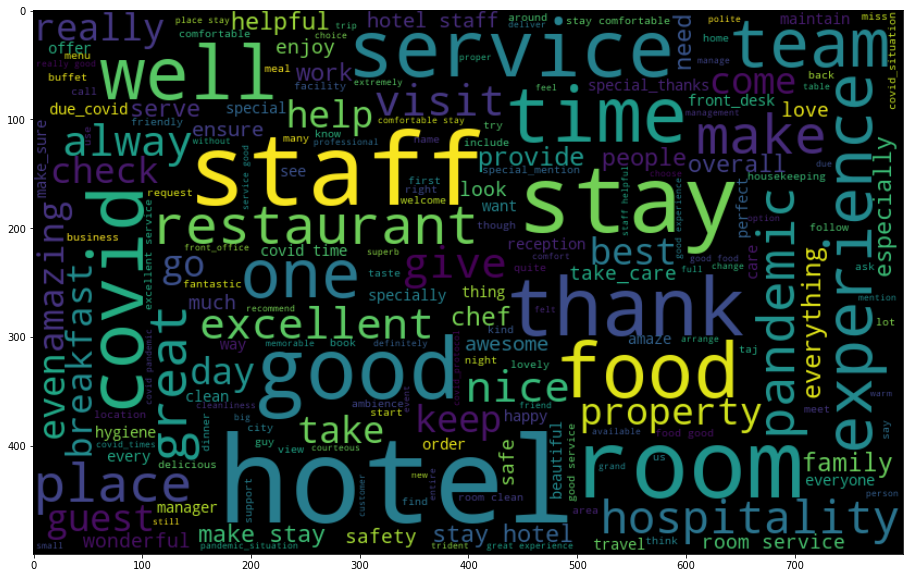

In [ ]:
all_words=[]

for i in data_words:
  for j in i:
    all_words.append(j)

all_words_final = ' '.join([text for text in all_words])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_final)
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
img = plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [ ]:
4962*1.5/100

74.43

In [ ]:
# Create Dictionary and filtering out least (appearing in less than 1.5% of the reviews (assuming appears only once in each review)) and most frequent words (appearing in more than 80% of the reviews)
id2word = corpora.Dictionary(data_words)
id2word.filter_extremes(no_above=0.8, no_below=75)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text, allow_update=True) for text in texts]

print(corpus[:1][0][:30])

INFO - 07:10:12: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 07:10:12: built Dictionary(11983 unique tokens: ['also', 'associate', 'awesome', 'big', 'book']...) from 4926 documents (total 181210 corpus positions)
INFO - 07:10:12: discarding 11650 tokens: [('associate', 33), ('business_meeting', 6), ('centrally', 15), ('colleague', 40), ('could_use', 14), ('decent', 52), ('drink', 38), ('egg', 14), ('fare_day', 1), ('first_time', 73)]...
INFO - 07:10:12: keeping 333 tokens which were in no less than 75 and no more than 3940 (=80.0%) documents
INFO - 07:10:12: resulting dictionary: Dictionary(333 unique tokens: ['also', 'awesome', 'big', 'book', 'breakfast']...)


[(0, 1), (1, 1), (2, 1), (3, 2), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 3), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
  coherence_values = []
  model_list = []
  perplexity_values=[]
  for num_topics in range(start, limit, step):
    model = gensim.models.wrappers.LdaMallet(mallet_path,
                                             corpus=corpus,
                                             num_topics=num_topics,
                                             id2word=id2word,
                                             random_seed=100)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

  return model_list, coherence_values

In [ ]:
# Can take a long time to run
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=4, limit=15, step=1)

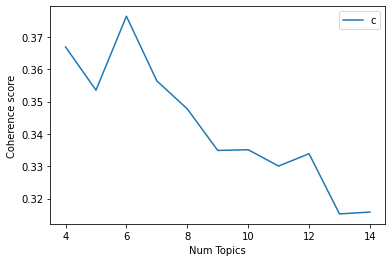

In [ ]:
# coherence elbow

limit=15; start=4; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
mallet_6 = gensim.models.wrappers.LdaMallet(mallet_path,
                                            corpus=corpus,
                                            num_topics=6,
                                            id2word=id2word,
                                            random_seed=100)

INFO - 09:07:53: serializing temporary corpus to /tmp/c7c9a9_corpus.txt
INFO - 09:07:53: converting temporary corpus to MALLET format with /content/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/c7c9a9_corpus.txt --output /tmp/c7c9a9_corpus.mallet
INFO - 09:07:55: training MALLET LDA with /content/mallet-2.0.8/bin/mallet train-topics --input /tmp/c7c9a9_corpus.mallet --num-topics 6  --alpha 50 --optimize-interval 0 --num-threads 4 --output-state /tmp/c7c9a9_state.mallet.gz --output-doc-topics /tmp/c7c9a9_doctopics.txt --output-topic-keys /tmp/c7c9a9_topickeys.txt --num-iterations 1000 --inferencer-filename /tmp/c7c9a9_inferencer.mallet --doc-topics-threshold 0.0  --random-seed 100
INFO - 09:08:31: loading assigned topics from /tmp/c7c9a9_state.mallet.gz


##LDA

In [ ]:
model_6 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(mallet_6)
LDAvis_prepared = pyLDAvis.gensim.prepare(model_6, corpus, id2word)
pyLDAvis.enable_notebook()
pyLDAvis.display(LDAvis_prepared)

INFO - 05:24:46: using serial LDA version on this node
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


In [ ]:
mallet_6.print_topics()

INFO - 07:37:48: topic #0 (8.333): 0.098*"food" + 0.069*"great" + 0.048*"place" + 0.042*"experience" + 0.039*"visit" + 0.036*"service" + 0.032*"time" + 0.029*"amazing" + 0.029*"covid" + 0.020*"pandemic"
INFO - 07:37:48: topic #1 (8.333): 0.126*"hotel" + 0.097*"room" + 0.024*"provide" + 0.020*"check" + 0.013*"reception" + 0.011*"give" + 0.010*"due_covid" + 0.010*"day" + 0.009*"travel" + 0.009*"work"
INFO - 07:37:48: topic #2 (8.333): 0.034*"make" + 0.027*"guest" + 0.026*"time" + 0.020*"chef" + 0.018*"day" + 0.016*"give" + 0.016*"experience" + 0.014*"special" + 0.014*"team" + 0.010*"order"
INFO - 07:37:48: topic #3 (8.333): 0.030*"restaurant" + 0.018*"breakfast" + 0.018*"property" + 0.016*"enjoy" + 0.015*"room" + 0.011*"serve" + 0.010*"view" + 0.010*"offer" + 0.009*"night" + 0.008*"lovely"
INFO - 07:37:48: topic #4 (8.333): 0.129*"staff" + 0.125*"good" + 0.076*"service" + 0.055*"covid" + 0.053*"hotel" + 0.046*"excellent" + 0.040*"stay" + 0.033*"nice" + 0.026*"clean" + 0.026*"helpful"
INF

[(0,
  '0.098*"food" + 0.069*"great" + 0.048*"place" + 0.042*"experience" + 0.039*"visit" + 0.036*"service" + 0.032*"time" + 0.029*"amazing" + 0.029*"covid" + 0.020*"pandemic"'),
 (1,
  '0.126*"hotel" + 0.097*"room" + 0.024*"provide" + 0.020*"check" + 0.013*"reception" + 0.011*"give" + 0.010*"due_covid" + 0.010*"day" + 0.009*"travel" + 0.009*"work"'),
 (2,
  '0.034*"make" + 0.027*"guest" + 0.026*"time" + 0.020*"chef" + 0.018*"day" + 0.016*"give" + 0.016*"experience" + 0.014*"special" + 0.014*"team" + 0.010*"order"'),
 (3,
  '0.030*"restaurant" + 0.018*"breakfast" + 0.018*"property" + 0.016*"enjoy" + 0.015*"room" + 0.011*"serve" + 0.010*"view" + 0.010*"offer" + 0.009*"night" + 0.008*"lovely"'),
 (4,
  '0.129*"staff" + 0.125*"good" + 0.076*"service" + 0.055*"covid" + 0.053*"hotel" + 0.046*"excellent" + 0.040*"stay" + 0.033*"nice" + 0.026*"clean" + 0.026*"helpful"'),
 (5,
  '0.170*"stay" + 0.034*"team" + 0.033*"comfortable" + 0.028*"staff" + 0.027*"make" + 0.025*"pandemic" + 0.023*"take_c

In [ ]:
topic_modelling_results = mallet_6[corpus]

INFO - 07:39:10: serializing temporary corpus to /tmp/294372_corpus.txt
INFO - 07:39:11: converting temporary corpus to MALLET format with /content/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/294372_corpus.txt --output /tmp/294372_corpus.mallet.infer --use-pipe-from /tmp/294372_corpus.mallet
INFO - 07:39:12: inferring topics with MALLET LDA '/content/mallet-2.0.8/bin/mallet infer-topics --input /tmp/294372_corpus.mallet.infer --inferencer /tmp/294372_inferencer.mallet --output-doc-topics /tmp/294372_doctopics.txt.infer --num-iterations 100 --doc-topics-threshold 0.0 --random-seed 100'


In [ ]:
topic_modelling_results

In [ ]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in topic_modelling_results]

In [ ]:
len(corpus_topics)

4926

In [ ]:
df_covid_positive = df_covid[df_covid.rating>=4]

In [ ]:
df_covid_positive['dominant_topic'] = [i[0] for i in corpus_topics]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_covid_positive

In [ ]:
sid = SentimentIntensityAnalyzer()

df_covid_positive['sentiment_scores'] = df_covid_positive['cleaned_review'].apply(lambda rev: sid.polarity_scores(rev))
df_covid_positive['compound_score'] = df_covid_positive['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_covid_positive.groupby(by='dominant_topic').agg({'compound_score':'mean'})

compound_score
dominant_topic                
0                     0.938906
1                     0.916112
2                     0.940249
3                     0.947240
4                     0.929908
5                     0.943651

##word2vec

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [ ]:
sent = list(sent_to_words(df_covid_positive.cleaned_review.astype(str)))
bigram = Phrases(sent, min_count=1, progress_per=10000)
trigram_phrase = Phrases(bigram[sent])
trigram = Phraser(trigram_phrase)
sentences = trigram[sent]

INFO - 07:24:36: collecting all words and their counts
INFO - 07:24:36: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 07:24:37: collected 110794 word types from a corpus of 216593 words (unigram + bigrams) and 4926 sentences
INFO - 07:24:37: using 110794 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
INFO - 07:24:37: collecting all words and their counts
INFO - 07:24:37: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 07:24:38: collected 125324 word types from a corpus of 189092 words (unigram + bigrams) and 4926 sentences
INFO - 07:24:38: using 125324 counts as vocab in Phrases<0 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>
INFO - 07:24:38: source_vocab length 125324
INFO - 07:24:40: Phraser built with 1308 phrasegrams


In [ ]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

7169

In [ ]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['stay',
 'hotel',
 'staff',
 'room',
 'good',
 'service',
 'food',
 'covid',
 'time',
 'great']

### training model from scratch

In [ ]:
w2v_model = Word2Vec(min_count=10,
                     window=5,
                     size=300,
                     sample=6e-5,
                     alpha=0.03,
                     min_alpha=0.0007,
                     negative=20,
                     workers=3)

In [ ]:
w2v_model.build_vocab(sentences, progress_per=10000)

In [ ]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

In [ ]:
w2v_model.wv.most_similar(positive=['quarantine'], topn=30)

[('business_trip', 0.9747648239135742),
 ('apprehensive', 0.974433183670044),
 ('traveller', 0.9739315509796143),
 ('regency', 0.9712870717048645),
 ('worry', 0.9708542823791504),
 ('ongoing_pandemic', 0.9697120189666748),
 ('business_purpose', 0.9672101736068726),
 ('situation', 0.9650406241416931),
 ('frequently', 0.9642333984375),
 ('consideration', 0.9609869718551636),
 ('post_covid', 0.958983302116394),
 ('consider', 0.9589077830314636),
 ('aspect', 0.958244800567627),
 ('leisure', 0.9577560424804688),
 ('anyone', 0.9565232992172241),
 ('first_time', 0.9559733867645264),
 ('oakwood', 0.9543213844299316),
 ('accommodation', 0.9542362689971924),
 ('implement', 0.9536886215209961),
 ('employee', 0.9521493315696716),
 ('confident', 0.950376570224762),
 ('worried', 0.9499398469924927),
 ('upon_arrival', 0.949110746383667),
 ('comfort', 0.9490808248519897),
 ('recent', 0.9485788345336914),
 ('visitor', 0.9481149911880493),
 ('doubt', 0.9475644826889038),
 ('treat_like', 0.94703876972198

In [ ]:
w2v_model.wv.most_similar(positive=['staff', 'covid'], topn=30)

[('follow', 0.993313193321228),
 ('maintain', 0.9890349507331848),
 ('covid_precaution', 0.9881856441497803),
 ('neat_clean', 0.9873543977737427),
 ('proper', 0.9836385250091553),
 ('neat', 0.9835034608840942),
 ('covid_rule', 0.9817010760307312),
 ('maintain_hygiene', 0.9809443354606628),
 ('covid_protocol', 0.9784123301506042),
 ('well_sanitize', 0.9775305986404419),
 ('well_trained', 0.9774073362350464),
 ('cleanliness', 0.976574182510376),
 ('friendly', 0.9760509133338928),
 ('hygienic', 0.975010871887207),
 ('hygiene', 0.9749858975410461),
 ('measure', 0.9739267826080322),
 ('environment', 0.9732251763343811),
 ('covid_situation', 0.9708417654037476),
 ('social', 0.9706670045852661),
 ('polite', 0.970495879650116),
 ('covid_norm', 0.9695701599121094),
 ('covid_guideline', 0.9683717489242554),
 ('strictly_follow', 0.9670218825340271),
 ('taken', 0.9661215543746948),
 ('courteous', 0.9647718667984009),
 ('protocol', 0.9642382860183716),
 ('sanitation', 0.9636613130569458),
 ('suppor

In [ ]:
w2v_model.wv.most_similar(positive=['covid_duty'], topn=30)

[('crown_plaza', 0.9945754408836365),
 ('current_pandemic', 0.9936279654502869),
 ('safety_norm', 0.9921748638153076),
 ('inn', 0.9920926690101624),
 ('appreciable', 0.9916149973869324),
 ('would_recommend', 0.9901673793792725),
 ('corona', 0.9899768829345703),
 ('goldfinch', 0.9880399703979492),
 ('ensure_safety', 0.9877897500991821),
 ('safety_hygiene', 0.9875972270965576),
 ('hygiene_cleanliness', 0.9875776767730713),
 ('feel_safe', 0.9874787330627441),
 ('covid_period', 0.9874332547187805),
 ('ibis', 0.9872114062309265),
 ('secure', 0.9865817427635193),
 ('tough', 0.9851688146591187),
 ('would_highly', 0.9849991798400879),
 ('polite_humble', 0.984892725944519),
 ('safe_secure', 0.9848247170448303),
 ('approachable', 0.9844896793365479),
 ('friendly_helpful', 0.9843180775642395),
 ('felt_safe', 0.9840445518493652),
 ('hygiene_maintain', 0.9837812185287476),
 ('extremely_friendly', 0.9837172627449036),
 ('precaution_take', 0.9834383726119995),
 ('pandemic_times', 0.982917308807373),


In [ ]:
df_covid_positive.compound_score.mean()

0.9360675192854229

In [ ]:
df_covid_neutral = df_covid[df_covid.rating==3]
df_covid_neutral['sentiment_scores'] = df_covid_neutral['cleaned_review'].apply(lambda rev: sid.polarity_scores(rev))
df_covid_neutral['compound_score'] = df_covid_neutral['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])
df_covid_neutral.compound_score.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.7488388235294118

In [ ]:
df_covid_negative.compound_score.mean()

0.3429057251908397

In [ ]:
df_covid_negative_strict = df_covid[df_covid.rating<=2]
df_covid_negative_strict['sentiment_scores'] = df_covid_negative_strict['cleaned_review'].apply(lambda rev: sid.polarity_scores(rev))
df_covid_negative_strict['compound_score'] = df_covid_negative_strict['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])
df_covid_negative_strict.compound_score.mean()

NameError: ignored

In [ ]:
df_covid_negative_strict.shape

(177, 24)

### pre-trained model

In [ ]:
import platform
platform.architecture()

('64bit', '')

In [ ]:
import gensim

# Load Google's pre-trained Word2Vec model.
#model = gensim.models.KeyedVectors.load_word2vec_format('./model/GoogleNews-vectors-negative300.bin', binary=True)
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/GoogleNews-vectors-negative300.bin.gz', binary=True)

INFO - 07:24:40: loading projection weights from /content/drive/MyDrive/GoogleNews-vectors-negative300.bin.gz
INFO - 07:27:15: loaded (3000000, 300) matrix from /content/drive/MyDrive/GoogleNews-vectors-negative300.bin.gz


In [ ]:
model = Word2Vec(sentences,
                 min_count=10,
                 window=5,
                 size=300,
                 sample=6e-5,
                 alpha=0.03,
                 min_alpha=0.0007,
                 negative=20,
                 workers=3,
                 iter=30)

INFO - 08:02:16: collecting all words and their counts
INFO - 08:02:16: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 08:02:17: collected 7169 word types from a corpus of 195979 raw words and 4926 sentences
INFO - 08:02:17: Loading a fresh vocabulary
INFO - 08:02:17: effective_min_count=10 retains 2268 unique words (31% of original 7169, drops 4901)
INFO - 08:02:17: effective_min_count=10 leaves 181453 word corpus (92% of original 195979, drops 14526)
INFO - 08:02:17: deleting the raw counts dictionary of 7169 items
INFO - 08:02:17: sample=6e-05 downsamples 1016 most-common words
INFO - 08:02:17: downsampling leaves estimated 66426 word corpus (36.6% of prior 181453)
INFO - 08:02:17: estimated required memory for 2268 words and 300 dimensions: 6577200 bytes
INFO - 08:02:17: resetting layer weights
INFO - 08:02:17: training model with 3 workers on 2268 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=5
INFO - 08:02:18: worker thread

In [ ]:
model.wv.most_similar(positive=['quarantine'], topn=30)

[('apprehensive', 0.9750600457191467),
 ('business_trip', 0.9737889766693115),
 ('traveller', 0.9716938734054565),
 ('worry', 0.9707695841789246),
 ('ongoing_pandemic', 0.9699556827545166),
 ('regency', 0.9697271585464478),
 ('business_purpose', 0.9655208587646484),
 ('frequently', 0.9636955857276917),
 ('situation', 0.9629126787185669),
 ('consideration', 0.9581574201583862),
 ('post_covid', 0.956316351890564),
 ('aspect', 0.9561363458633423),
 ('leisure', 0.9559898376464844),
 ('implement', 0.9557938575744629),
 ('first_time', 0.9554395079612732),
 ('consider', 0.9543819427490234),
 ('anyone', 0.9515663385391235),
 ('upon_arrival', 0.9514287710189819),
 ('worried', 0.9497156739234924),
 ('accommodation', 0.949711799621582),
 ('doubt', 0.9492062330245972),
 ('recent', 0.9491972327232361),
 ('oakwood', 0.9488978981971741),
 ('employee', 0.948516845703125),
 ('treat_like', 0.9448065757751465),
 ('smooth', 0.9443643093109131),
 ('grand_central', 0.9439181089401245),
 ('confident', 0.9438

# negative + neutral

In [ ]:
from gensim.models import Phrases

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(sent_to_words(df_covid[df_covid.rating<4].cleaned_review.astype(str)))
bigram_model = Phrases(data_words)
trigram_model = Phrases(bigram_model[data_words], min_count=1)
data_words = list(trigram_model[bigram_model[data_words]])

INFO - 07:44:34: collecting all words and their counts
INFO - 07:44:34: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 07:44:34: collected 23379 word types from a corpus of 24590 words (unigram + bigrams) and 262 sentences
INFO - 07:44:34: using 23379 counts as vocab in Phrases<0 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>
INFO - 07:44:34: collecting all words and their counts
INFO - 07:44:34: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 07:44:34: collected 23578 word types from a corpus of 24084 words (unigram + bigrams) and 262 sentences
INFO - 07:44:34: using 23578 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>


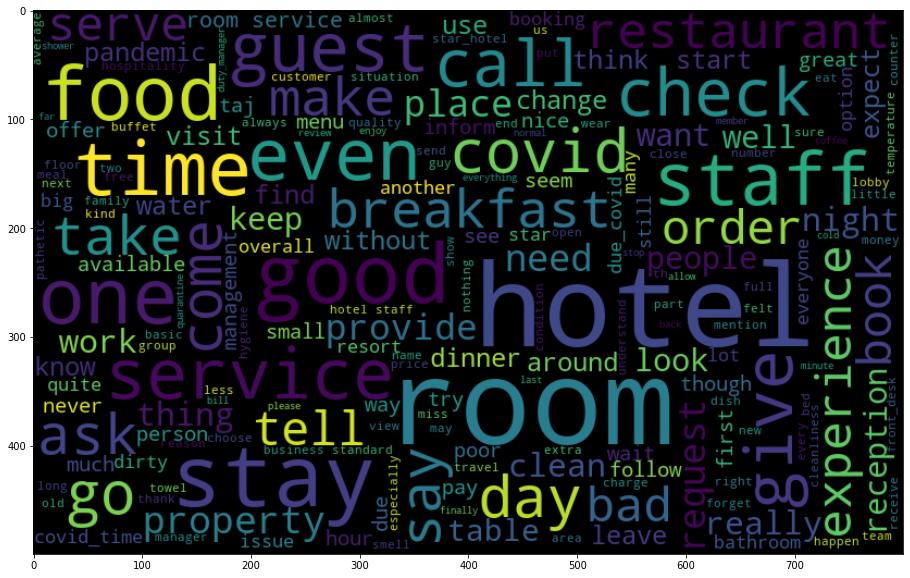

In [ ]:
from wordcloud import WordCloud
all_words=[]

for i in data_words:
  for j in i:
    all_words.append(j)

all_words_final = ' '.join([text for text in all_words])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_final)
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
img = plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [ ]:
from gensim import corpora

# Create Dictionary and filtering out least (appearing in less than 1.5% of the reviews (assuming appears only once in each review)) and most frequent words (appearing in more than 80% of the reviews)
id2word = corpora.Dictionary(data_words)
#id2word.filter_extremes(no_below=3)
id2word.filter_extremes(no_above=0.8, no_below=75)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text, allow_update=True) for text in texts]

print(corpus[:1][0][:30])

INFO - 07:44:42: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 07:44:42: built Dictionary(4215 unique tokens: ['availability', 'available', 'basic_amenity', 'book', 'breakfast']...) from 262 documents (total 21712 corpus positions)
INFO - 07:44:42: discarding 4200 tokens: [('availability', 2), ('available', 33), ('basic_amenity', 4), ('book', 54), ('breakfast', 67), ('covid_relate', 3), ('despite', 12), ('fact', 13), ('garden', 3), ('green', 3)]...
INFO - 07:44:42: keeping 15 tokens which were in no less than 75 and no more than 209 (=80.0%) documents
INFO - 07:44:42: resulting dictionary: Dictionary(15 unique tokens: ['even', 'get', 'good', 'guest', 'one']...)


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 6), (6, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 1)]


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
  coherence_values = []
  model_list = []
  perplexity_values=[]
  for num_topics in range(start, limit, step):
    model = gensim.models.wrappers.LdaMallet(mallet_path,
                                             corpus=corpus,
                                             num_topics=num_topics,
                                             id2word=id2word,
                                             random_seed=100)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

  return model_list, coherence_values

In [ ]:
# Can take a long time to run
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=4, limit=15, step=1)

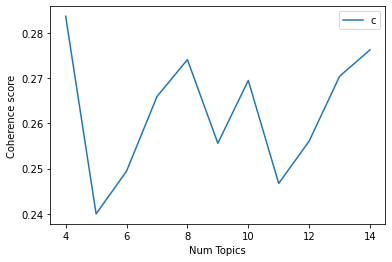

In [ ]:
# coherence elbow

import matplotlib.pyplot as plt
limit=15; start=4; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
mallet_7 = gensim.models.wrappers.LdaMallet(mallet_path,
                                            corpus=corpus,
                                            num_topics=7,
                                            id2word=id2word,
                                            random_seed=100)

INFO - 05:59:31: serializing temporary corpus to /tmp/23b8a_corpus.txt
INFO - 05:59:31: converting temporary corpus to MALLET format with /content/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/23b8a_corpus.txt --output /tmp/23b8a_corpus.mallet
INFO - 05:59:32: training MALLET LDA with /content/mallet-2.0.8/bin/mallet train-topics --input /tmp/23b8a_corpus.mallet --num-topics 7  --alpha 50 --optimize-interval 0 --num-threads 4 --output-state /tmp/23b8a_state.mallet.gz --output-doc-topics /tmp/23b8a_doctopics.txt --output-topic-keys /tmp/23b8a_topickeys.txt --num-iterations 1000 --inferencer-filename /tmp/23b8a_inferencer.mallet --doc-topics-threshold 0.0  --random-seed 100
INFO - 06:00:04: loading assigned topics from /tmp/23b8a_state.mallet.gz


In [ ]:
model_7 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(mallet_7)
LDAvis_prepared = pyLDAvis.gensim.prepare(model_7, corpus, id2word)
pyLDAvis.enable_notebook()
pyLDAvis.display(LDAvis_prepared)

INFO - 06:00:05: using serial LDA version on this node
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


In [ ]:
mallet_7.print_topics()

INFO - 07:48:30: topic #0 (7.143): 0.082*"room" + 0.046*"call" + 0.038*"give" + 0.032*"day" + 0.028*"breakfast" + 0.028*"book" + 0.023*"provide" + 0.020*"time" + 0.015*"request" + 0.013*"nice"
INFO - 07:48:30: topic #1 (7.143): 0.080*"good" + 0.067*"food" + 0.033*"restaurant" + 0.032*"staff" + 0.031*"covid" + 0.022*"clean" + 0.016*"visit" + 0.016*"table" + 0.014*"great" + 0.011*"lot"
INFO - 07:48:30: topic #2 (7.143): 0.046*"time" + 0.027*"experience" + 0.016*"start" + 0.014*"due" + 0.014*"taj" + 0.014*"pay" + 0.014*"wait" + 0.013*"management" + 0.012*"pandemic" + 0.012*"booking"
INFO - 07:48:30: topic #3 (7.143): 0.044*"service" + 0.028*"order" + 0.027*"make" + 0.022*"work" + 0.018*"thing" + 0.015*"dinner" + 0.015*"guest" + 0.013*"give" + 0.012*"menu" + 0.011*"team"
INFO - 07:48:30: topic #4 (7.143): 0.073*"room" + 0.047*"check" + 0.020*"reception" + 0.015*"water" + 0.012*"hour" + 0.012*"resort" + 0.011*"bathroom" + 0.011*"dirty" + 0.010*"basic" + 0.010*"floor"
INFO - 07:48:30: topic 

[(0,
  '0.082*"room" + 0.046*"call" + 0.038*"give" + 0.032*"day" + 0.028*"breakfast" + 0.028*"book" + 0.023*"provide" + 0.020*"time" + 0.015*"request" + 0.013*"nice"'),
 (1,
  '0.080*"good" + 0.067*"food" + 0.033*"restaurant" + 0.032*"staff" + 0.031*"covid" + 0.022*"clean" + 0.016*"visit" + 0.016*"table" + 0.014*"great" + 0.011*"lot"'),
 (2,
  '0.046*"time" + 0.027*"experience" + 0.016*"start" + 0.014*"due" + 0.014*"taj" + 0.014*"pay" + 0.014*"wait" + 0.013*"management" + 0.012*"pandemic" + 0.012*"booking"'),
 (3,
  '0.044*"service" + 0.028*"order" + 0.027*"make" + 0.022*"work" + 0.018*"thing" + 0.015*"dinner" + 0.015*"guest" + 0.013*"give" + 0.012*"menu" + 0.011*"team"'),
 (4,
  '0.073*"room" + 0.047*"check" + 0.020*"reception" + 0.015*"water" + 0.012*"hour" + 0.012*"resort" + 0.011*"bathroom" + 0.011*"dirty" + 0.010*"basic" + 0.010*"floor"'),
 (5,
  '0.097*"hotel" + 0.091*"stay" + 0.051*"room" + 0.032*"property" + 0.029*"bad" + 0.028*"service" + 0.019*"people" + 0.018*"night" + 0.010

In [ ]:
topic_modelling_results = mallet_7[corpus]
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in topic_modelling_results]
df_covid_negative = df_covid[df_covid.rating<=3]
df_covid_negative['dominant_topic'] = [i[0] for i in corpus_topics]
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
df_covid_negative['sentiment_scores'] = df_covid_negative['cleaned_review'].apply(lambda rev: sid.polarity_scores(rev))
df_covid_negative['compound_score'] = df_covid_negative['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])
df_covid_negative.groupby(by='dominant_topic').agg({'compound_score':'mean'})

INFO - 07:47:39: serializing temporary corpus to /tmp/23b8a_corpus.txt
INFO - 07:47:39: converting temporary corpus to MALLET format with /content/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/23b8a_corpus.txt --output /tmp/23b8a_corpus.mallet.infer --use-pipe-from /tmp/23b8a_corpus.mallet
INFO - 07:47:39: inferring topics with MALLET LDA '/content/mallet-2.0.8/bin/mallet infer-topics --input /tmp/23b8a_corpus.mallet.infer --inferencer /tmp/23b8a_inferencer.mallet --output-doc-topics /tmp/23b8a_doctopics.txt.infer --num-iterations 100 --doc-topics-threshold 0.0 --random-seed 100'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


compound_score
dominant_topic                
0                     0.303424
1                     0.683869
2                     0.332412
3                     0.500491
4                     0.088357
5                     0.238921
6                     0.150570

# negative

In [ ]:
df_covid_strictly_negative = df_covid[df_covid.rating<=2]

##LDA

In [ ]:
from gensim.models import Phrases

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(sent_to_words(df_covid_strictly_negative.cleaned_review.astype(str)))
bigram_model = Phrases(data_words)
trigram_model = Phrases(bigram_model[data_words], min_count=1)
data_words = list(trigram_model[bigram_model[data_words]])

INFO - 08:04:32: collecting all words and their counts
INFO - 08:04:32: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 08:04:32: collected 17223 word types from a corpus of 17293 words (unigram + bigrams) and 177 sentences
INFO - 08:04:32: using 17223 counts as vocab in Phrases<0 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>
INFO - 08:04:32: collecting all words and their counts
INFO - 08:04:32: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 08:04:32: collected 17334 word types from a corpus of 16973 words (unigram + bigrams) and 177 sentences
INFO - 08:04:32: using 17334 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>


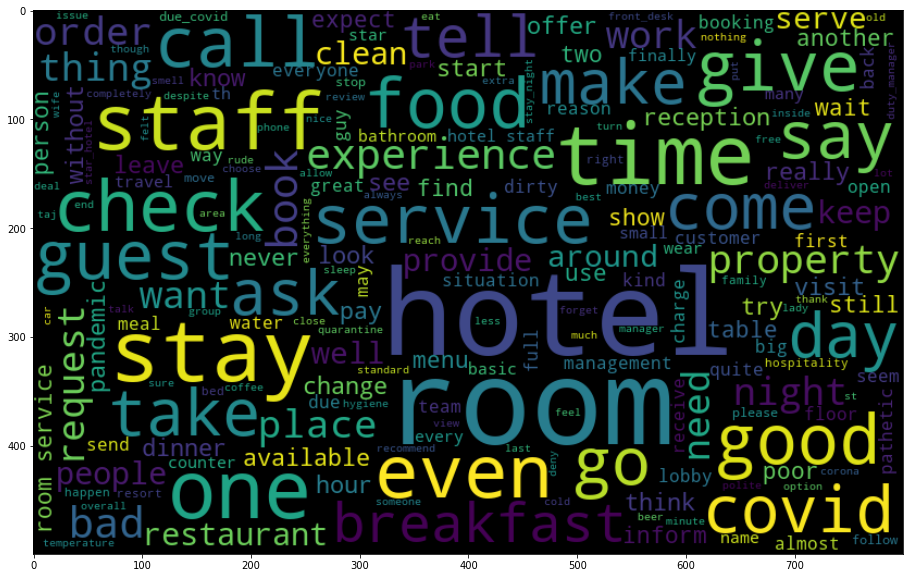

In [ ]:
from wordcloud import WordCloud
all_words=[]

for i in data_words:
  for j in i:
    all_words.append(j)

all_words_final = ' '.join([text for text in all_words])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_final)
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
img = plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [ ]:
from gensim import corpora

# Create Dictionary and filtering out least (appearing in less than 1.5% of the reviews (assuming appears only once in each review)) and most frequent words (appearing in more than 80% of the reviews)
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text, allow_update=True) for text in texts]

print(corpus[:1][0][:30])

INFO - 14:21:14: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 14:21:14: built Dictionary(3426 unique tokens: ['availability', 'available', 'basic_amenity', 'breakfast', 'covid']...) from 177 documents (total 15304 corpus positions)


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 6), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
  coherence_values = []
  model_list = []
  perplexity_values=[]
  for num_topics in range(start, limit, step):
    model = gensim.models.wrappers.LdaMallet(mallet_path,
                                             corpus=corpus,
                                             num_topics=num_topics,
                                             id2word=id2word,
                                             random_seed=100)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

  return model_list, coherence_values

In [ ]:
# Can take a long time to run
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=4, limit=15, step=1)

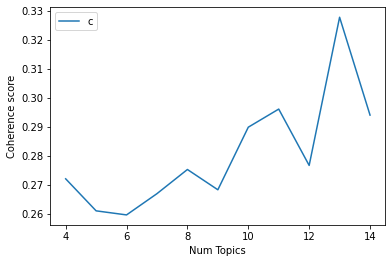

In [ ]:
# coherence elbow

import matplotlib.pyplot as plt
limit=15; start=4; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
mallet_negative_7 = gensim.models.wrappers.LdaMallet(mallet_path,
                                                     corpus=corpus,
                                                     num_topics=7,
                                                     id2word=id2word,
                                                     random_seed=100)

INFO - 10:30:50: serializing temporary corpus to /tmp/eba172_corpus.txt
INFO - 10:30:50: converting temporary corpus to MALLET format with /content/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/eba172_corpus.txt --output /tmp/eba172_corpus.mallet
INFO - 10:30:50: training MALLET LDA with /content/mallet-2.0.8/bin/mallet train-topics --input /tmp/eba172_corpus.mallet --num-topics 7  --alpha 50 --optimize-interval 0 --num-threads 4 --output-state /tmp/eba172_state.mallet.gz --output-doc-topics /tmp/eba172_doctopics.txt --output-topic-keys /tmp/eba172_topickeys.txt --num-iterations 1000 --inferencer-filename /tmp/eba172_inferencer.mallet --doc-topics-threshold 0.0  --random-seed 100
INFO - 10:31:23: loading assigned topics from /tmp/eba172_state.mallet.gz


In [ ]:
model_negative_7 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(mallet_negative_7)
LDAvis_prepared = pyLDAvis.gensim.prepare(model_negative_7, corpus, id2word)
pyLDAvis.enable_notebook()
pyLDAvis.display(LDAvis_prepared)

INFO - 10:31:23: using serial LDA version on this node
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


In [ ]:
mallet_negative_10 = gensim.models.wrappers.LdaMallet(mallet_path,
                                                     corpus=corpus,
                                                     num_topics=10,
                                                     id2word=id2word,
                                                     random_seed=100)

INFO - 14:22:25: serializing temporary corpus to /tmp/7c1b65_corpus.txt
INFO - 14:22:25: converting temporary corpus to MALLET format with /content/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/7c1b65_corpus.txt --output /tmp/7c1b65_corpus.mallet
INFO - 14:22:26: training MALLET LDA with /content/mallet-2.0.8/bin/mallet train-topics --input /tmp/7c1b65_corpus.mallet --num-topics 10  --alpha 50 --optimize-interval 0 --num-threads 4 --output-state /tmp/7c1b65_state.mallet.gz --output-doc-topics /tmp/7c1b65_doctopics.txt --output-topic-keys /tmp/7c1b65_topickeys.txt --num-iterations 1000 --inferencer-filename /tmp/7c1b65_inferencer.mallet --doc-topics-threshold 0.0  --random-seed 100
INFO - 14:22:59: loading assigned topics from /tmp/7c1b65_state.mallet.gz


In [ ]:
model_negative_10 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(mallet_negative_10)
LDAvis_prepared = pyLDAvis.gensim.prepare(model_negative_10, corpus, id2word)
pyLDAvis.enable_notebook()
pyLDAvis.display(LDAvis_prepared)

INFO - 14:23:00: using serial LDA version on this node
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


In [ ]:
for i in df_covid_strictly_negative.review:
  print(i)

In [ ]:
for i in df_covid_strictly_negative.cleaned_review:
  print(i)
  print('\n')

## Word2Vec

In [ ]:
data_words = list(sent_to_words(df_covid_strictly_negative.cleaned_review.astype(str)))
bigram_model = Phrases(data_words)
trigram_model = Phrases(bigram_model[data_words], min_count=1)

from gensim.models.phrases import Phrases, Phraser
sent = list(sent_to_words(df_covid_strictly_negative.cleaned_review.astype(str)))
bigram = Phrases(sent, min_count=1, progress_per=10000)
trigram_phrase = Phrases(bigram[sent])
trigram = Phraser(trigram_phrase)
sentences = trigram[sent]

INFO - 08:09:38: collecting all words and their counts
INFO - 08:09:38: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 08:09:38: collected 17223 word types from a corpus of 17293 words (unigram + bigrams) and 177 sentences
INFO - 08:09:38: using 17223 counts as vocab in Phrases<0 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>
INFO - 08:09:38: collecting all words and their counts
INFO - 08:09:38: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 08:09:38: collected 17334 word types from a corpus of 16973 words (unigram + bigrams) and 177 sentences
INFO - 08:09:38: using 17334 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
INFO - 08:09:38: collecting all words and their counts
INFO - 08:09:38: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 08:09:38: collected 17223 word types from a corpus of 17293 words (unigram + bigrams) and 177 sentences
INFO - 08:09:38: using 17223 c

In [ ]:
import multiprocessing
from gensim.models import Word2Vec

word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

2748

In [ ]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['room',
 'hotel',
 'staff',
 'stay',
 'time',
 'one',
 'covid',
 'food',
 'get',
 'service']

### training model from scratch

In [ ]:
4*75

300

In [ ]:
w2v_model = Word2Vec(min_count=1,
                     window=2,
                     size=300,
                     workers=3,
                     )

In [ ]:
w2v_model.build_vocab(sentences, progress_per=10000)

INFO - 08:26:49: collecting all words and their counts
INFO - 08:26:49: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 08:26:49: collected 2748 word types from a corpus of 16946 raw words and 177 sentences
INFO - 08:26:49: Loading a fresh vocabulary
INFO - 08:26:49: effective_min_count=1 retains 2748 unique words (100% of original 2748, drops 0)
INFO - 08:26:49: effective_min_count=1 leaves 16946 word corpus (100% of original 16946, drops 0)
INFO - 08:26:49: deleting the raw counts dictionary of 2748 items
INFO - 08:26:49: sample=0.001 downsamples 45 most-common words
INFO - 08:26:49: downsampling leaves estimated 14890 word corpus (87.9% of prior 16946)
INFO - 08:26:49: estimated required memory for 2748 words and 300 dimensions: 7969200 bytes
INFO - 08:26:49: resetting layer weights


In [ ]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

INFO - 08:26:50: training model with 3 workers on 2748 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=2
INFO - 08:26:50: worker thread finished; awaiting finish of 2 more threads
INFO - 08:26:50: worker thread finished; awaiting finish of 1 more threads
INFO - 08:26:50: worker thread finished; awaiting finish of 0 more threads
INFO - 08:26:50: EPOCH - 1 : training on 16946 raw words (14929 effective words) took 0.1s, 187356 effective words/s
INFO - 08:26:50: worker thread finished; awaiting finish of 2 more threads
INFO - 08:26:50: worker thread finished; awaiting finish of 1 more threads
INFO - 08:26:50: worker thread finished; awaiting finish of 0 more threads
INFO - 08:26:50: EPOCH - 2 : training on 16946 raw words (14853 effective words) took 0.1s, 173305 effective words/s
INFO - 08:26:50: worker thread finished; awaiting finish of 2 more threads
INFO - 08:26:50: worker thread finished; awaiting finish of 1 more threads
INFO - 08:26:50: worker thread fi

(446574, 508380)

In [ ]:
w2v_model.wv.most_similar(['pandemic'], topn=30)

INFO - 08:26:53: precomputing L2-norms of word weight vectors


[('since', 0.9996700286865234),
 ('first_time', 0.9996683597564697),
 ('early', 0.9996621608734131),
 ('period', 0.999659538269043),
 ('corona', 0.9996574521064758),
 ('review', 0.9996572732925415),
 ('quarantine', 0.9996557235717773),
 ('covid', 0.9996511340141296),
 ('despite', 0.9996373653411865),
 ('due', 0.9996371865272522),
 ('traveller', 0.9996355772018433),
 ('month', 0.9996342658996582),
 ('choose', 0.9996306896209717),
 ('year', 0.9996292591094971),
 ('duty', 0.9996286630630493),
 ('family', 0.9996273517608643),
 ('horrible', 0.9996265172958374),
 ('plan', 0.9996256232261658),
 ('nights', 0.9996218681335449),
 ('reason', 0.9996199607849121),
 ('visit', 0.9996185898780823),
 ('march', 0.9996184706687927),
 ('post', 0.999618411064148),
 ('consider', 0.9996173977851868),
 ('infection', 0.9996170401573181),
 ('thanks', 0.9996162056922913),
 ('break', 0.9996150732040405),
 ('end', 0.9996150732040405),
 ('week', 0.9996145963668823),
 ('base', 0.999614417552948)]

### pre-trained model

In [ ]:
import gensim

# Load Google's pre-trained Word2Vec model.
#model = gensim.models.KeyedVectors.load_word2vec_format('./model/GoogleNews-vectors-negative300.bin', binary=True)
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/GoogleNews-vectors-negative300.bin.gz', binary=True)

INFO - 08:10:01: loading projection weights from /content/drive/MyDrive/GoogleNews-vectors-negative300.bin.gz
INFO - 08:12:32: loaded (3000000, 300) matrix from /content/drive/MyDrive/GoogleNews-vectors-negative300.bin.gz


In [ ]:
model = Word2Vec(sentences,
                 min_count=3,
                 window=2,
                 size=300,
                 workers=3,
                 iter=30)

INFO - 08:31:09: collecting all words and their counts
INFO - 08:31:09: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 08:31:09: collected 2748 word types from a corpus of 16946 raw words and 177 sentences
INFO - 08:31:09: Loading a fresh vocabulary
INFO - 08:31:09: effective_min_count=3 retains 1141 unique words (41% of original 2748, drops 1607)
INFO - 08:31:09: effective_min_count=3 leaves 14894 word corpus (87% of original 16946, drops 2052)
INFO - 08:31:09: deleting the raw counts dictionary of 2748 items
INFO - 08:31:09: sample=0.001 downsamples 58 most-common words
INFO - 08:31:09: downsampling leaves estimated 12606 word corpus (84.6% of prior 14894)
INFO - 08:31:09: estimated required memory for 1141 words and 300 dimensions: 3308900 bytes
INFO - 08:31:09: resetting layer weights
INFO - 08:31:09: training model with 3 workers on 1141 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=2
INFO - 08:31:09: worker thread finished; 

In [ ]:
model.wv.most_similar(['covid_protocol'], topn=30)

INFO - 08:31:12: precomputing L2-norms of word weight vectors


[('mother', 0.9998438954353333),
 ('airport', 0.999837338924408),
 ('near', 0.9998307824134827),
 ('information', 0.9998305439949036),
 ('disturb', 0.9998273849487305),
 ('ground', 0.9998270869255066),
 ('firstly', 0.9998258948326111),
 ('proper', 0.9998254179954529),
 ('along', 0.9998246431350708),
 ('walk', 0.9998234510421753),
 ('resident', 0.9998234510421753),
 ('ur', 0.9998228549957275),
 ('huge', 0.9998220205307007),
 ('saw', 0.9998196363449097),
 ('regular', 0.999819278717041),
 ('sit', 0.9998186826705933),
 ('stick', 0.9998184442520142),
 ('card', 0.9998183250427246),
 ('surprise', 0.99981689453125),
 ('highlight', 0.9998151659965515),
 ('shame', 0.9998143911361694),
 ('either', 0.9998137950897217),
 ('fact', 0.9998133778572083),
 ('roam', 0.9998132586479187),
 ('flight', 0.9998129606246948),
 ('payment', 0.9998127222061157),
 ('stand', 0.9998126029968262),
 ('hot_water', 0.9998112916946411),
 ('mean', 0.9998109936714172),
 ('body', 0.9998105764389038)]